In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns

In [2]:
clean = pd.read_excel("Clean.xlsx")

In [3]:
category = ["Price-Sensitive Customers" , "Product-Focused Customers" , "Loyalty-Driven Customers" , "Convenience-Oriented Customers"]

categories = []

for i in category:
    df = pd.read_excel("Category.xlsx" , sheet_name = i)
    categories.append(df)

In [4]:
df = categories[1]
df

เลขอ้างอิง SKU (SKU Reference No.)  Shopee-Paid Bundle Deal Discount
0                          8851540014376                                 0
1                          8852278001102                                 0
2                          8851540015434                                 0
3                          8852278007104                                 0
4                          8851540001215                                 0
...                                  ...                               ...
16600                               0485                                 0
16601                      8850747211120                                 0
16602                      8850106267393                                 0
16603                      8850106041597                                 0
16604                      8850106041627                                 0

[16605 rows x 2 columns]

In [5]:
sku_bundle_participation = df.groupby('เลขอ้างอิง SKU (SKU Reference No.)') #['Shopee-Paid Bundle Deal Discount'].mean()
sku_bundle_participation.first()

Shopee-Paid Bundle Deal Discount
เลขอ้างอิง SKU (SKU Reference No.)                                  
485                                                                0
487                                                                0
20001                                                              0
90610                                                              0
90613                                                              0
...                                                              ...
8888299801117                                                      0
8888299808031                                                      0
9312280115048                                                      0
V0037                                                              0
V0038                                                              0

[751 rows x 1 columns]

c:\Users\thunk\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 1000x600 with 0 Axes>

c:\Users\thunk\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\thunk\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\thunk\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\thunk\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\thunk\AppData\Local\Programs\Python\Python311\Lib\site-pa

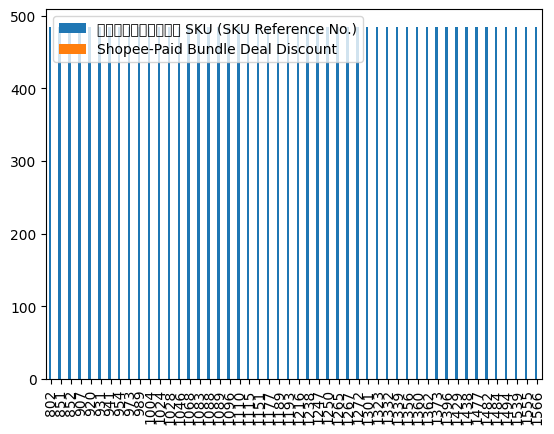

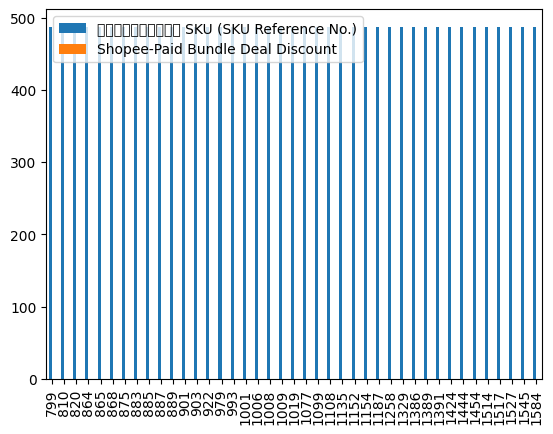

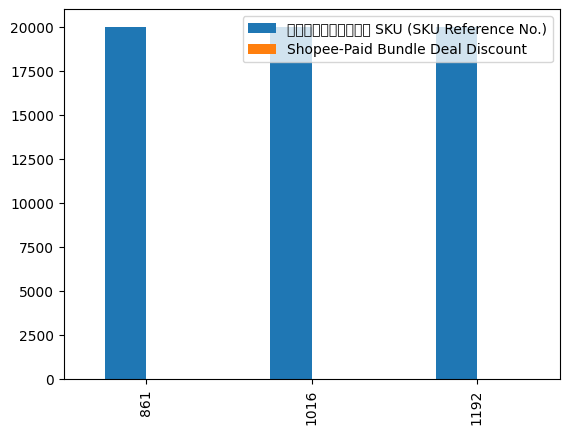

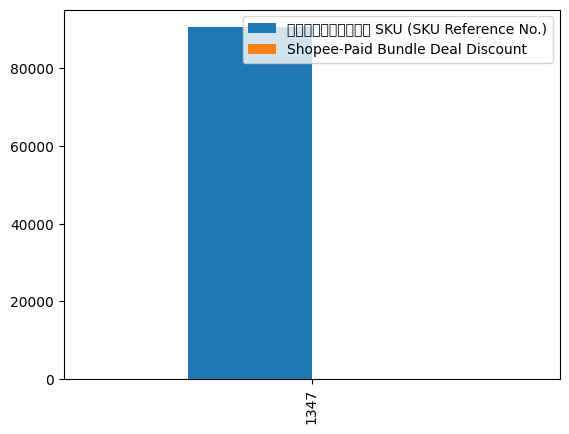

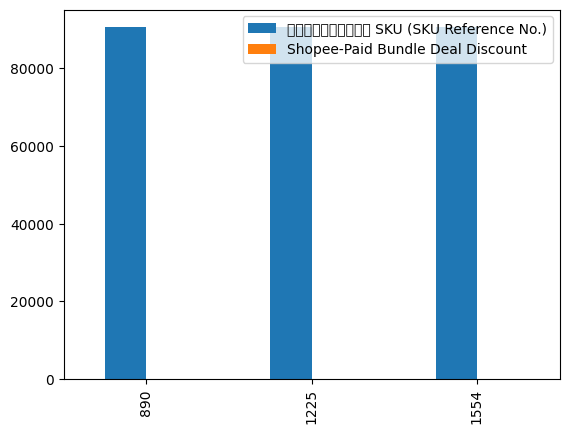

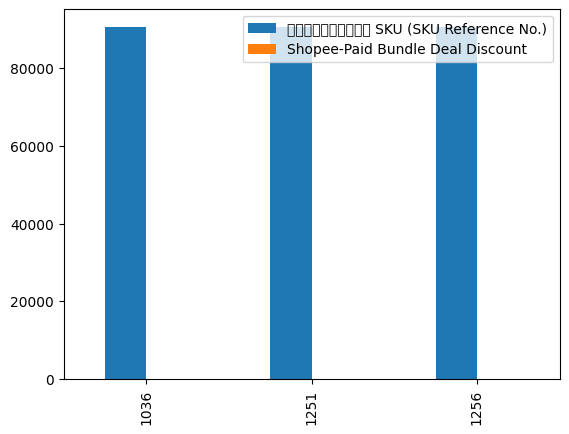

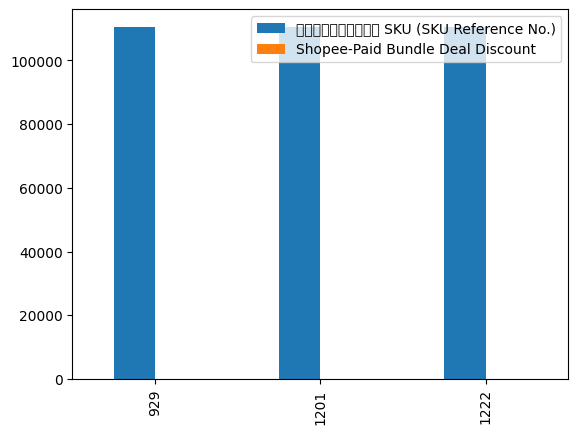

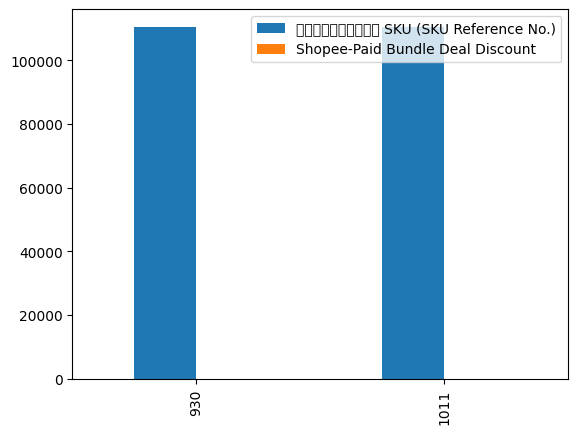

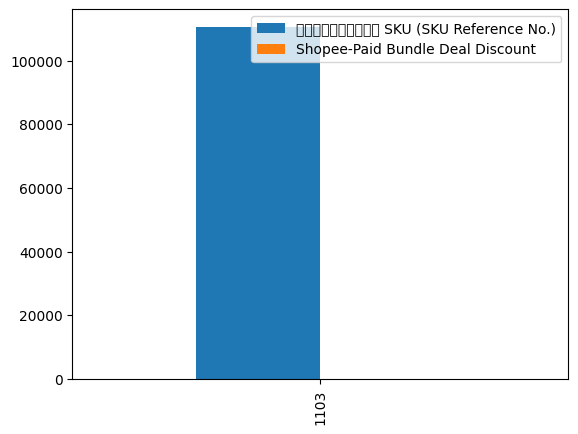

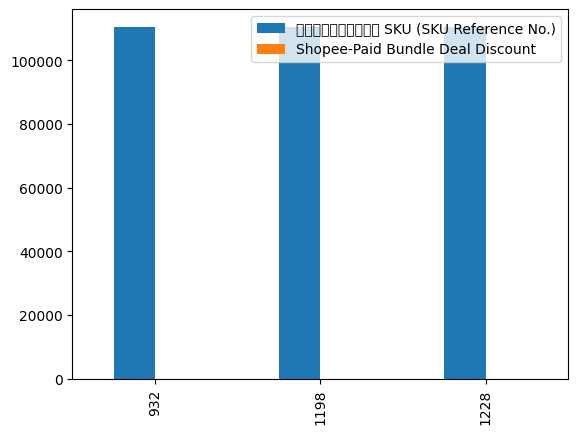

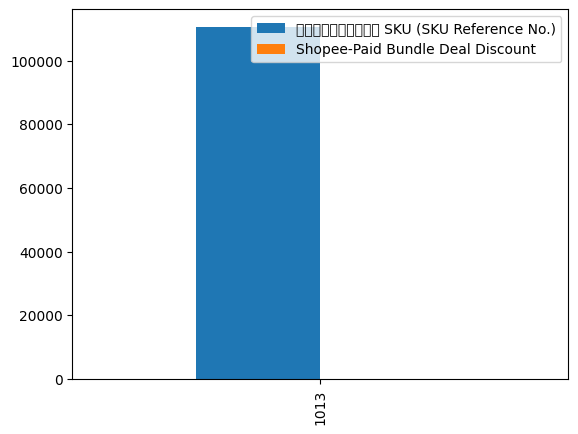

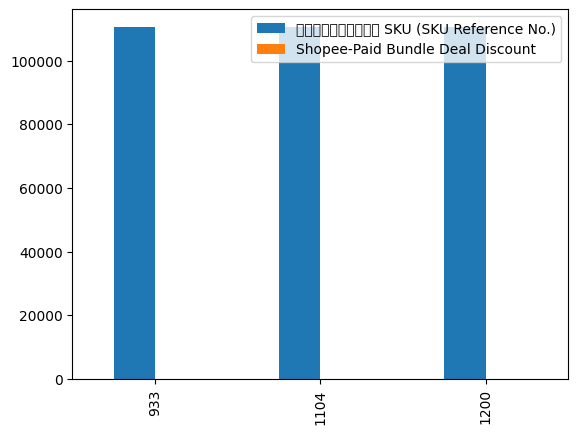

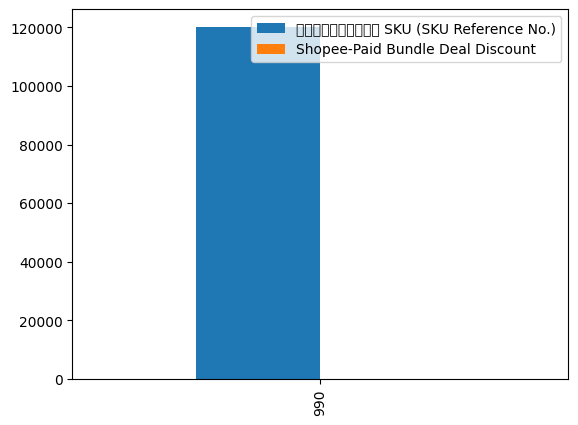

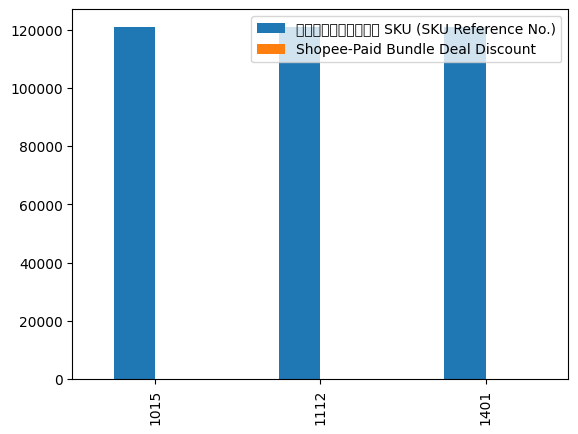

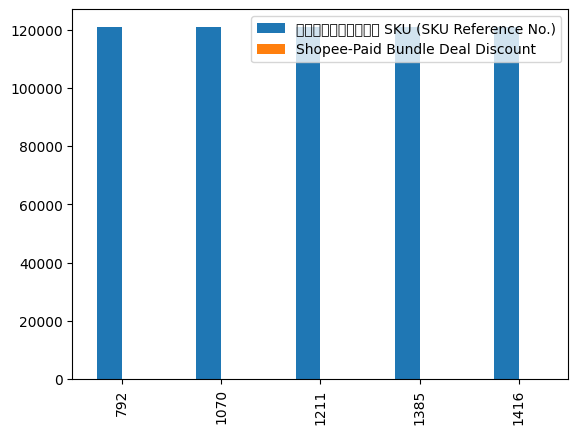

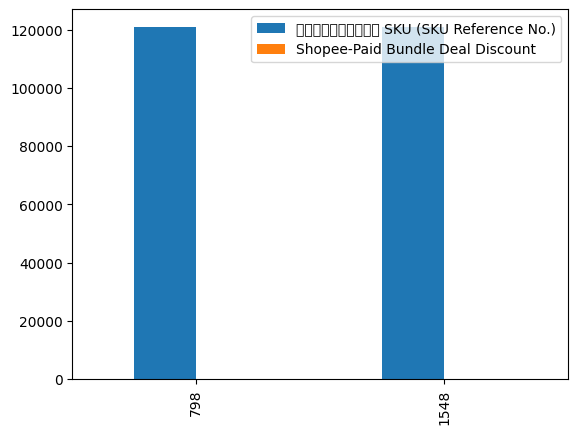

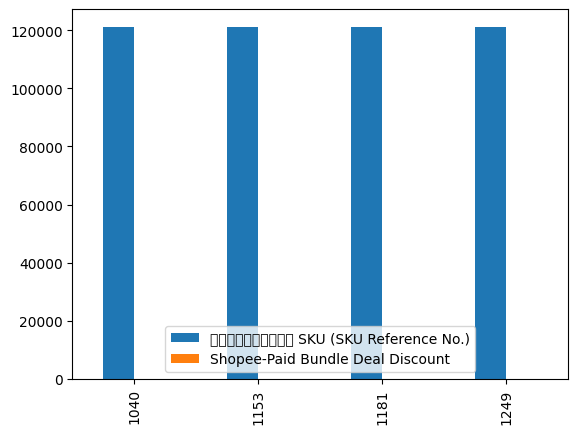

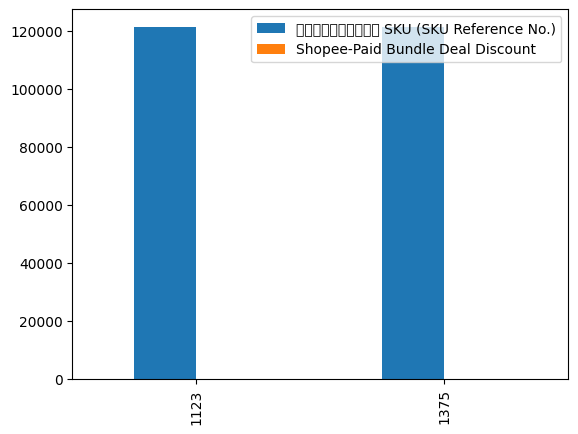

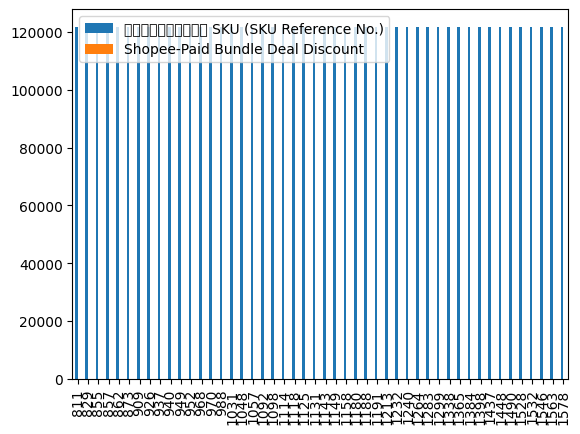

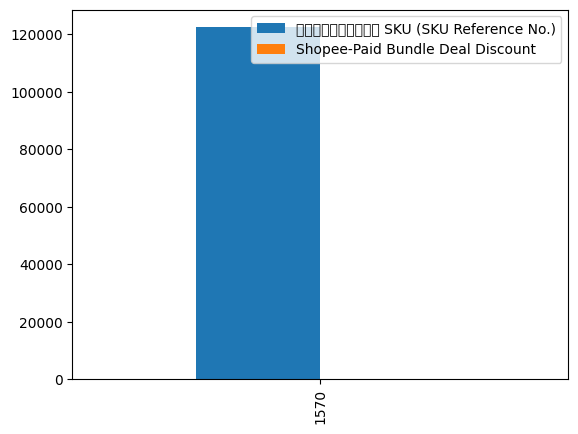

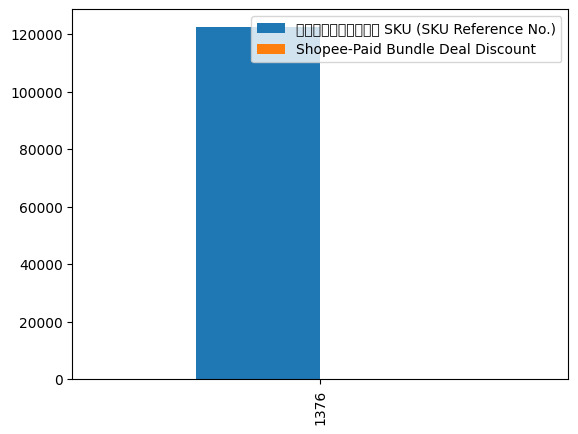

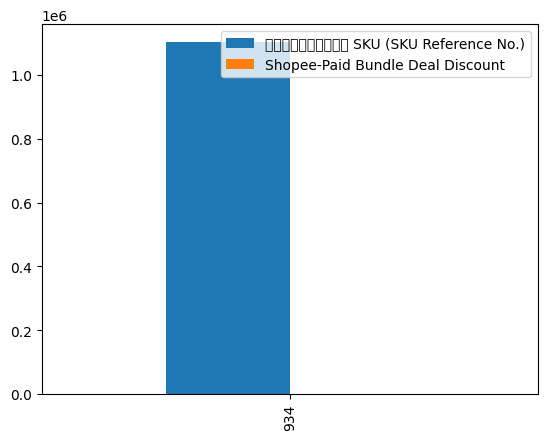

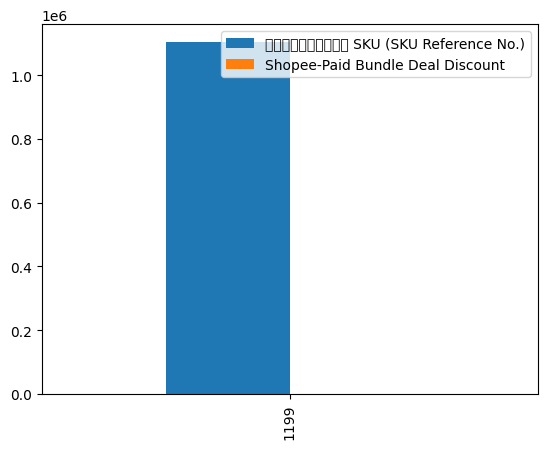

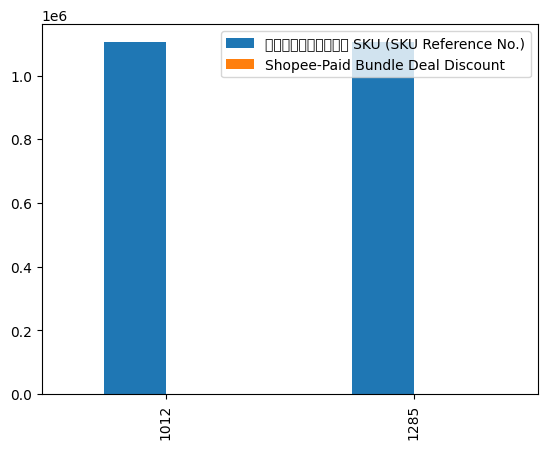

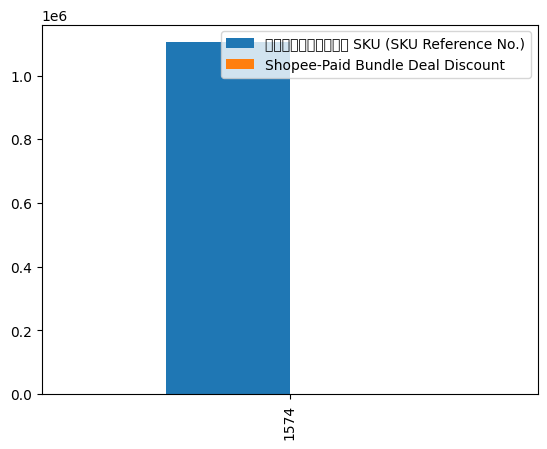

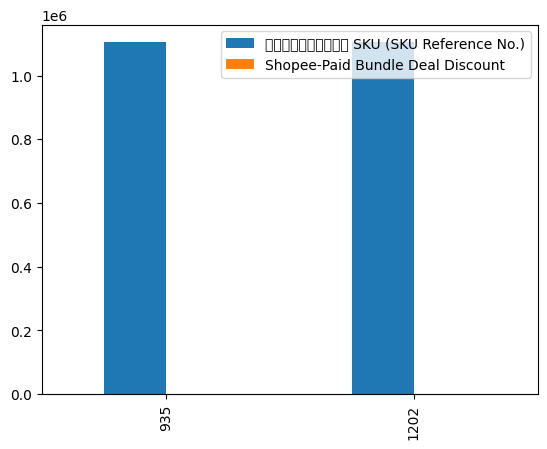

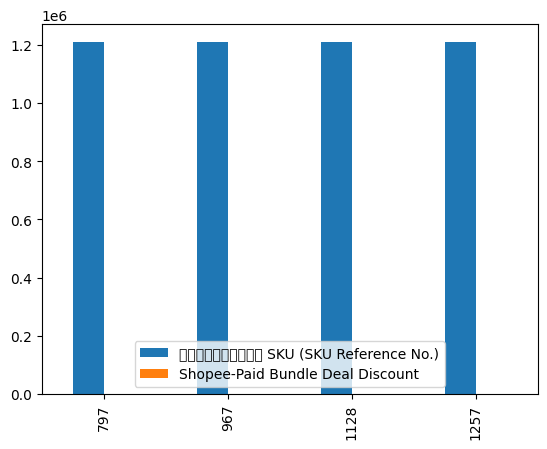

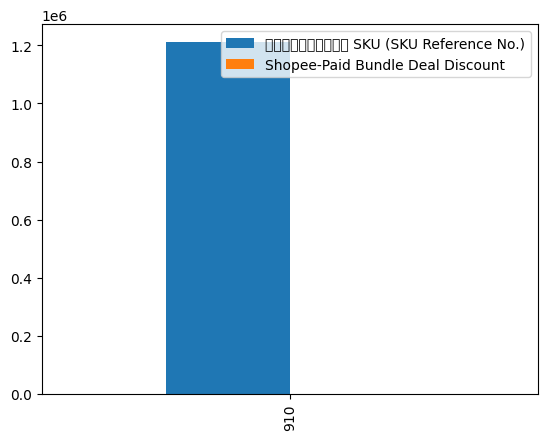

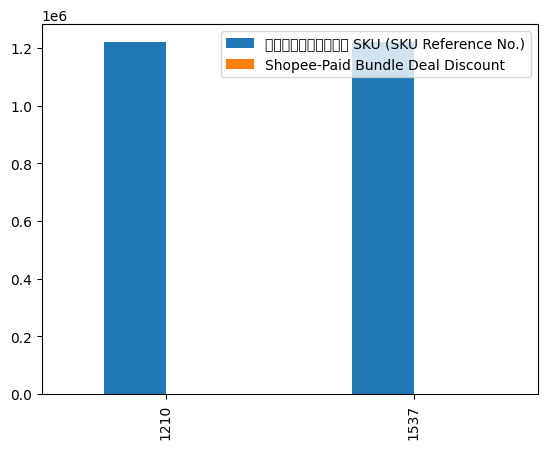

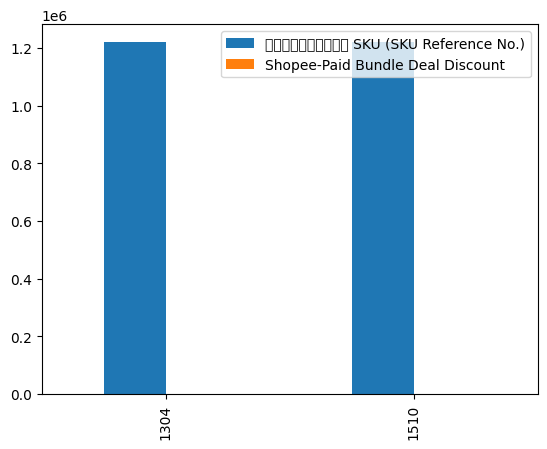

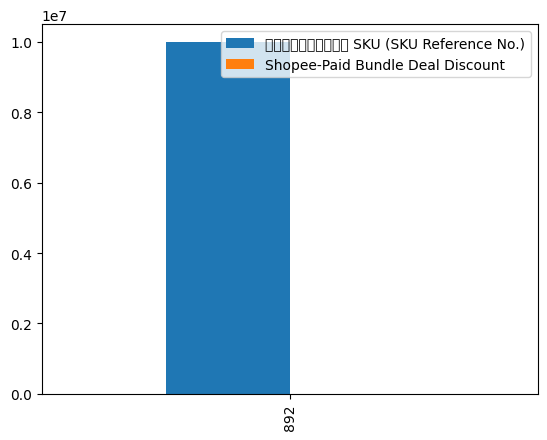

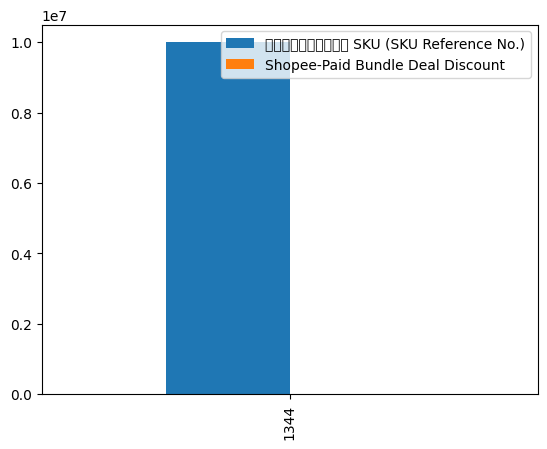

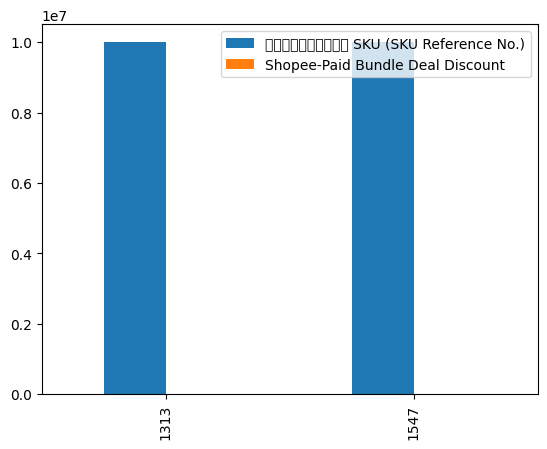

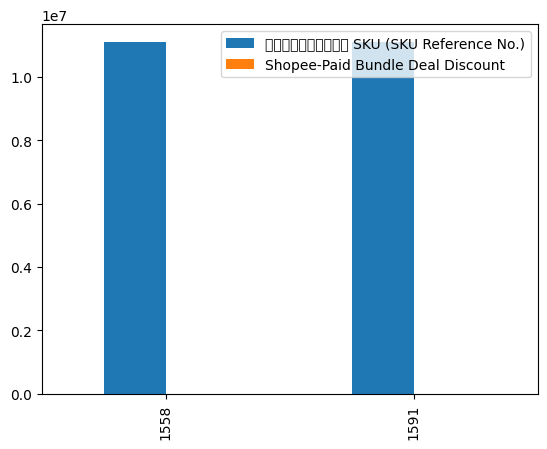

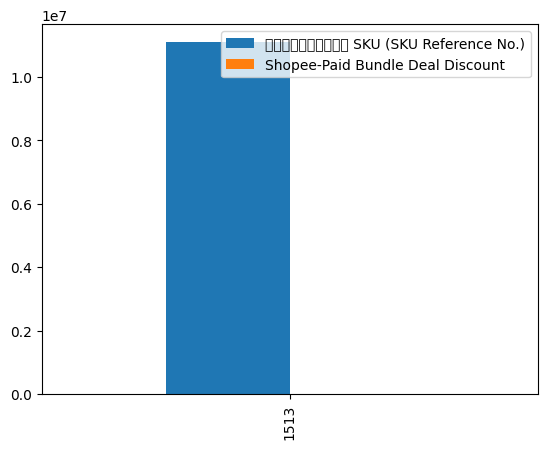

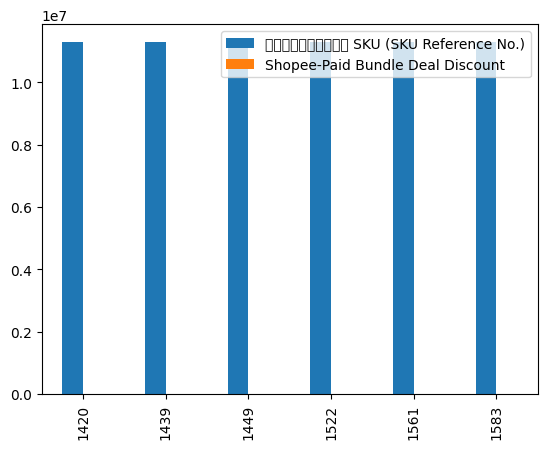

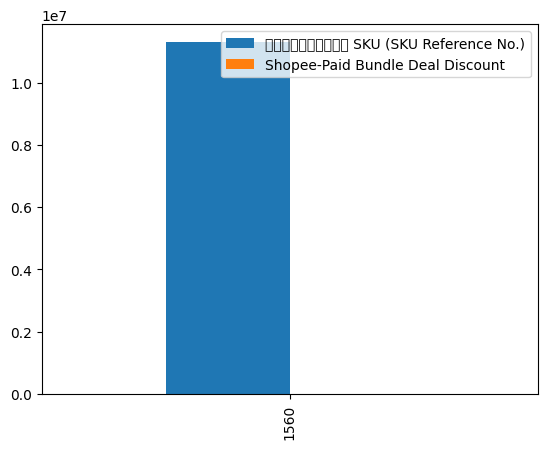

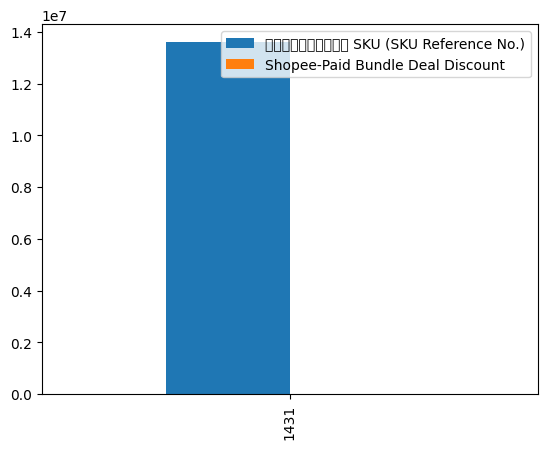

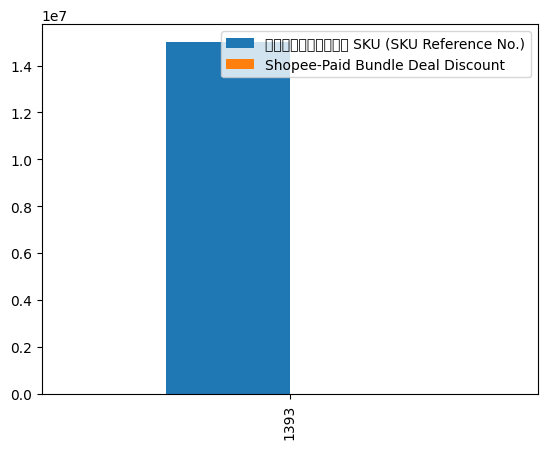

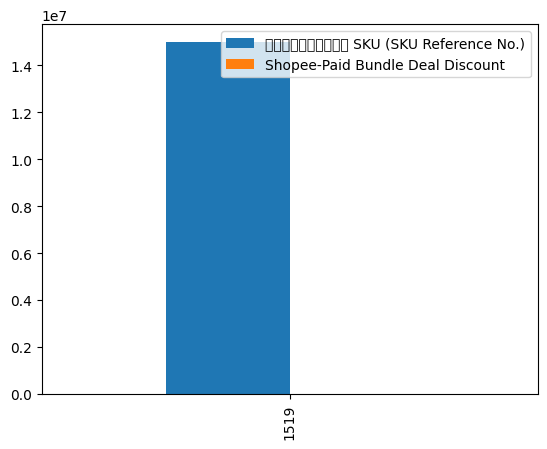

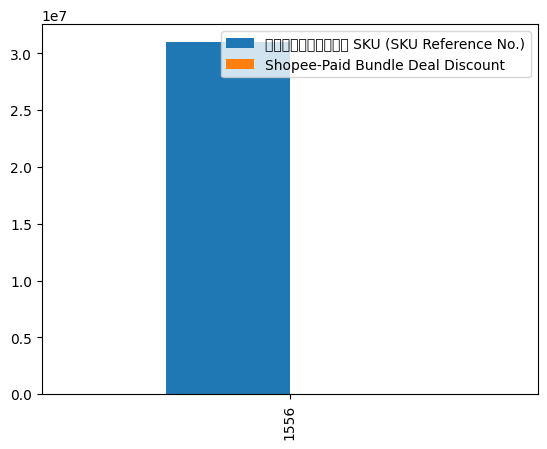

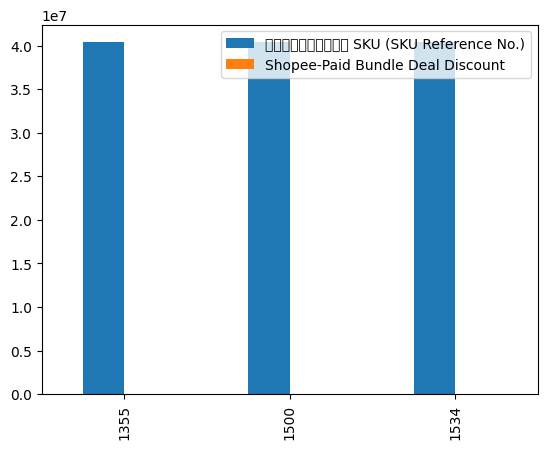

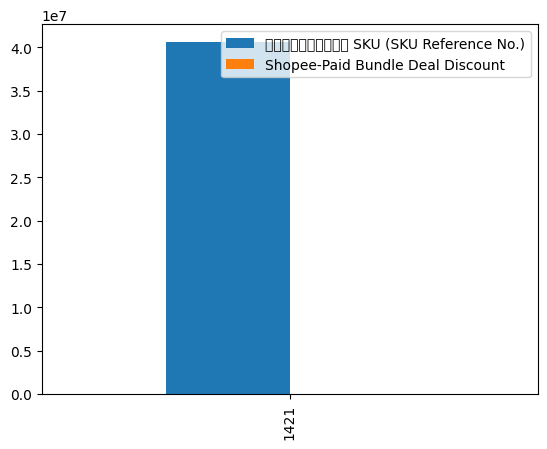

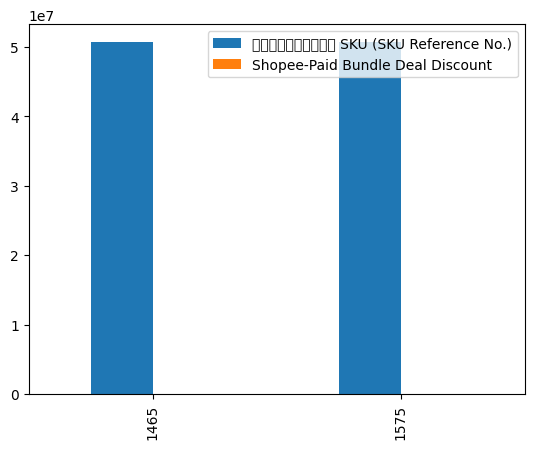

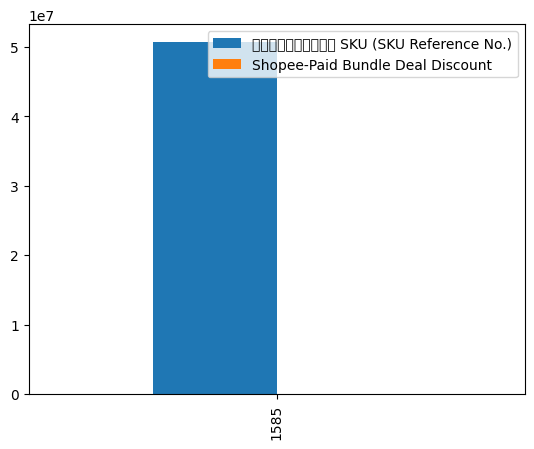

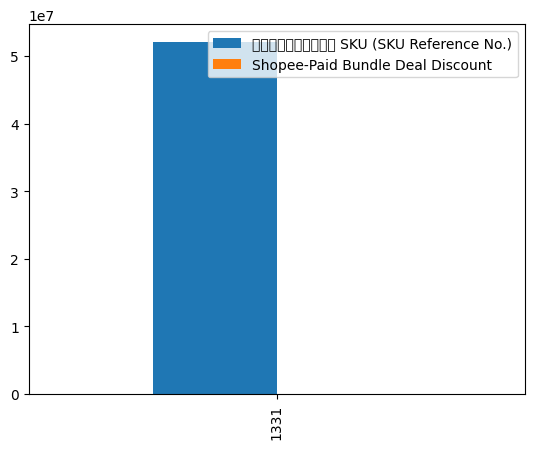

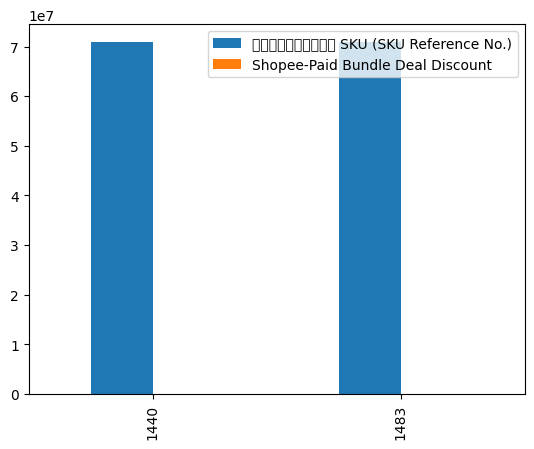

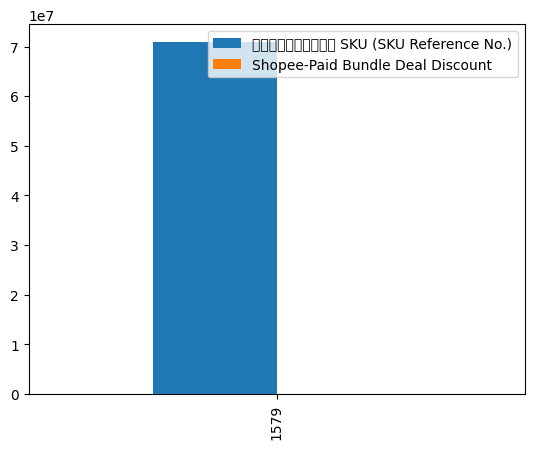

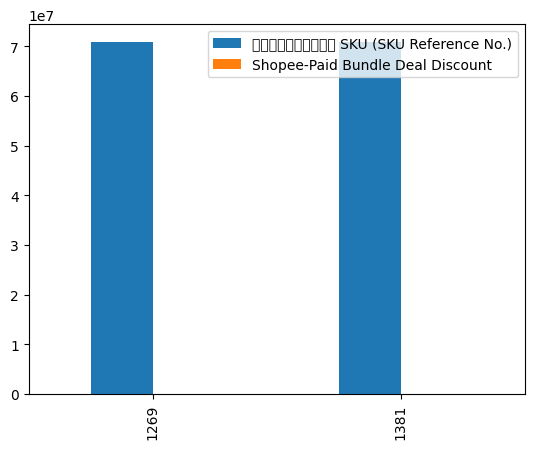

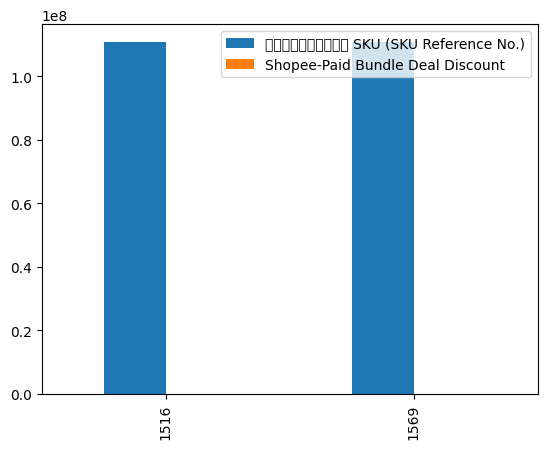

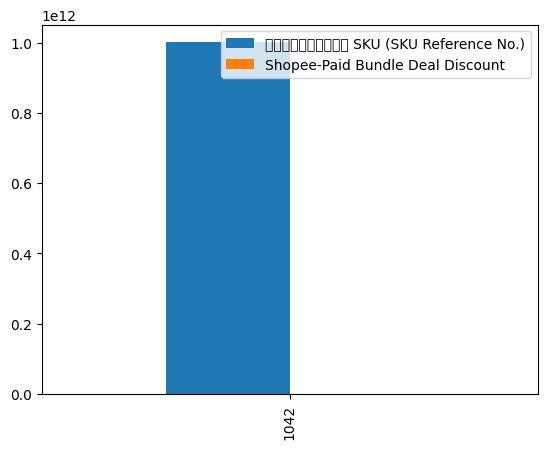

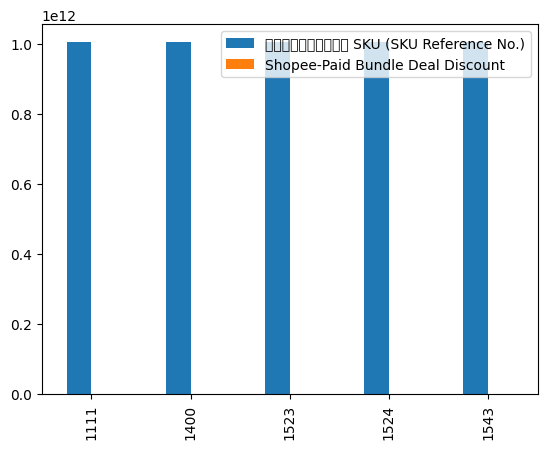

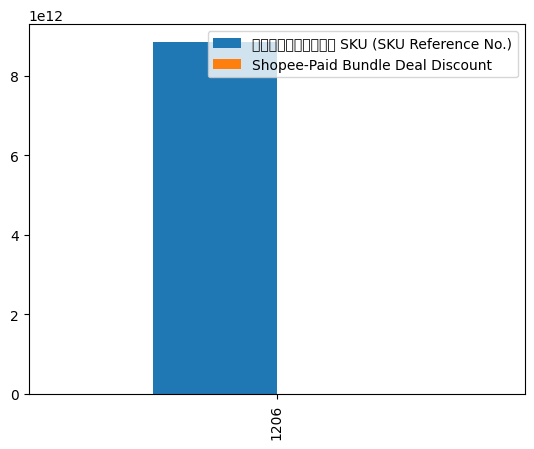

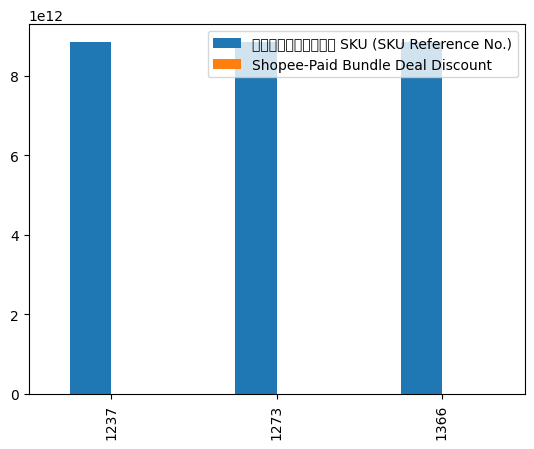

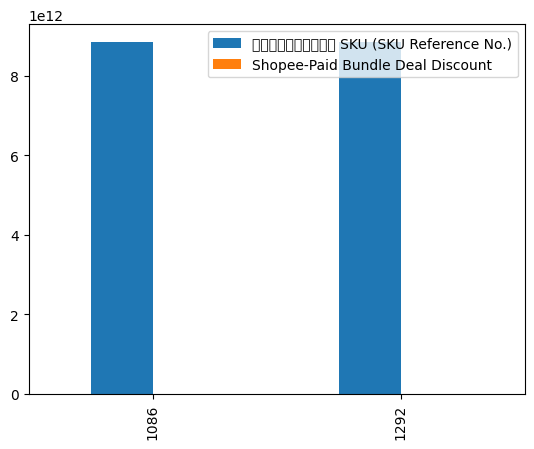

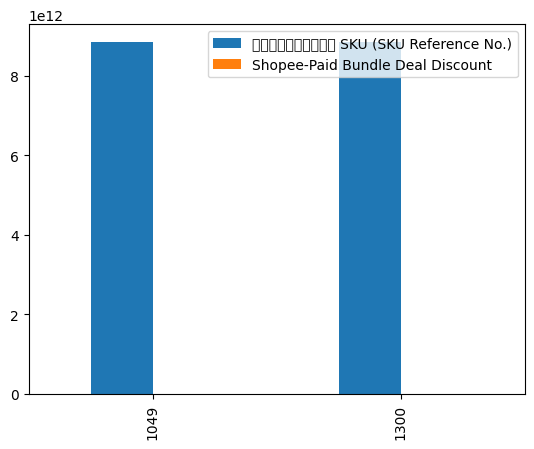

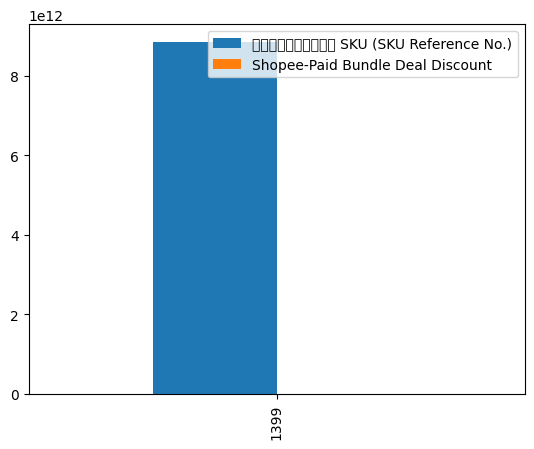

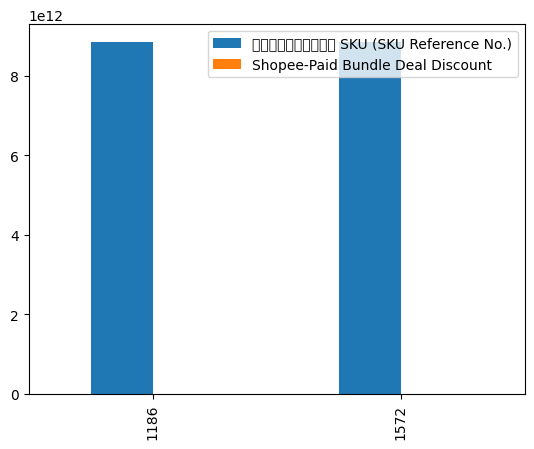

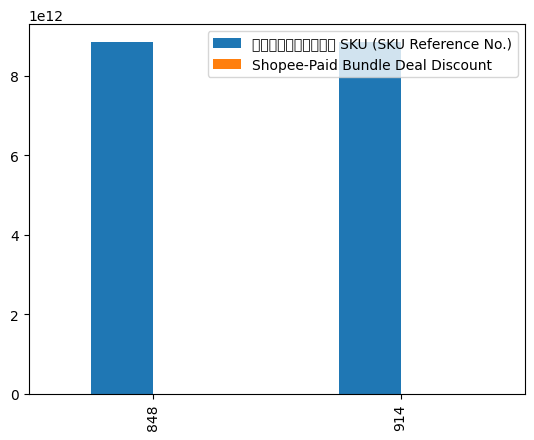

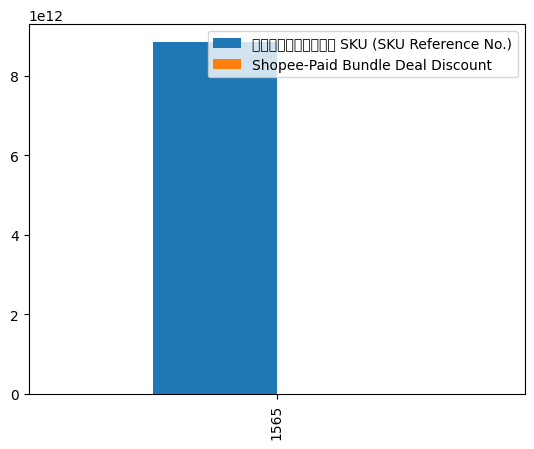

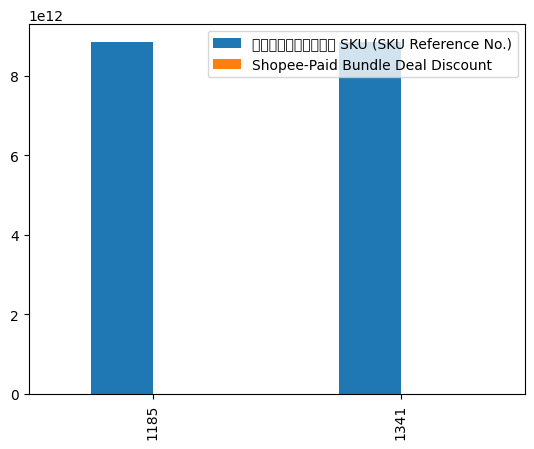

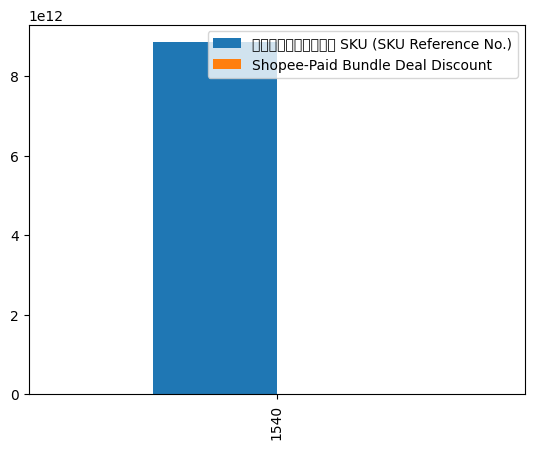

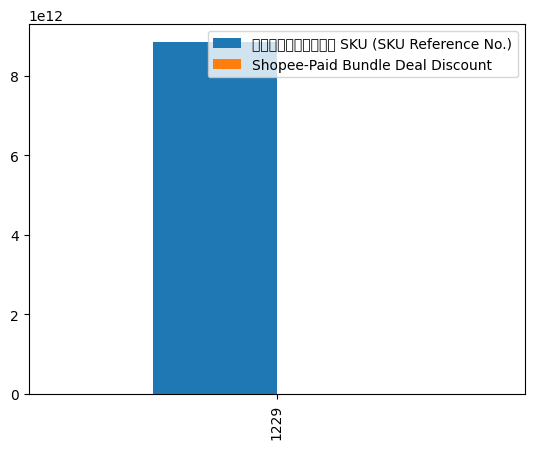

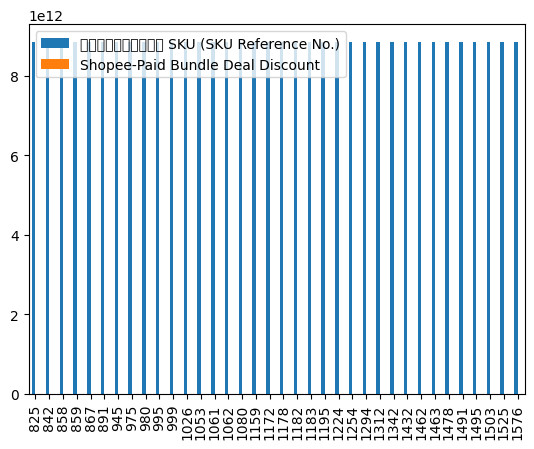

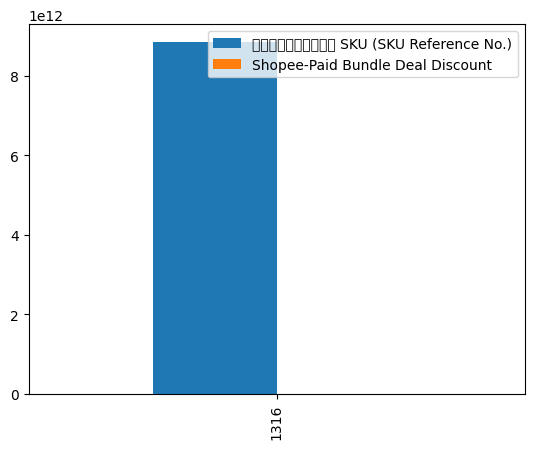

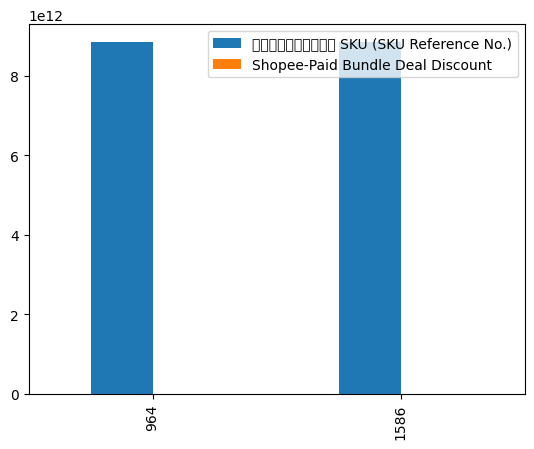

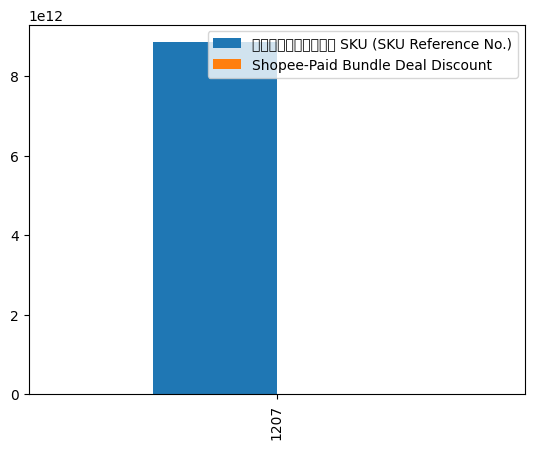

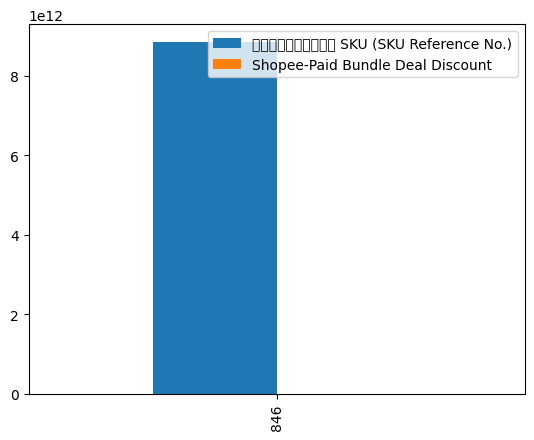

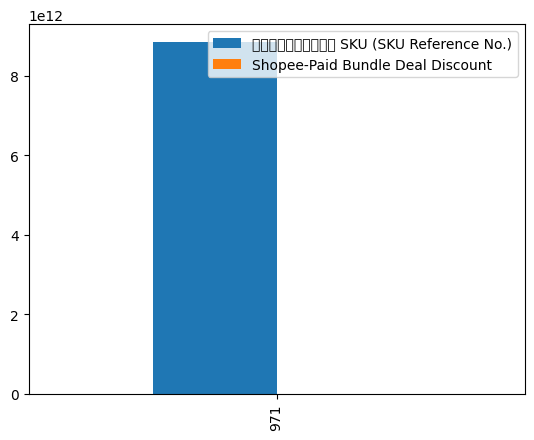

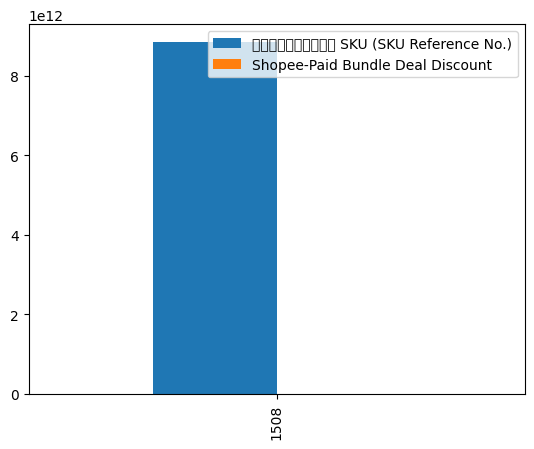

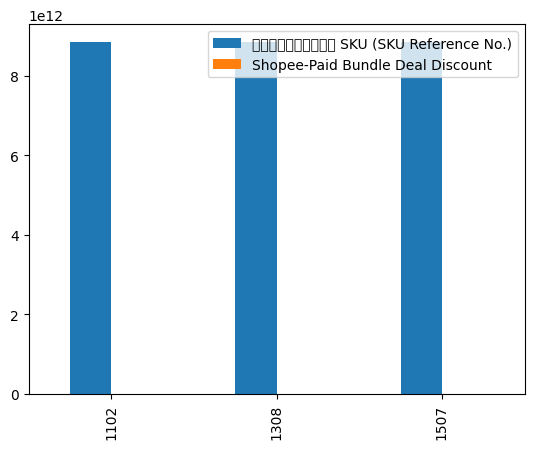

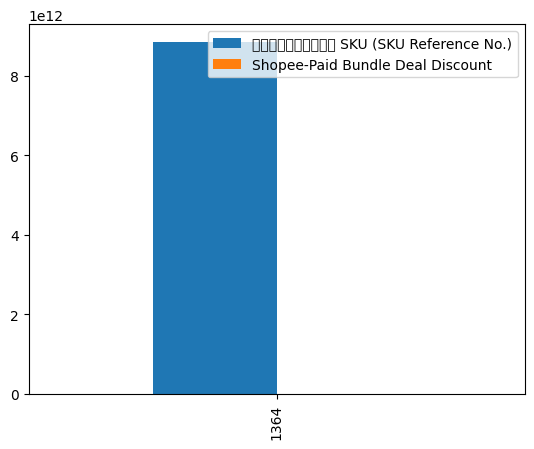

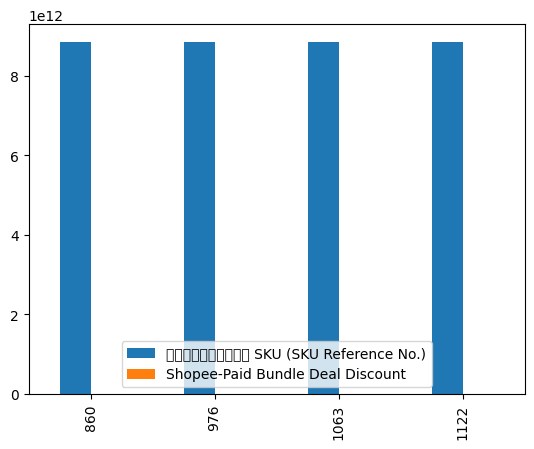

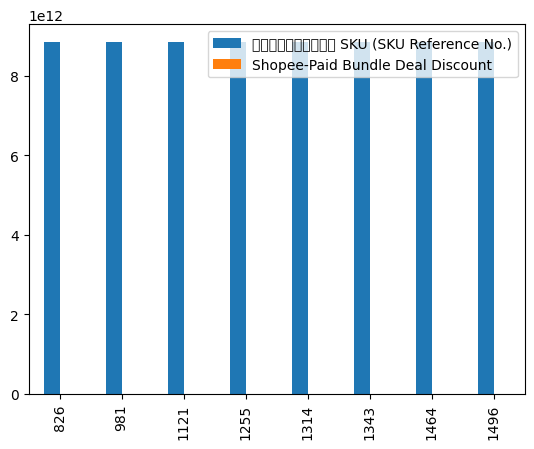

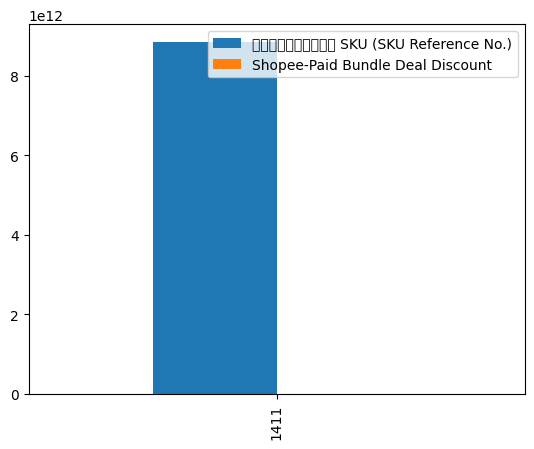

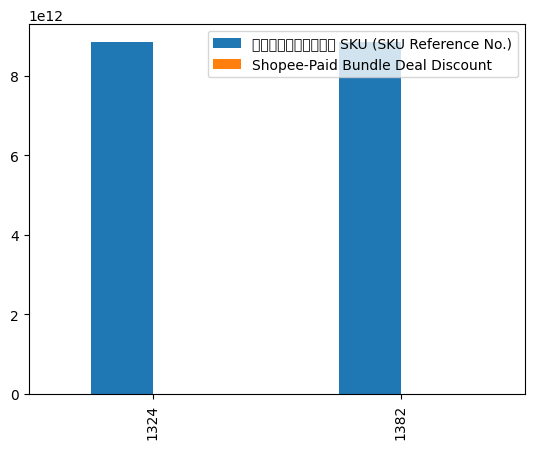

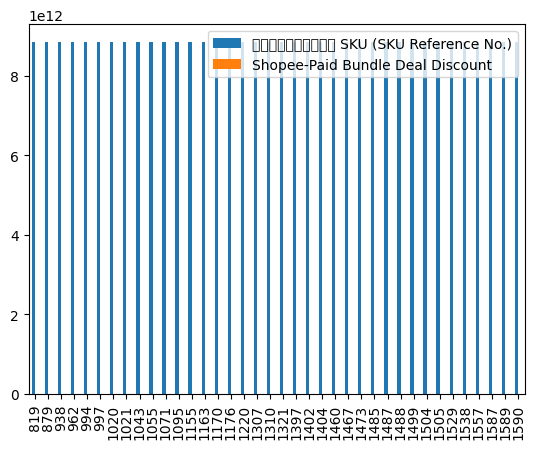

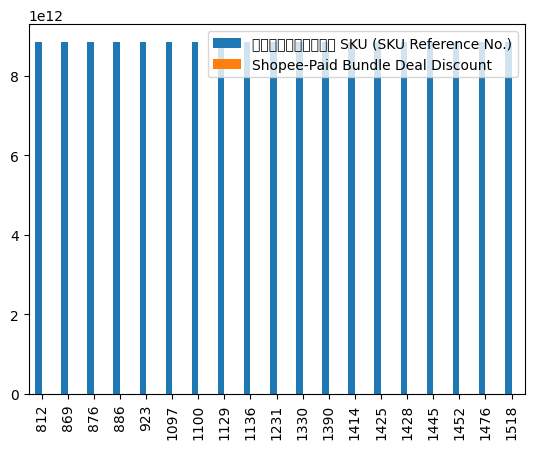

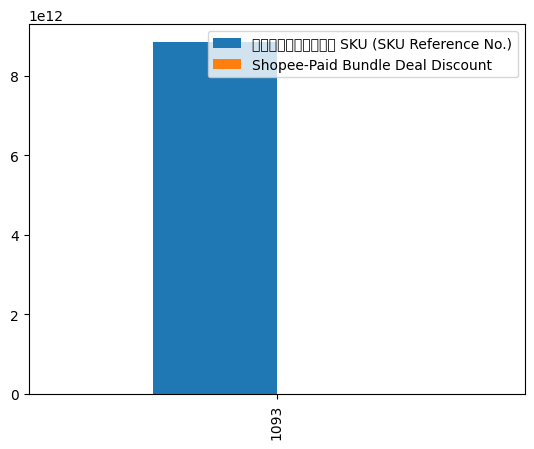

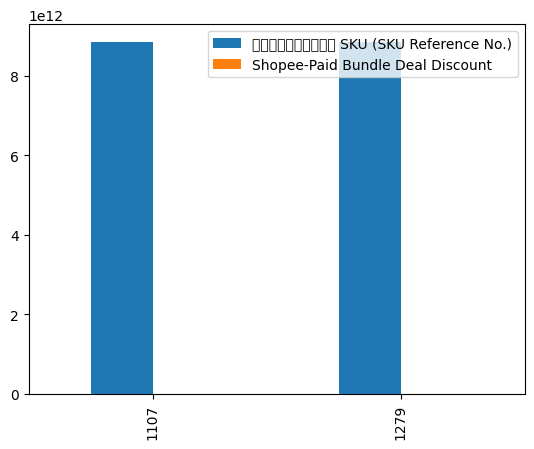

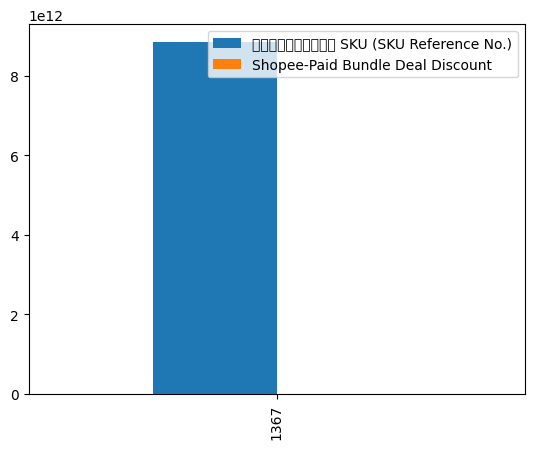

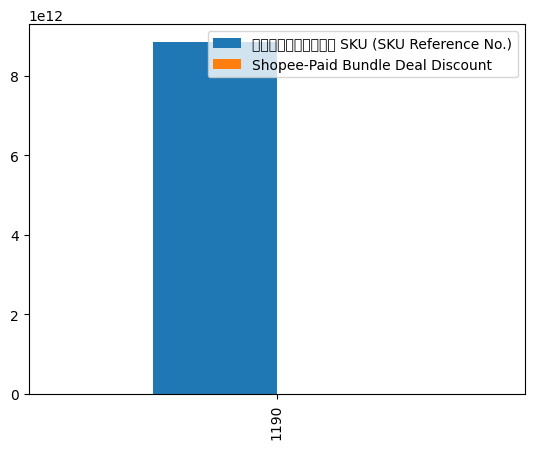

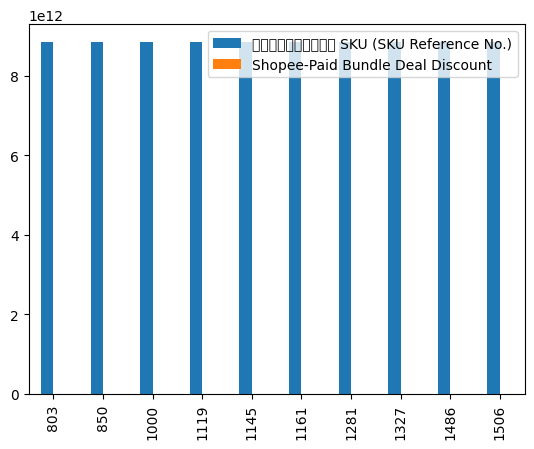

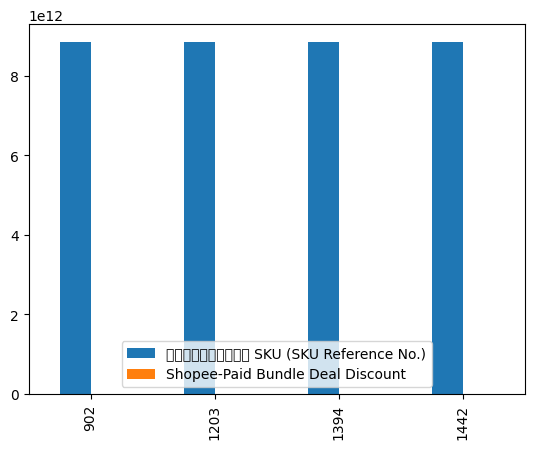

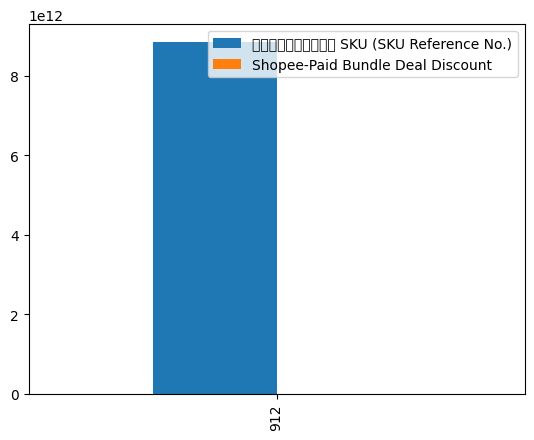

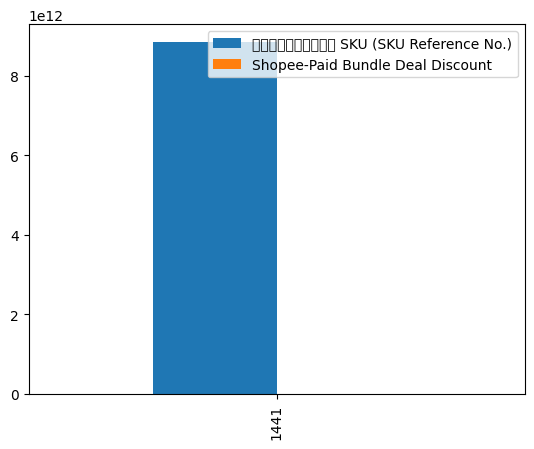

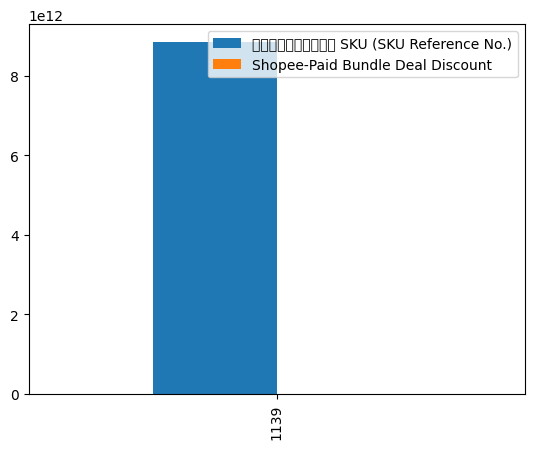

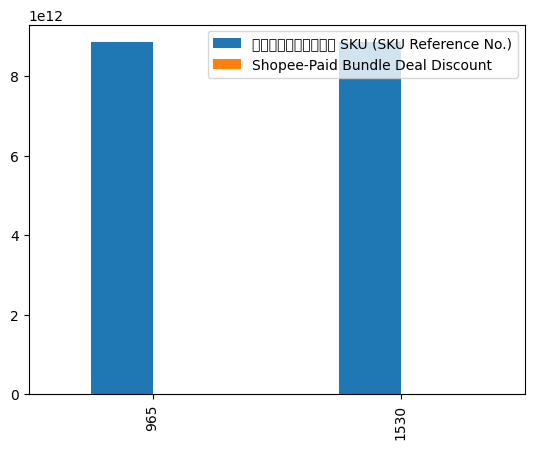

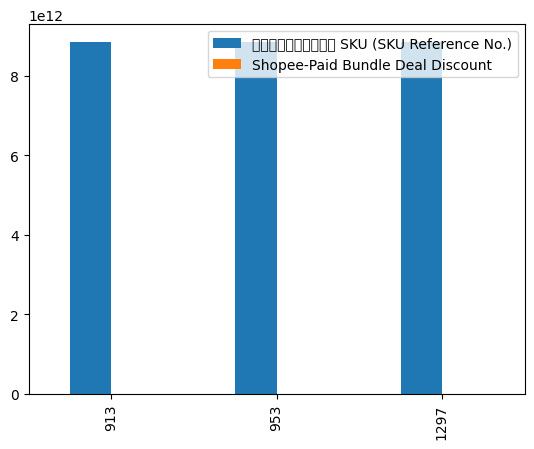

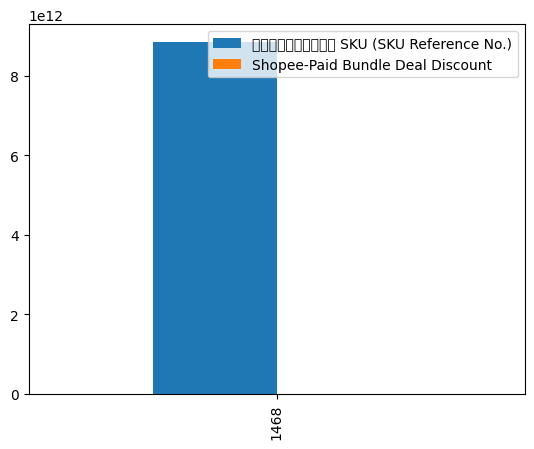

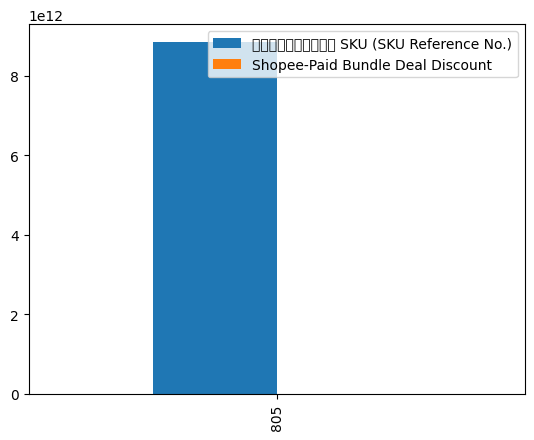

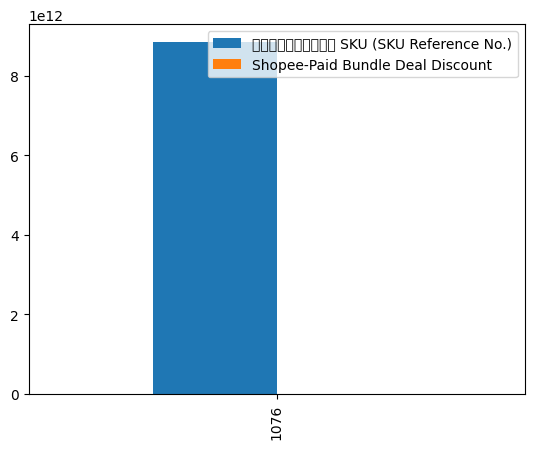

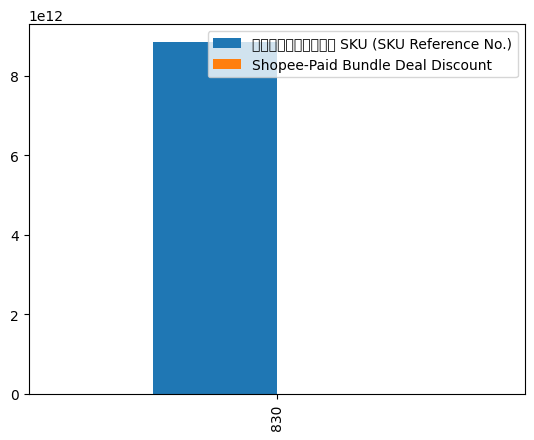

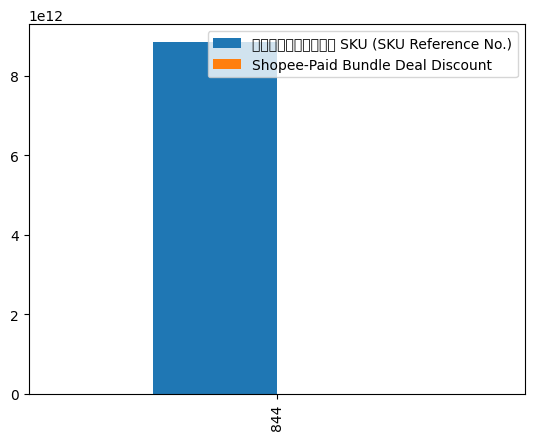

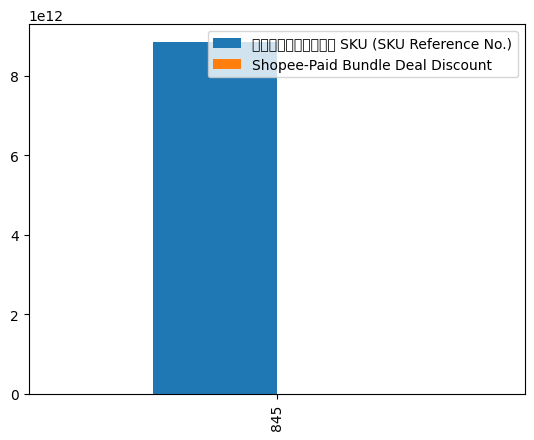

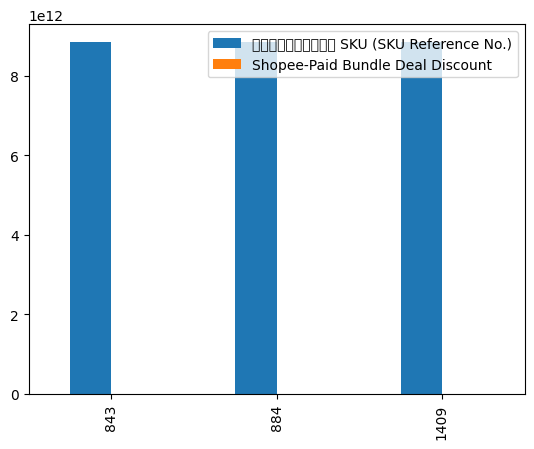

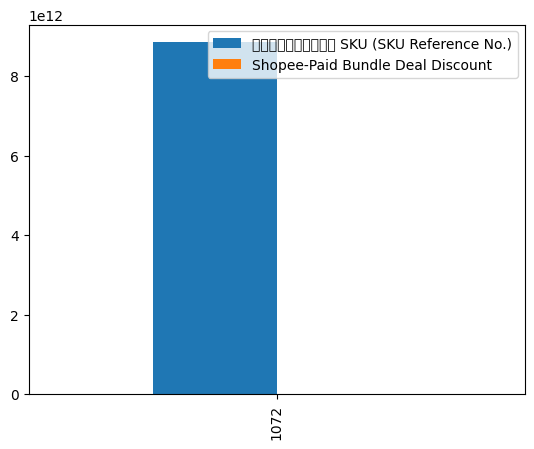

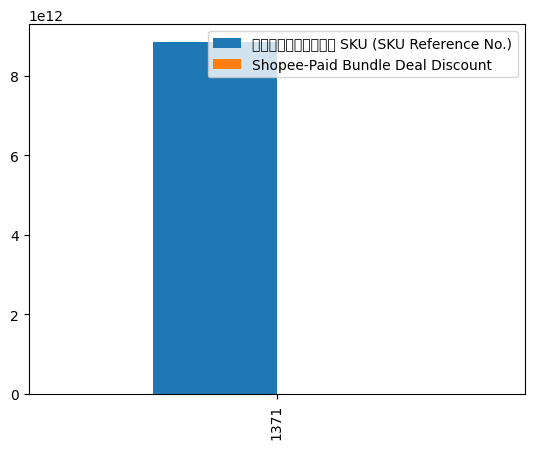

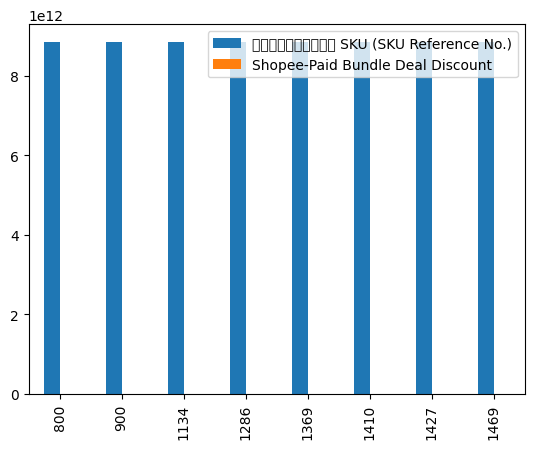

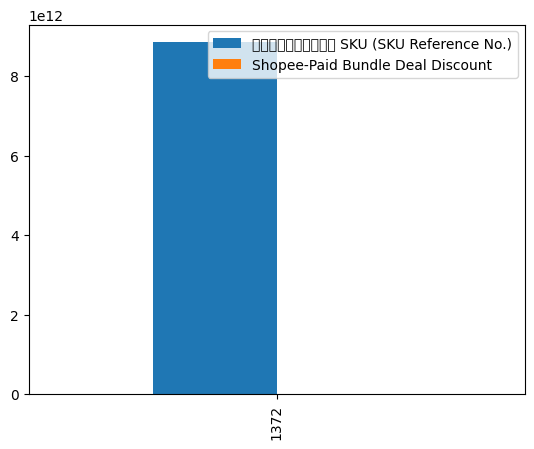

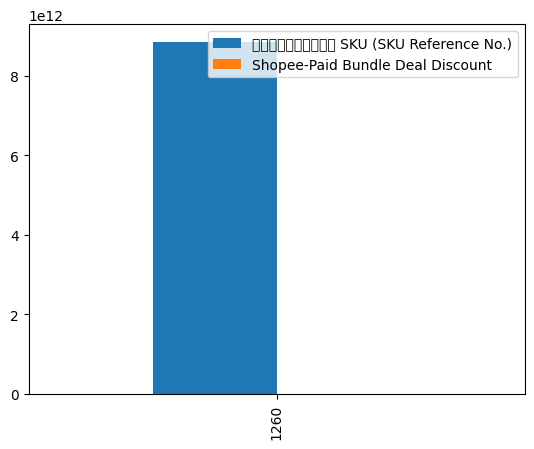

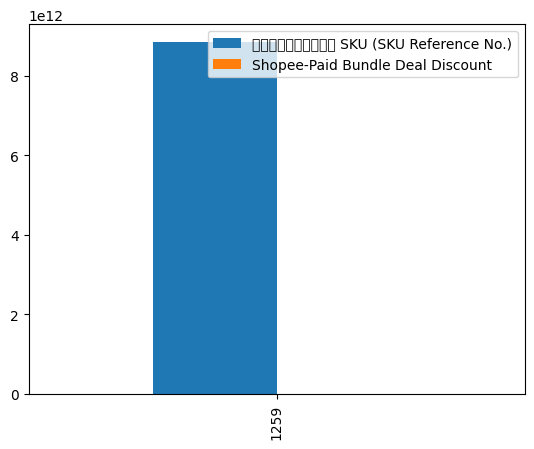

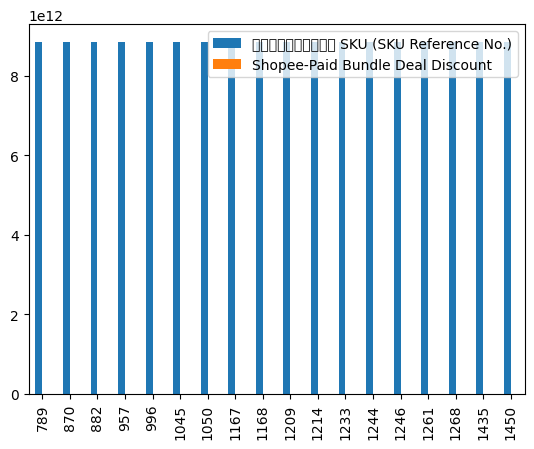

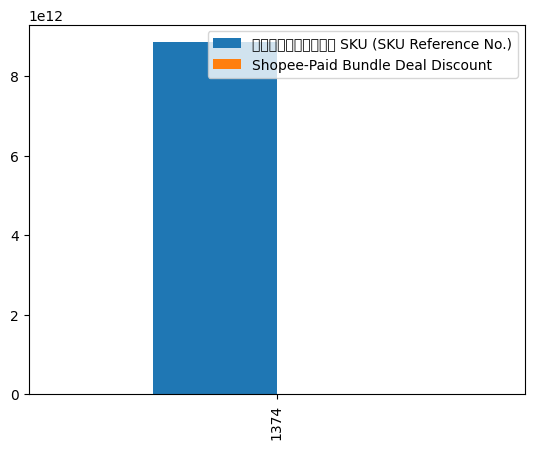

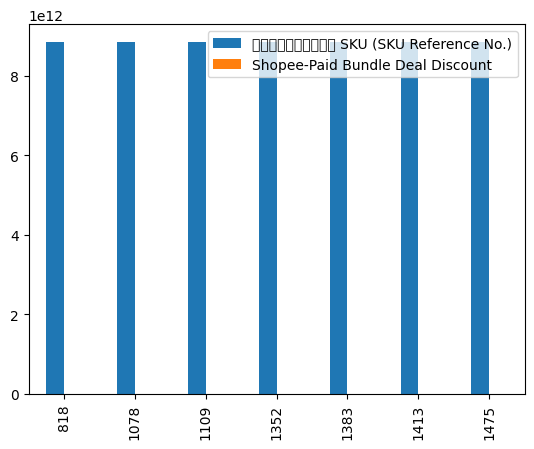

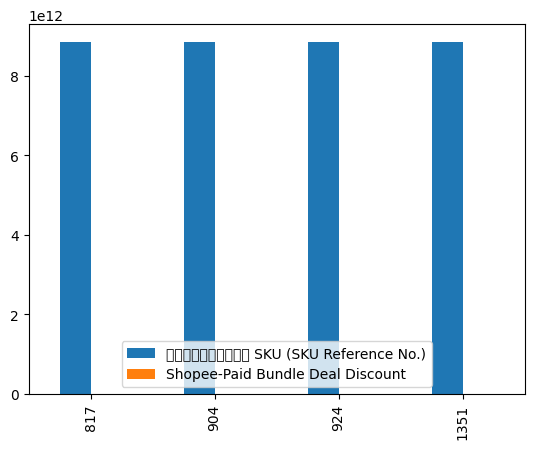

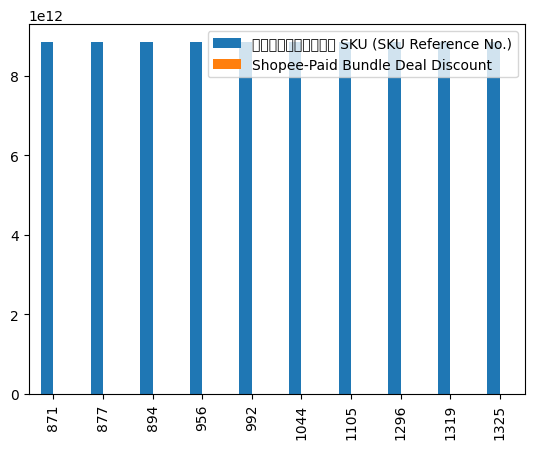

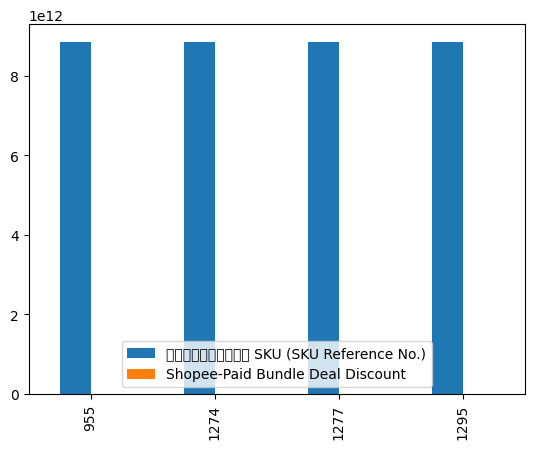

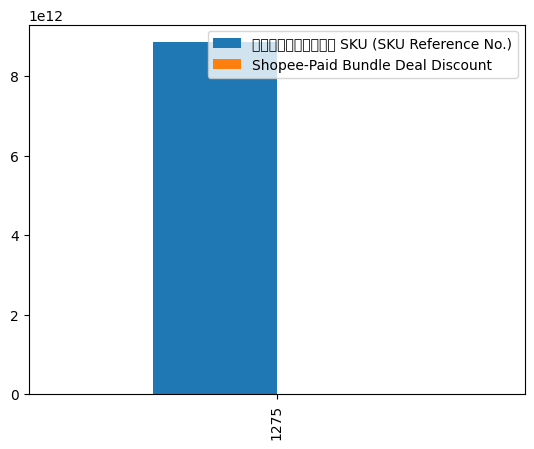

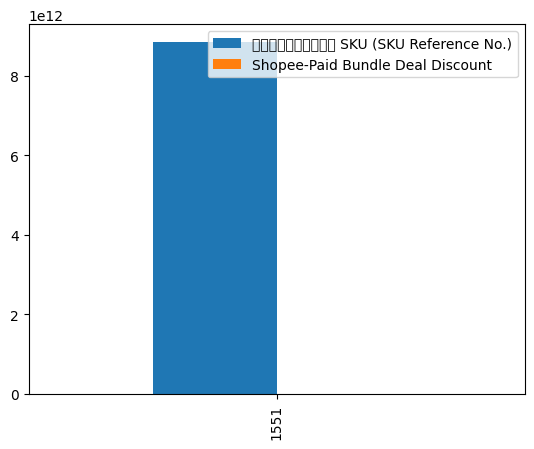

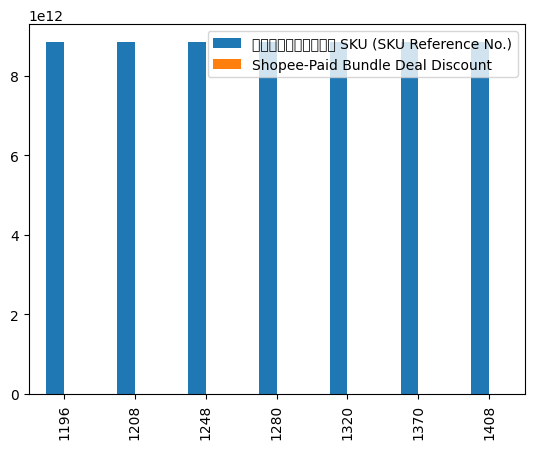

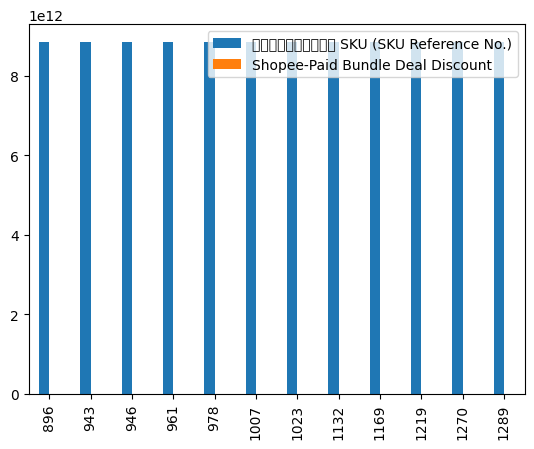

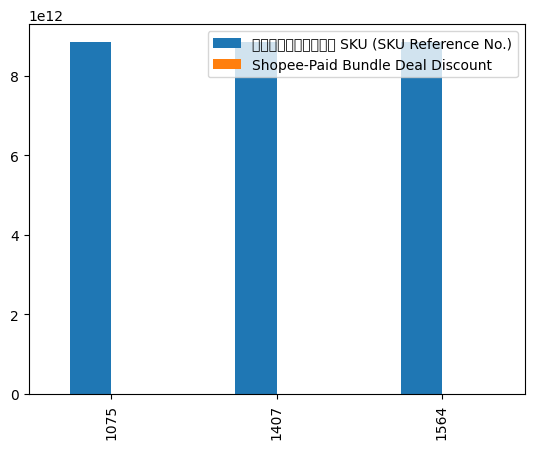

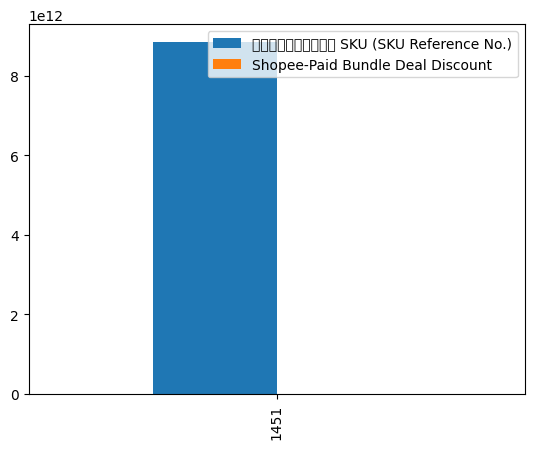

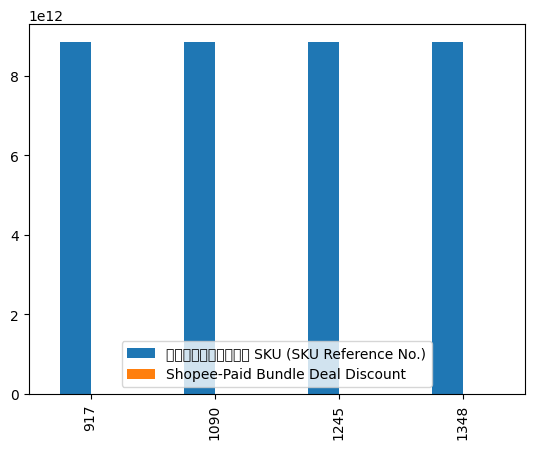

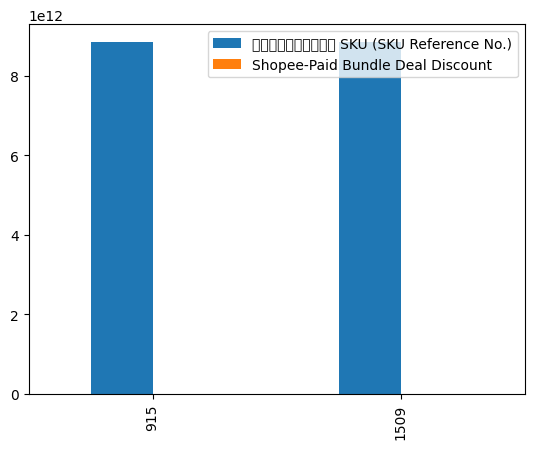

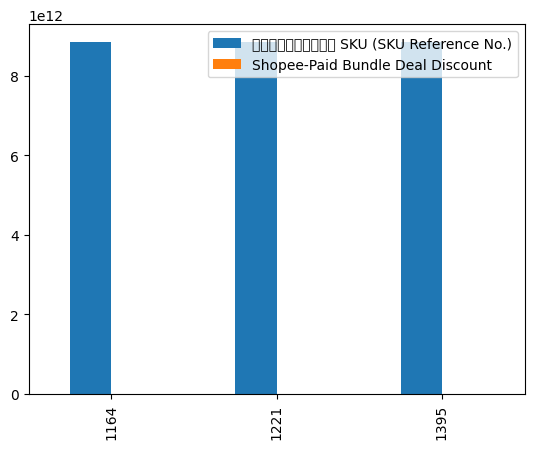

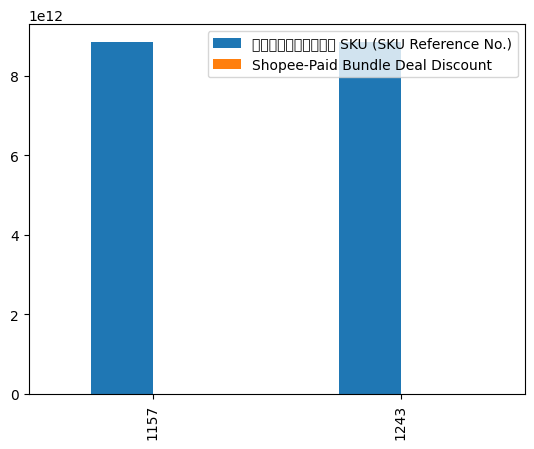

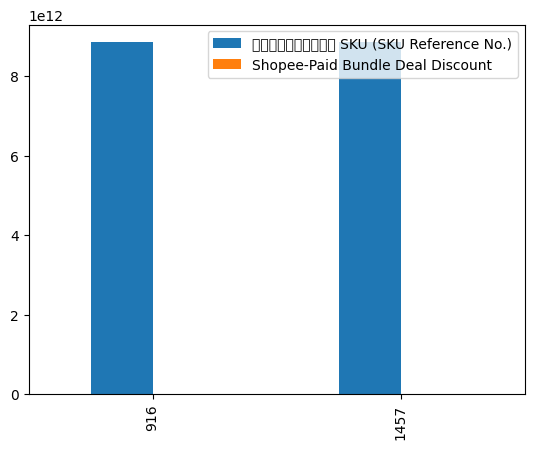

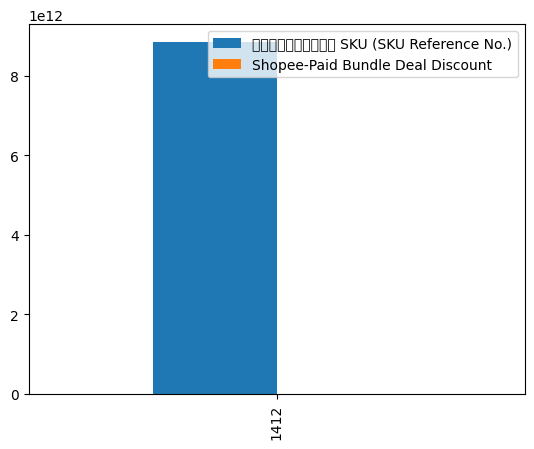

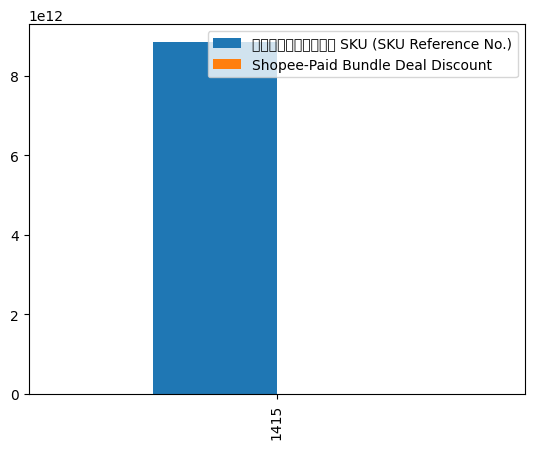

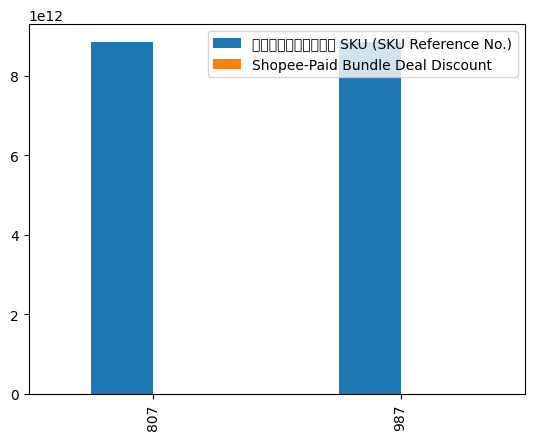

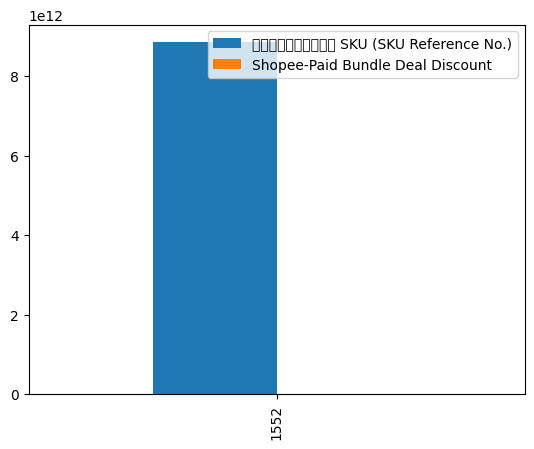

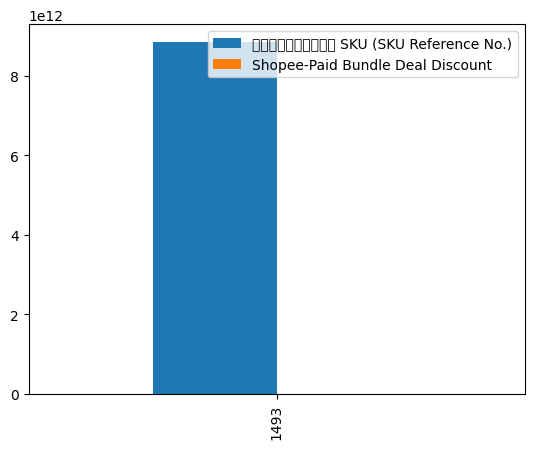

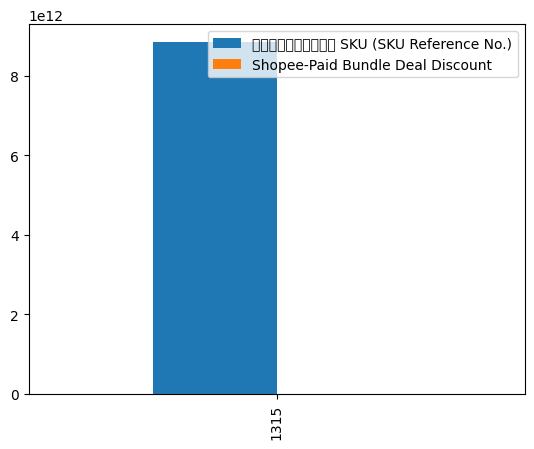

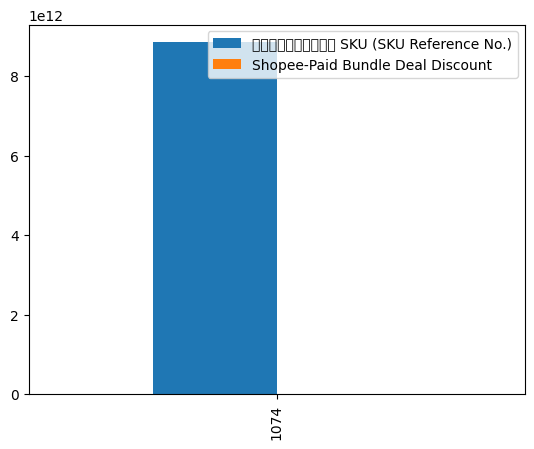

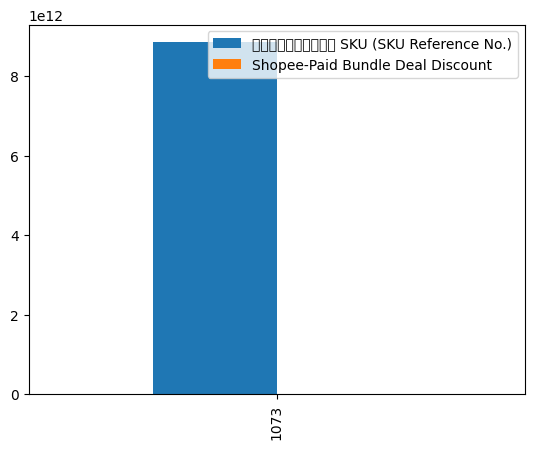

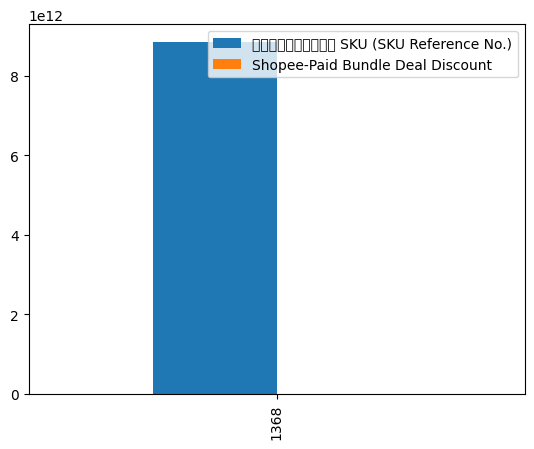

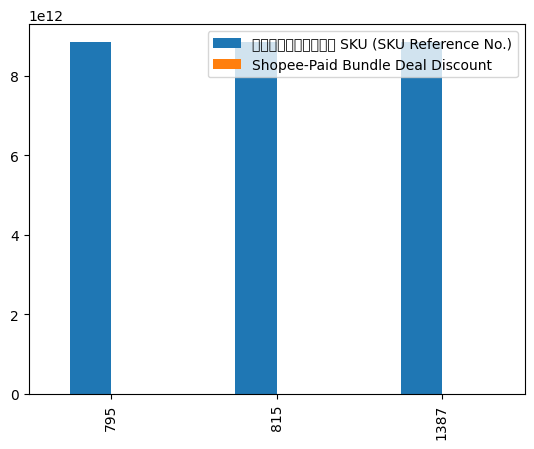

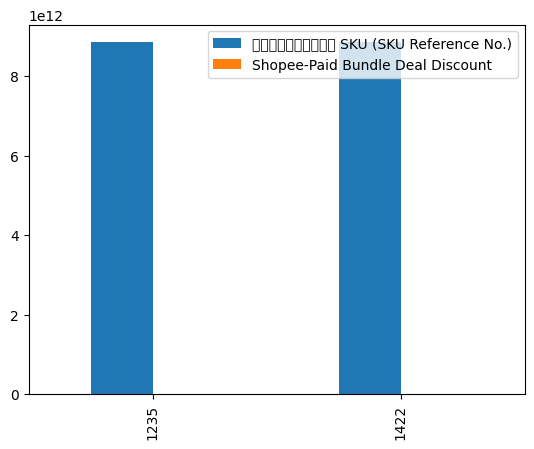

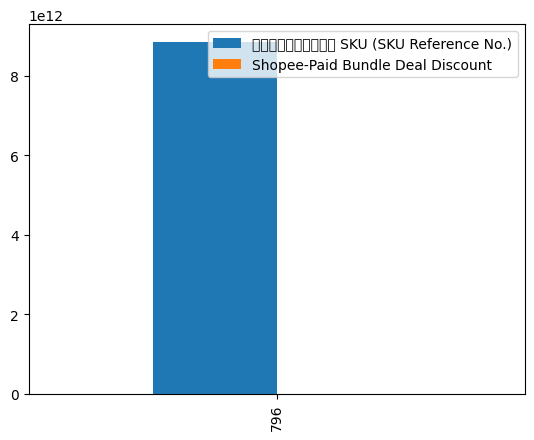

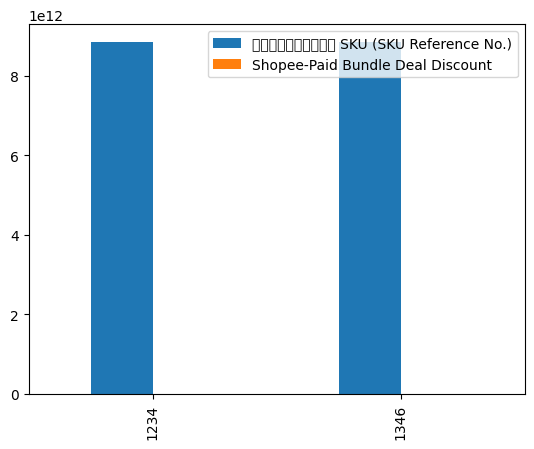

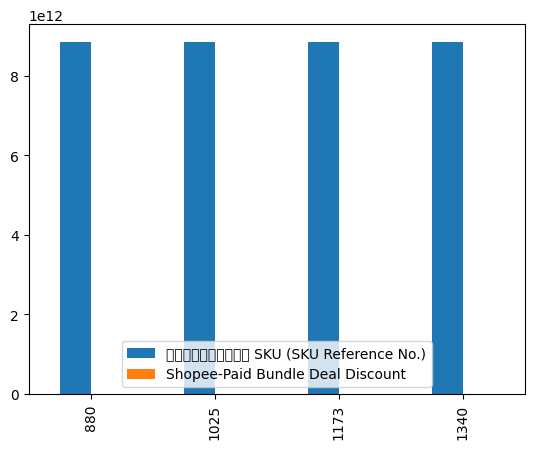

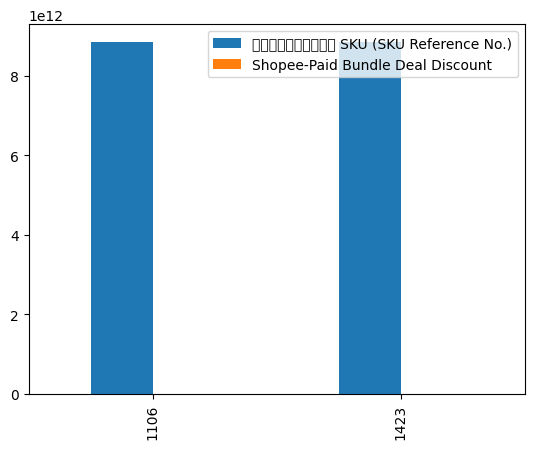

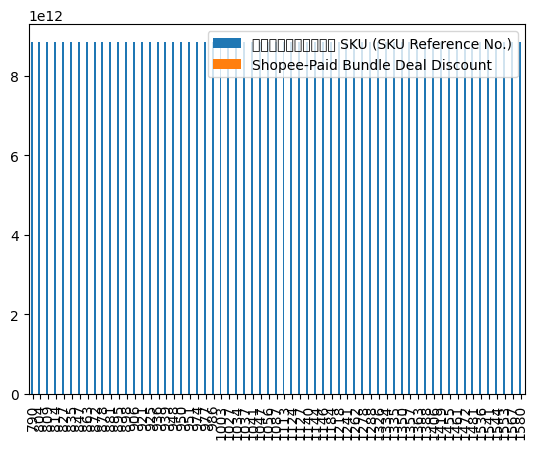

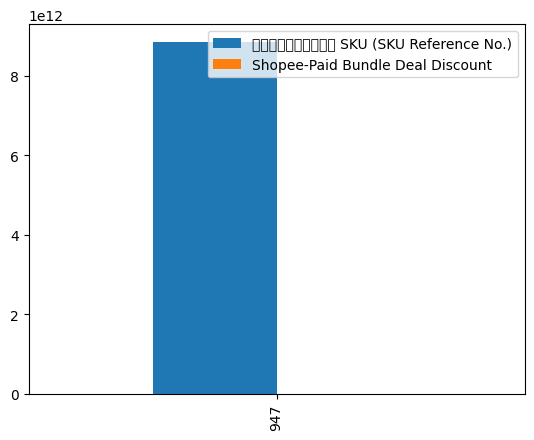

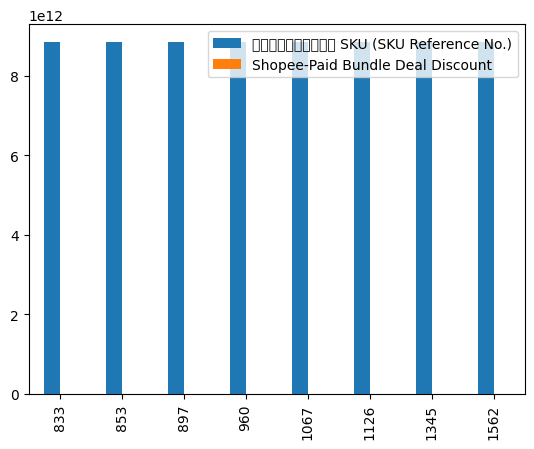

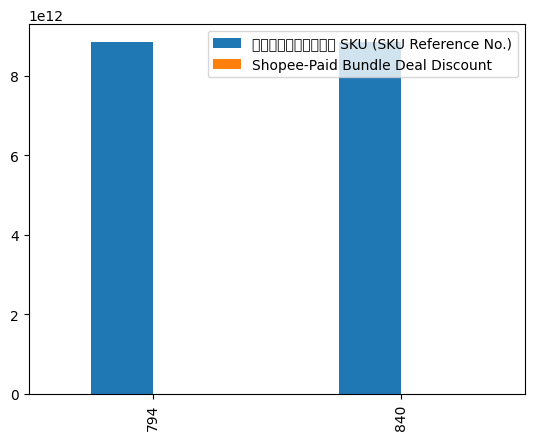

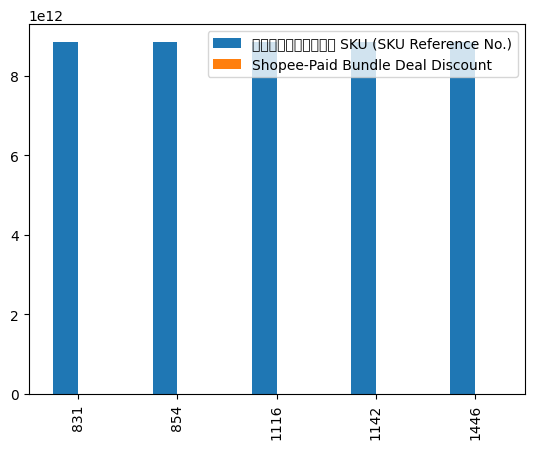

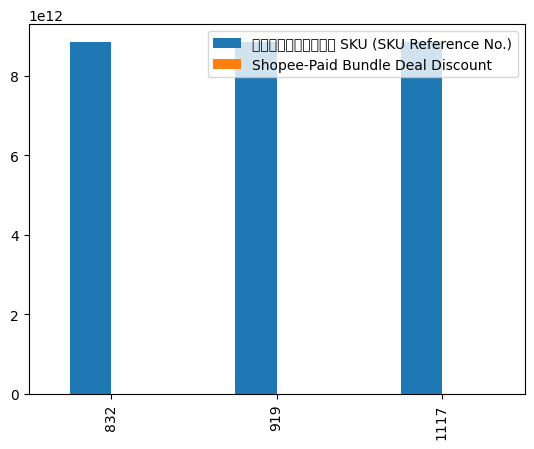

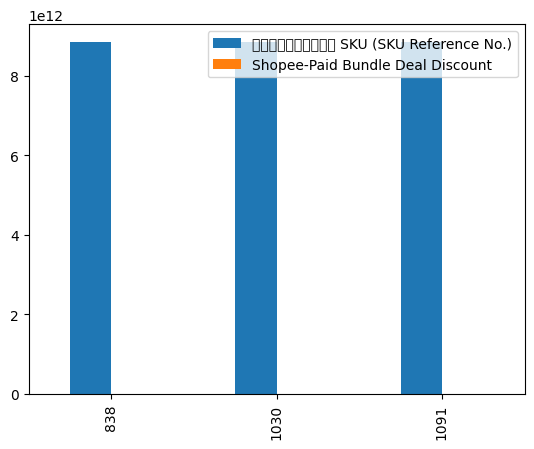

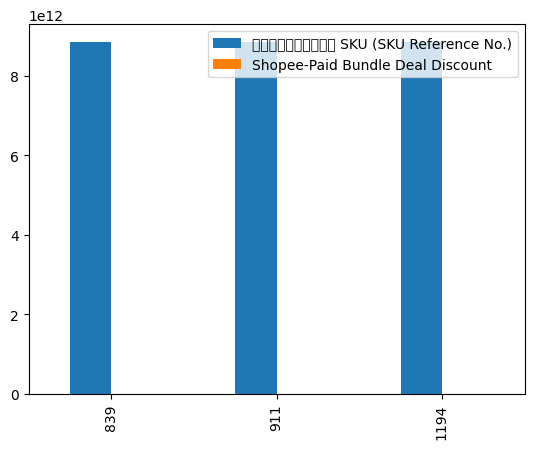

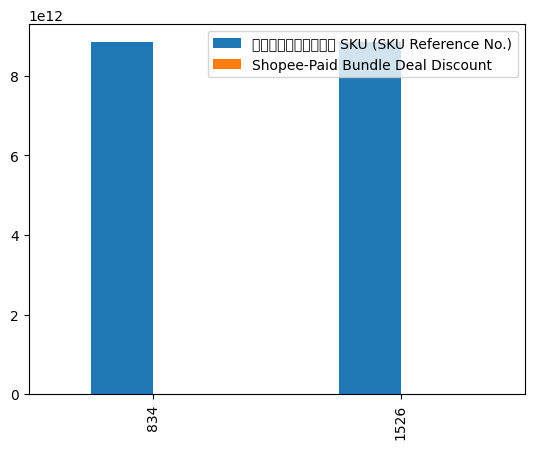

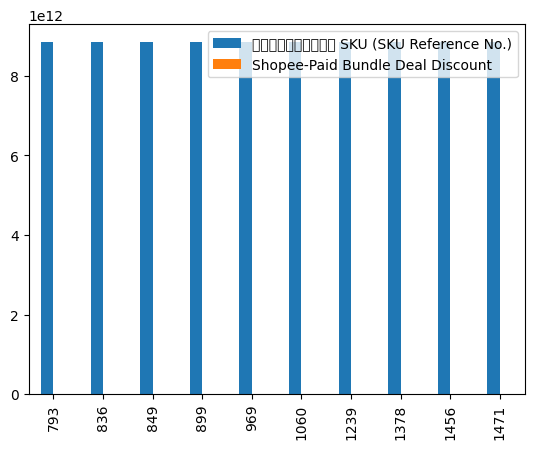

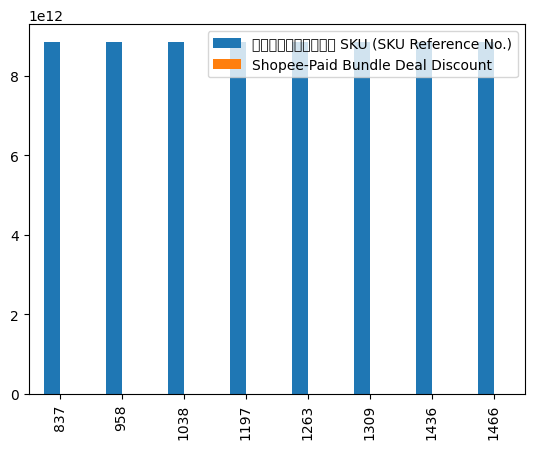

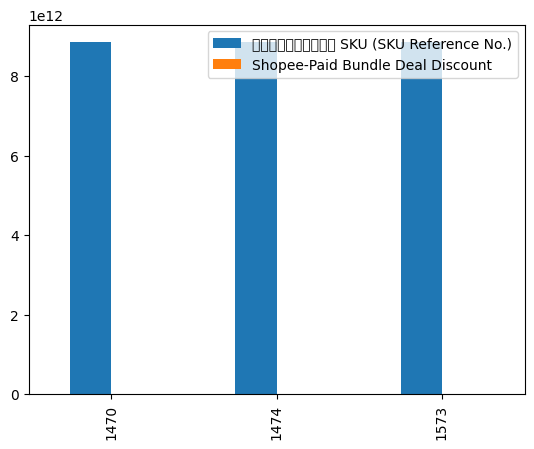

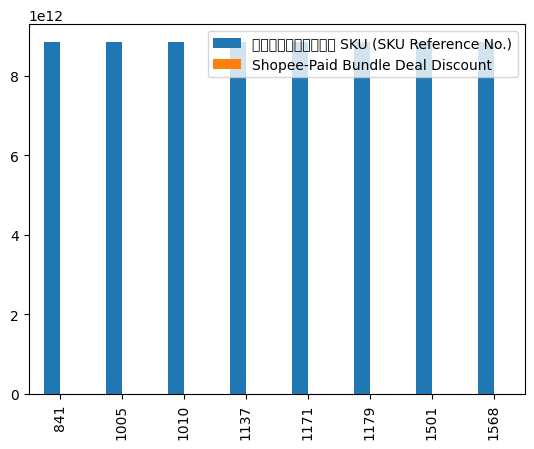

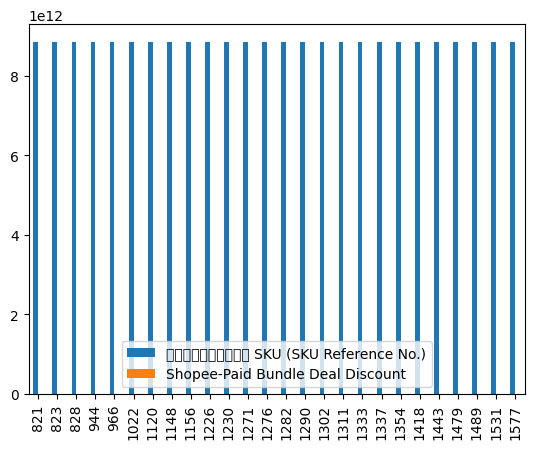

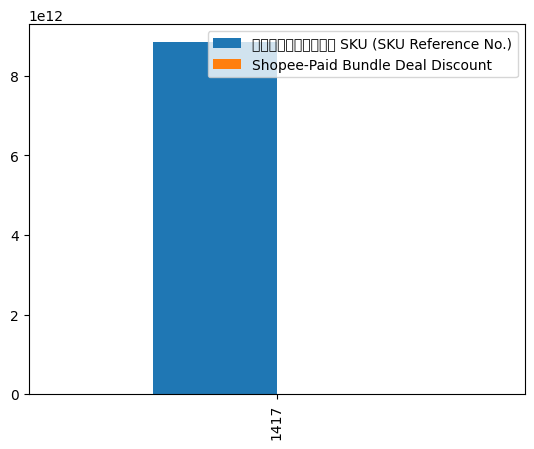

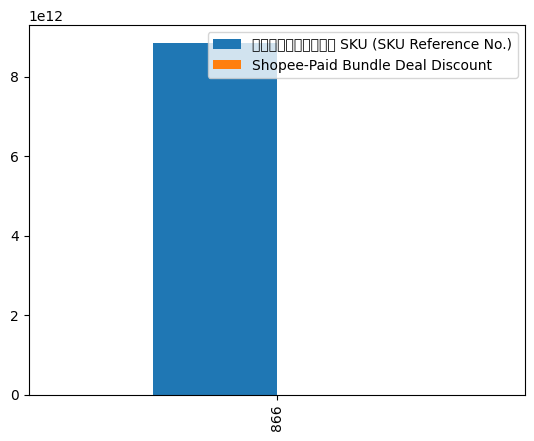

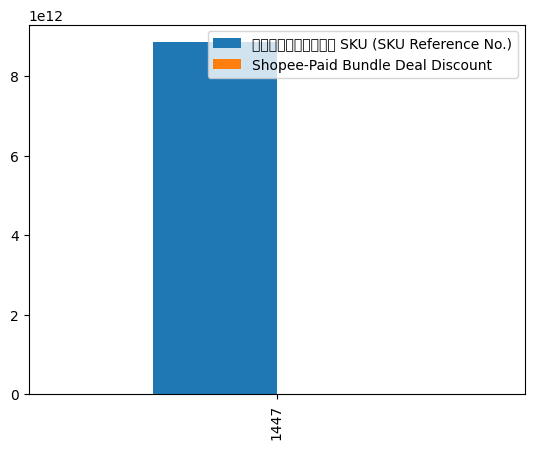

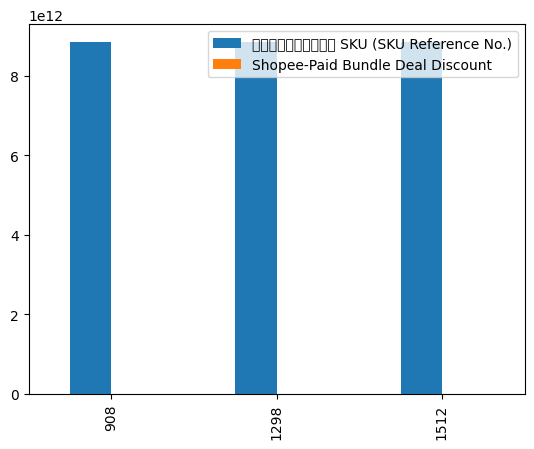

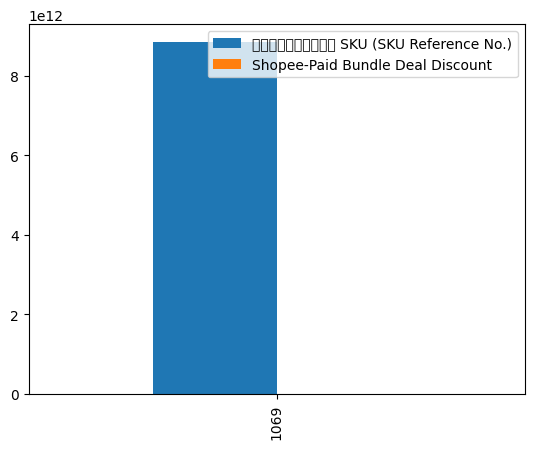

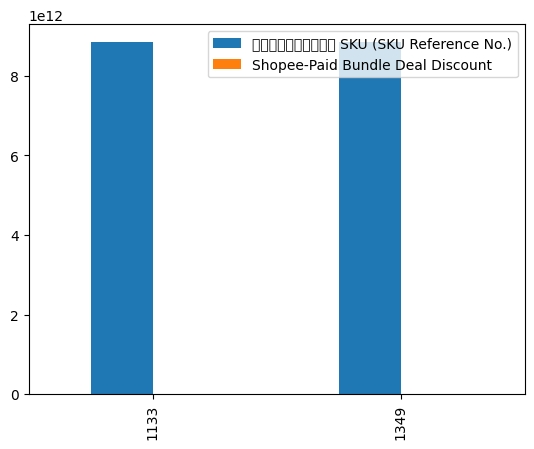

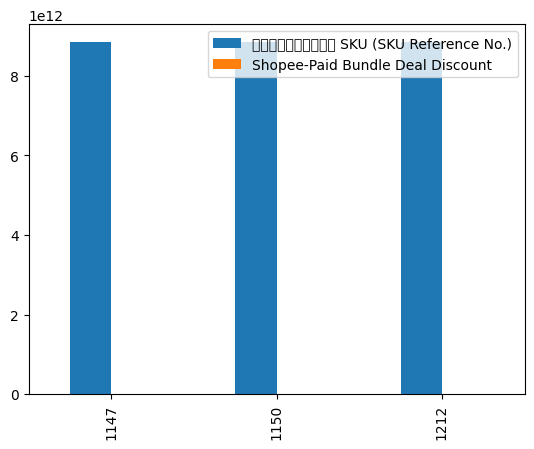

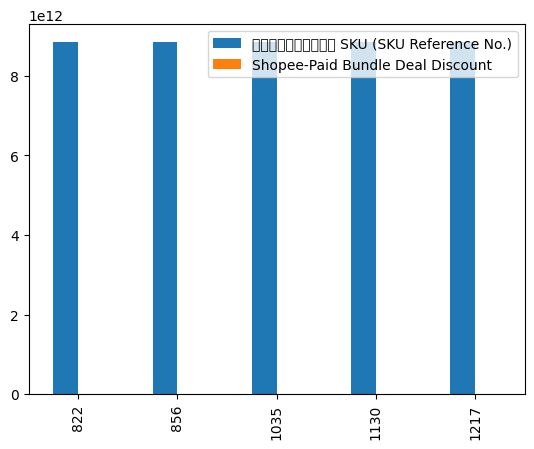

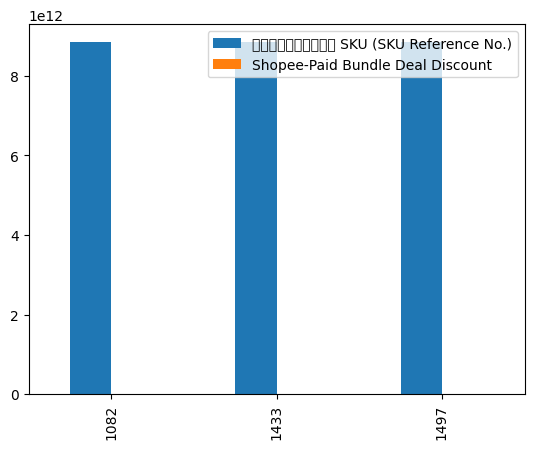

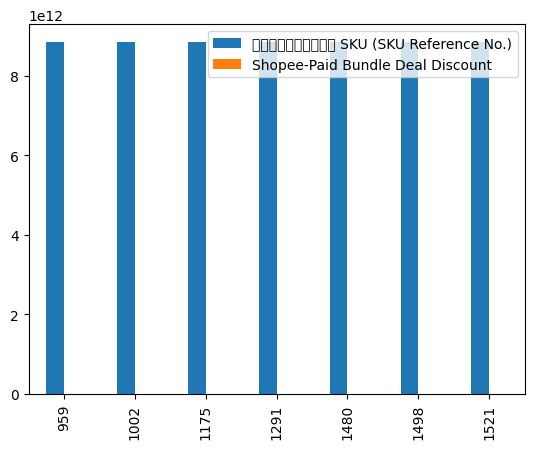

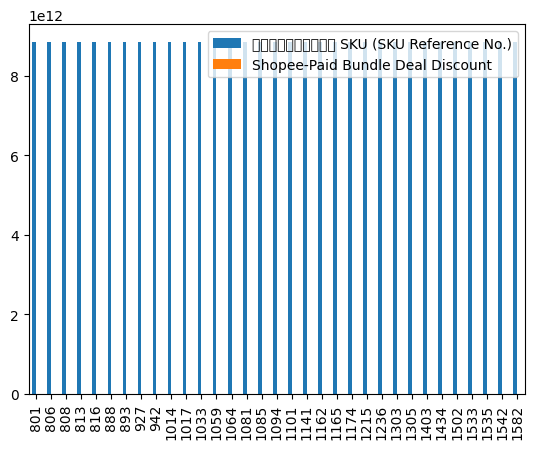

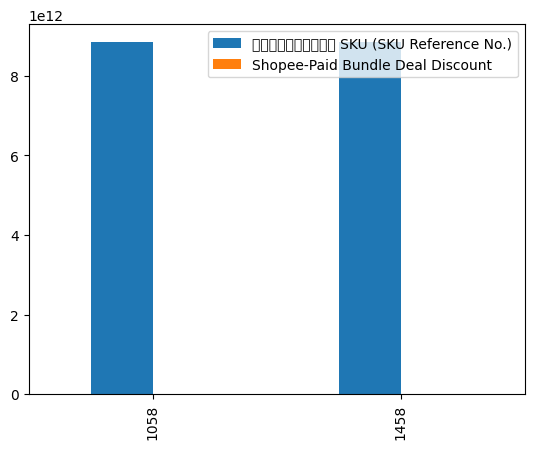

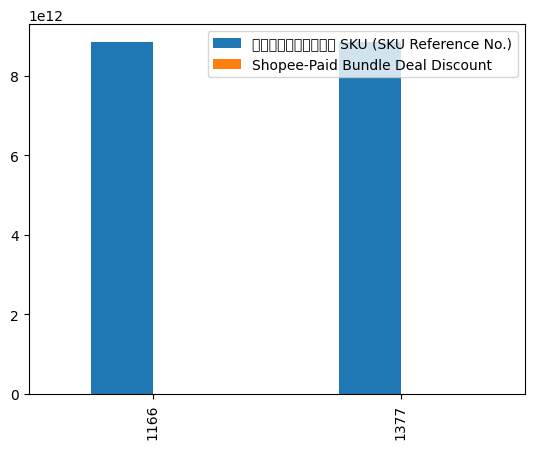

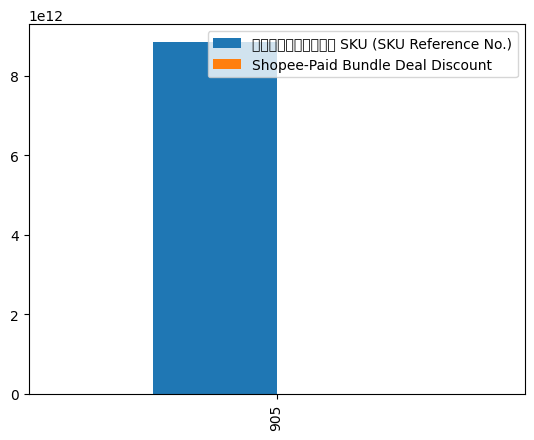

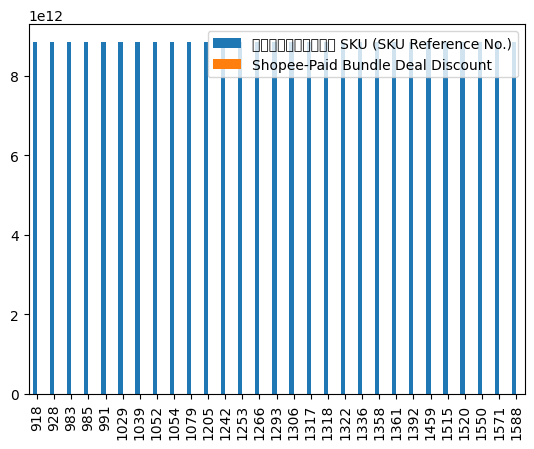

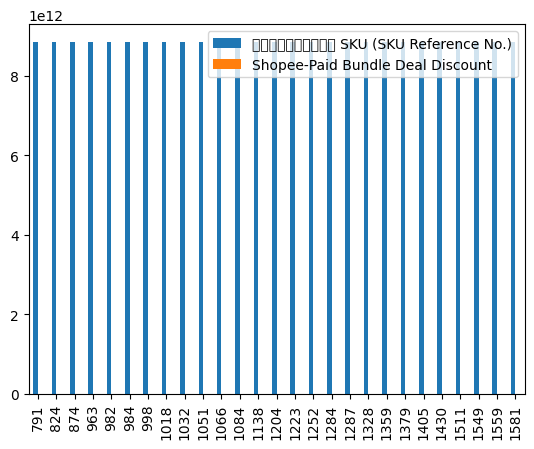

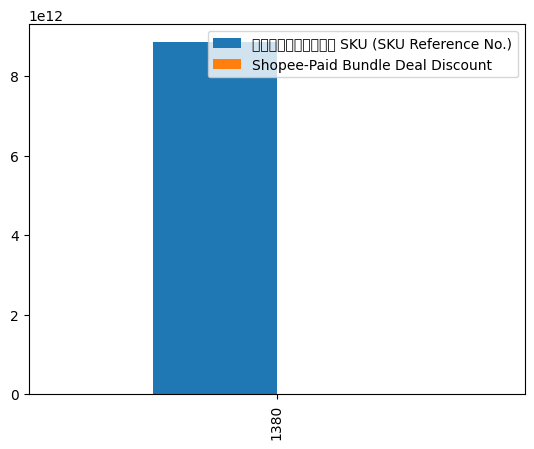

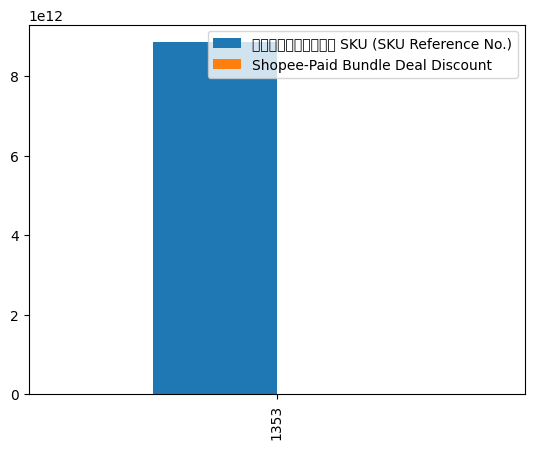

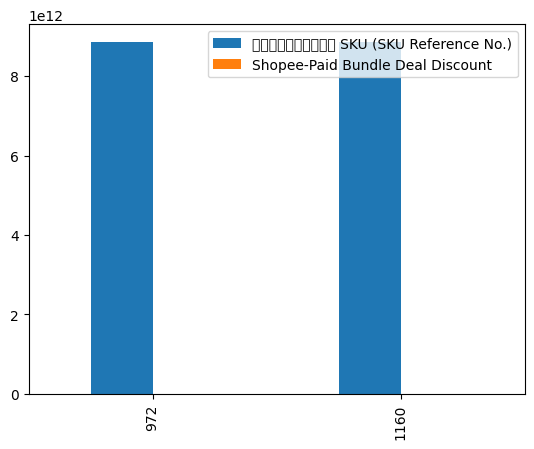

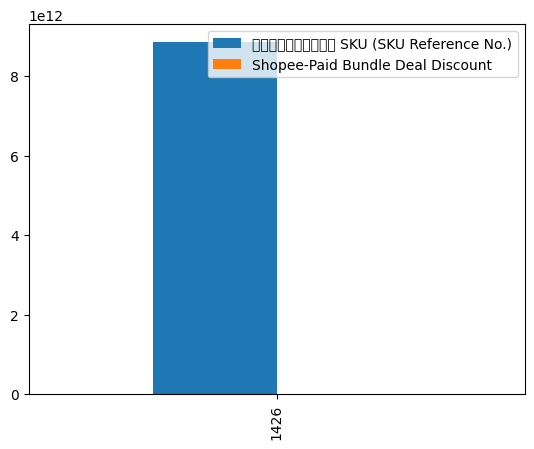

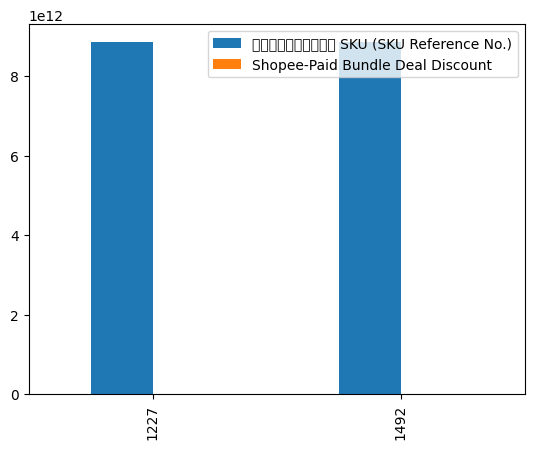

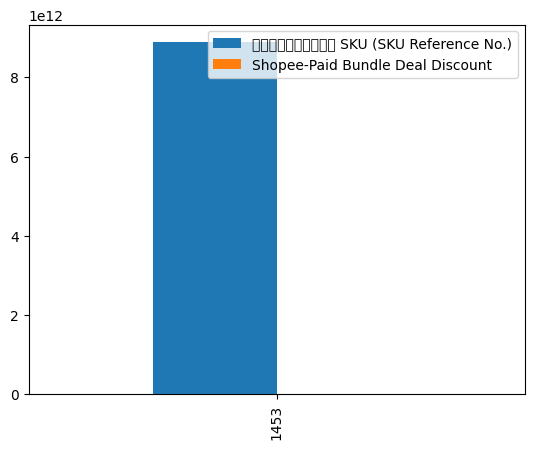

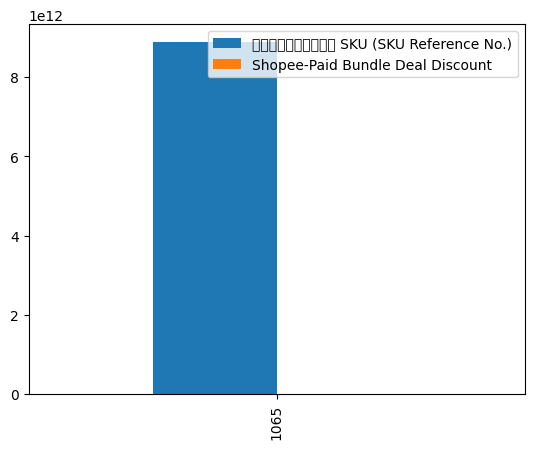

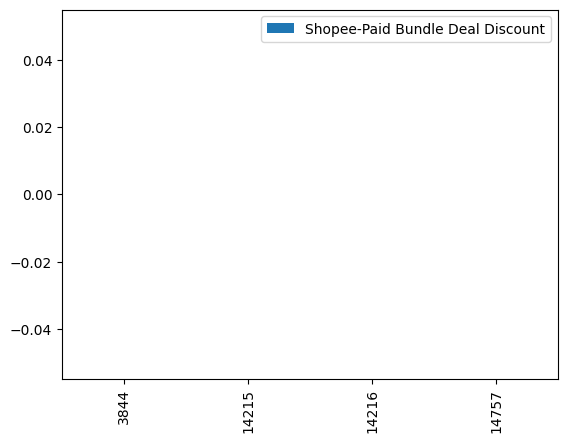

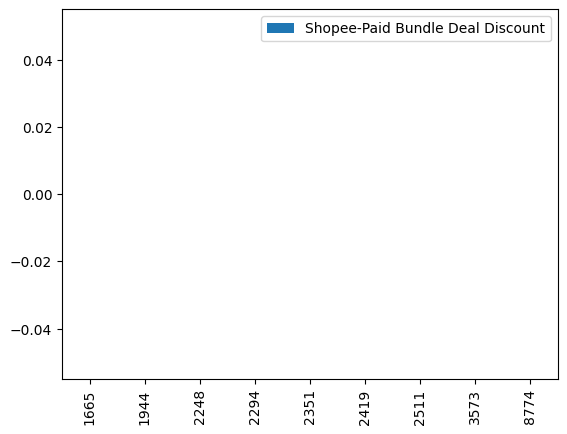

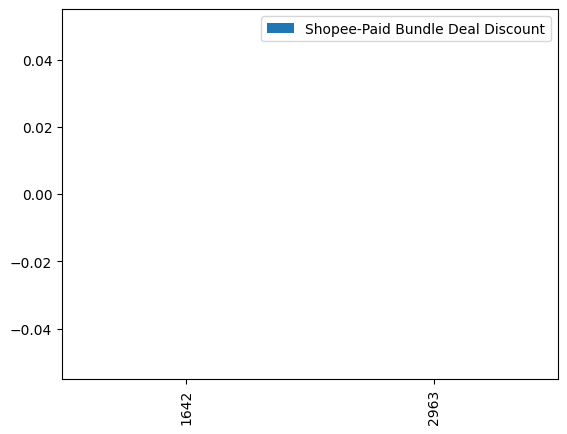

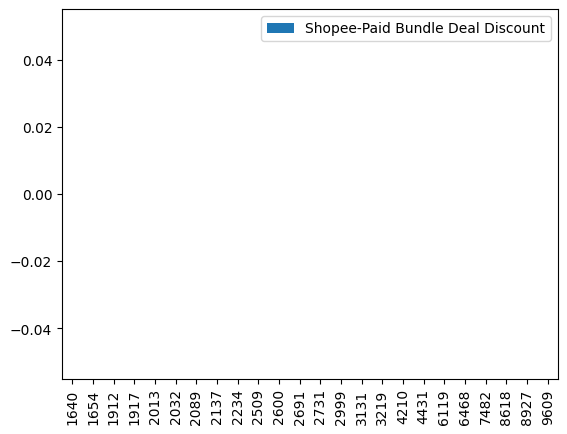

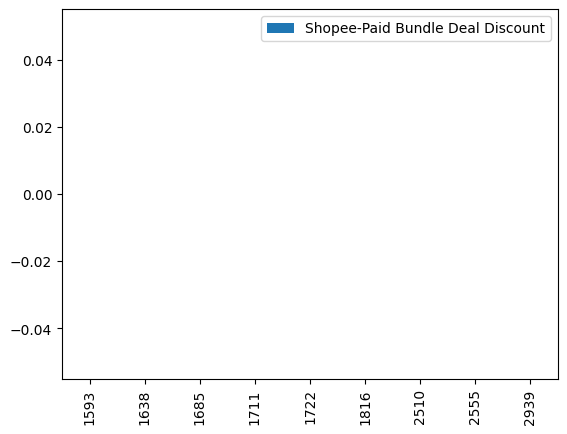

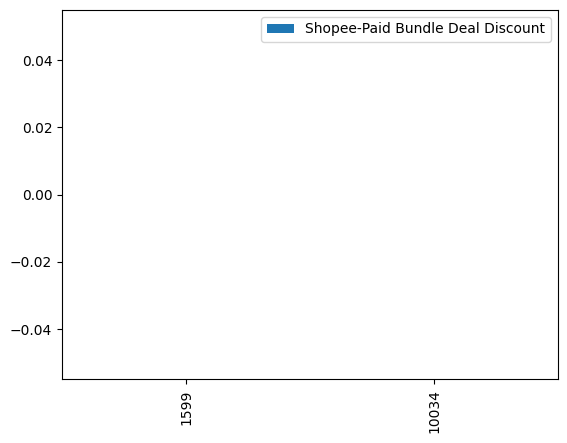

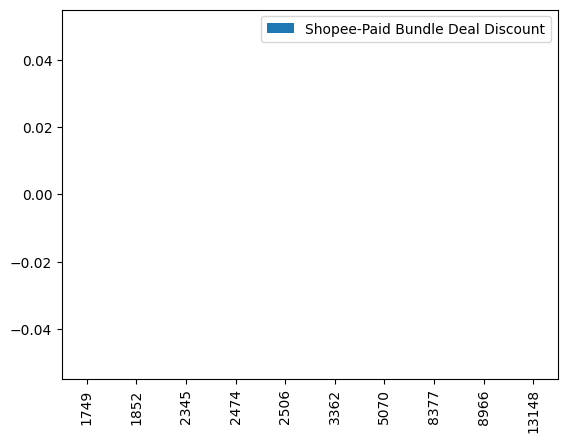

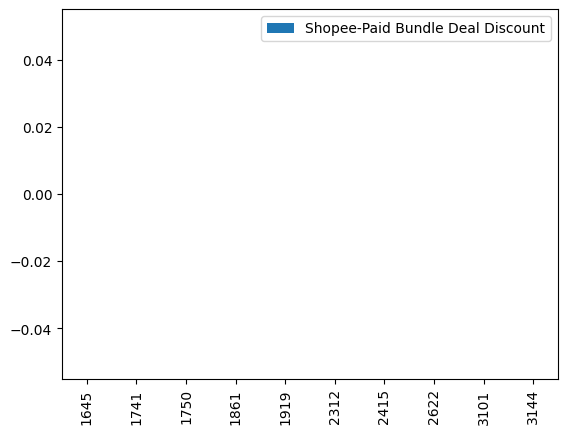

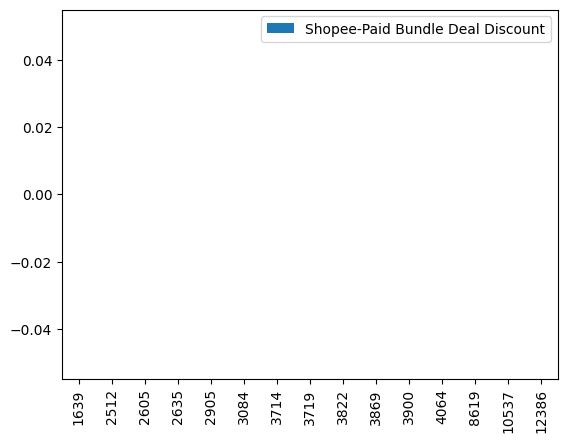

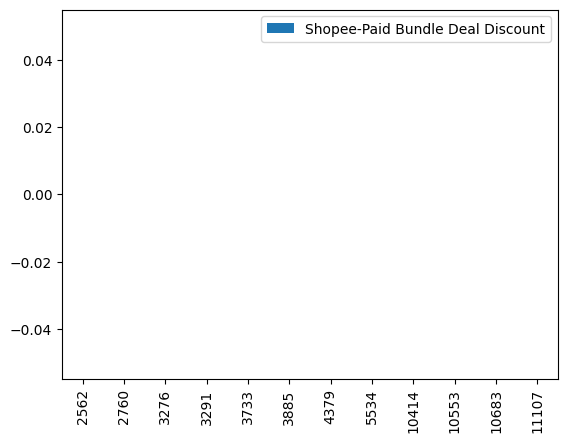

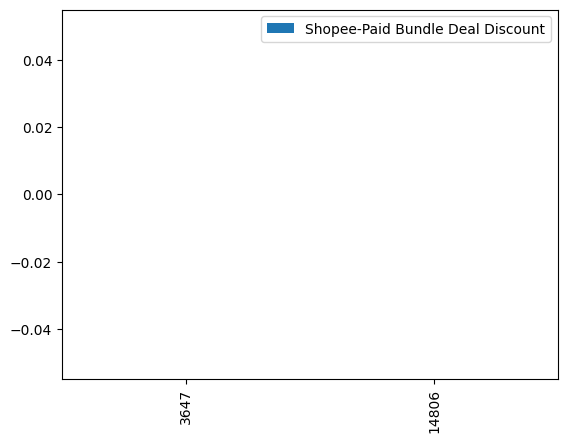

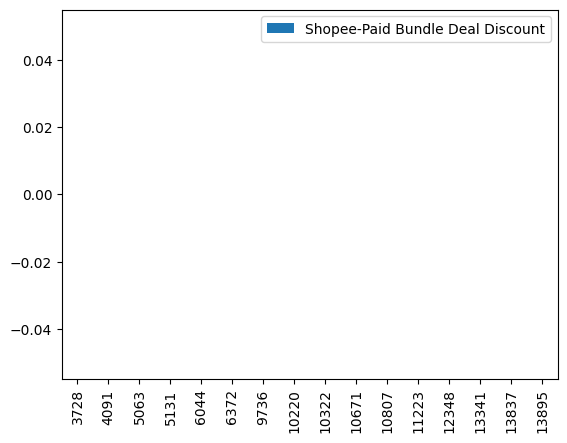

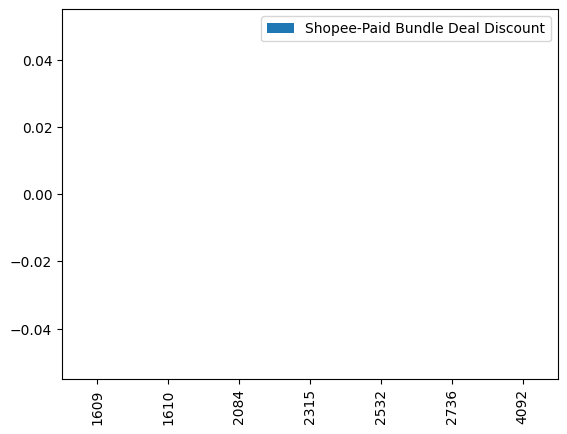

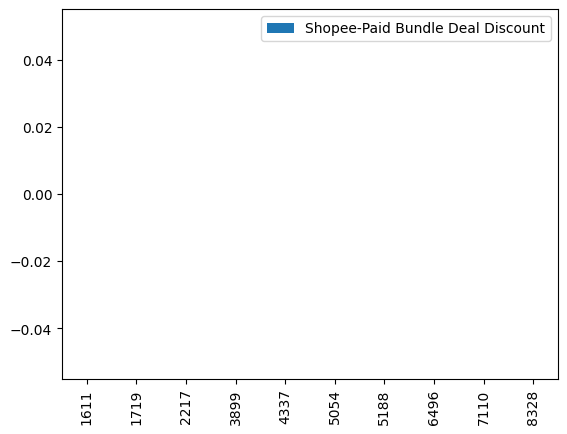

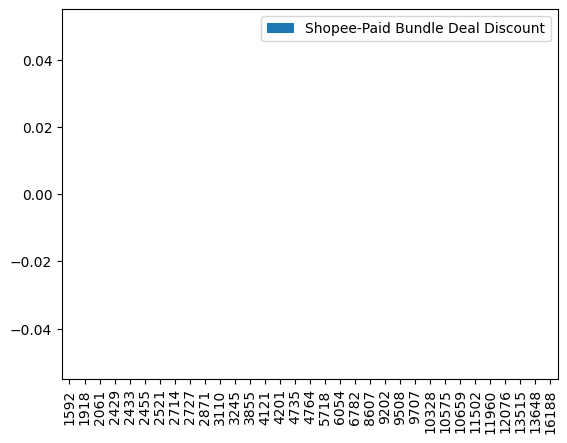

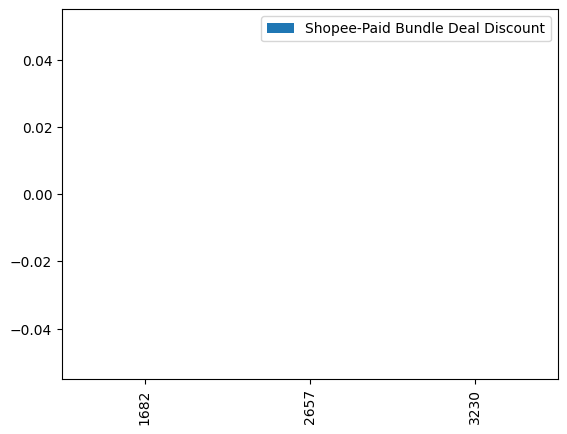

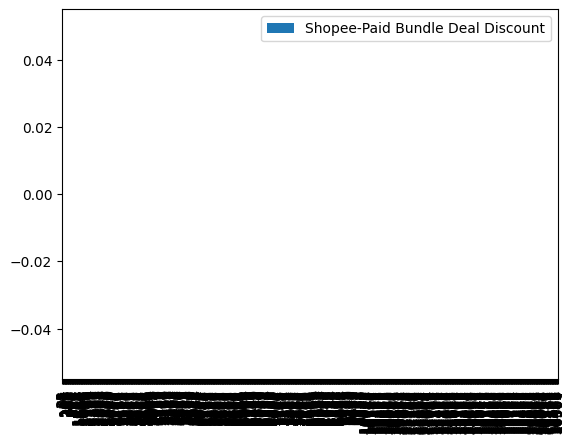

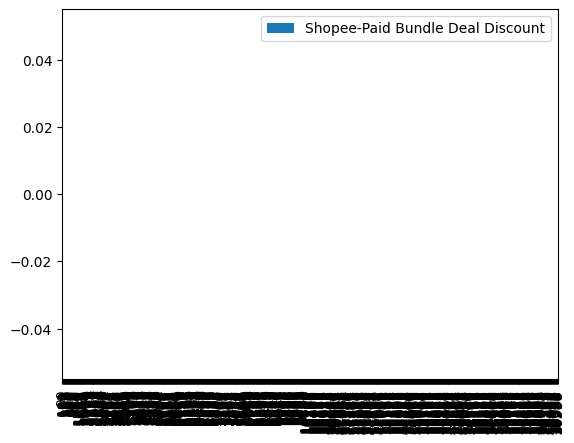

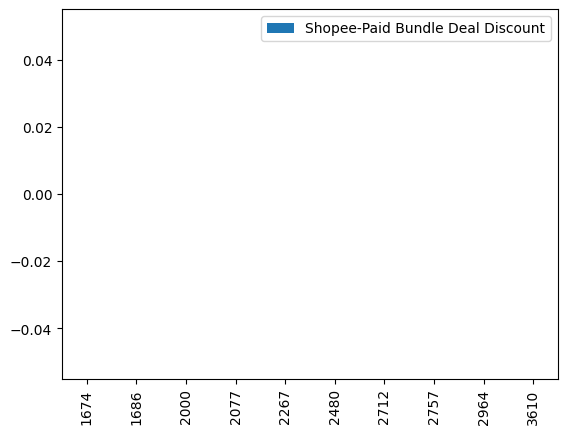

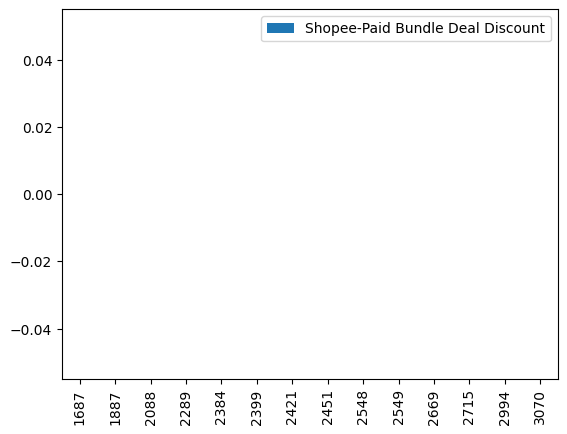

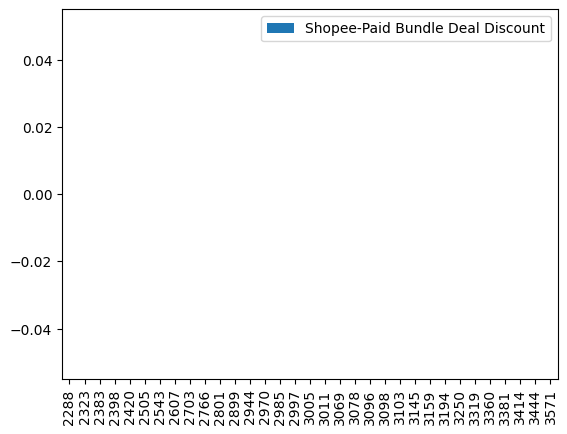

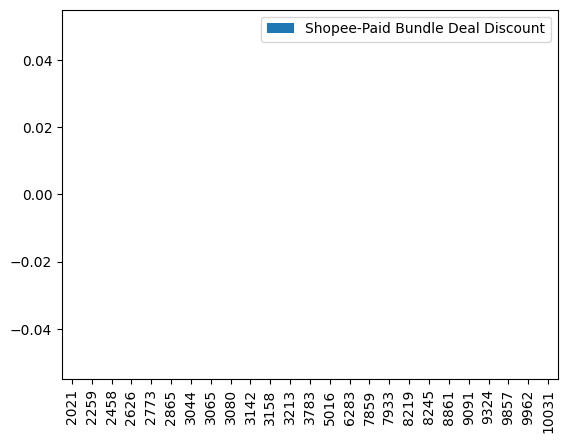

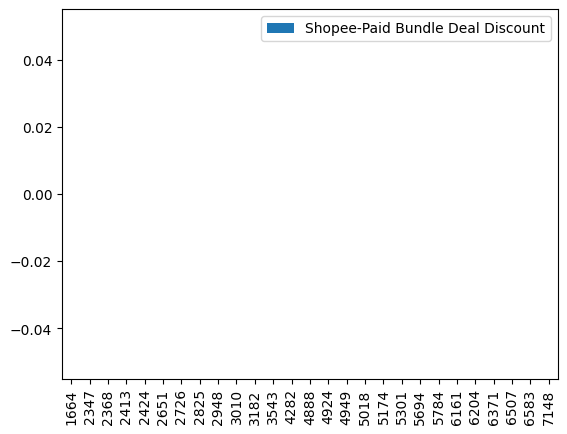

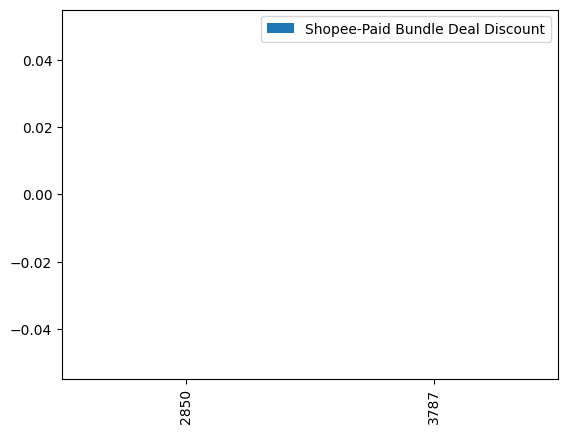

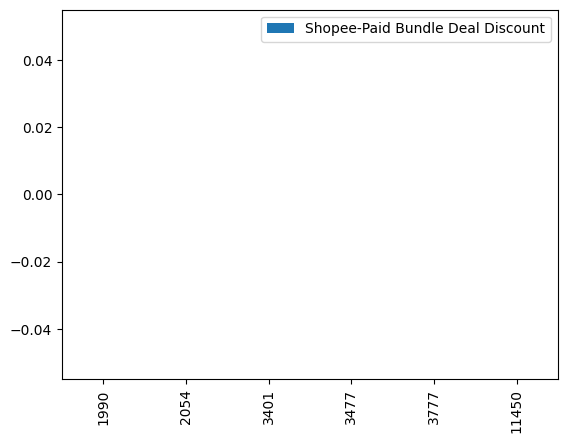

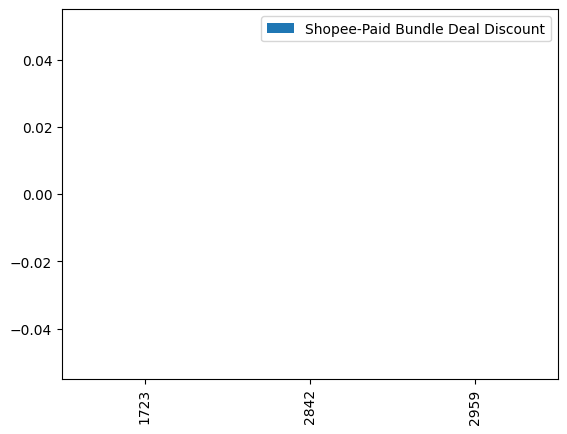

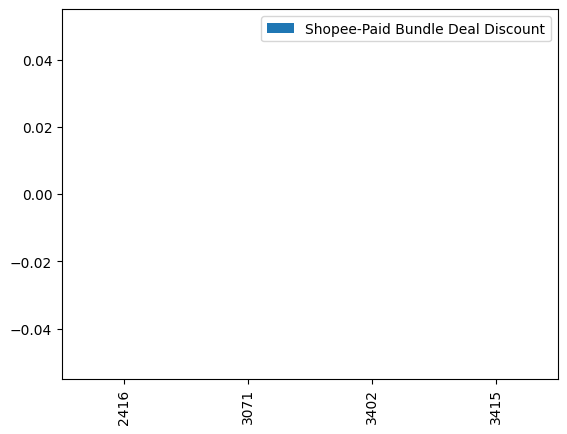

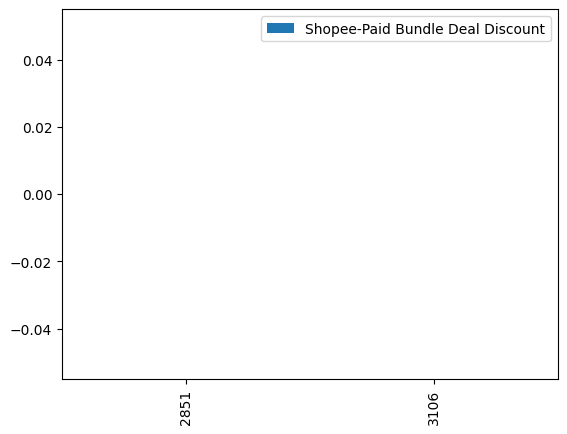

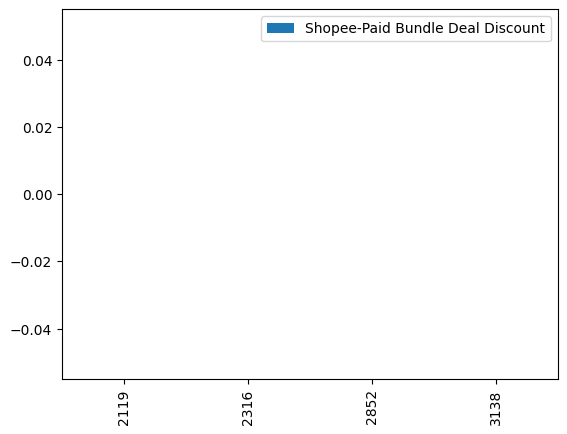

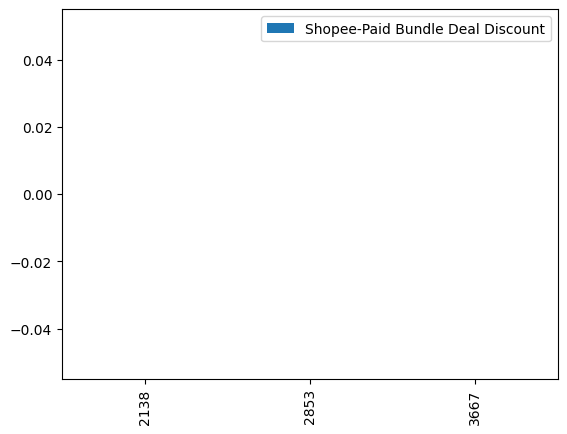

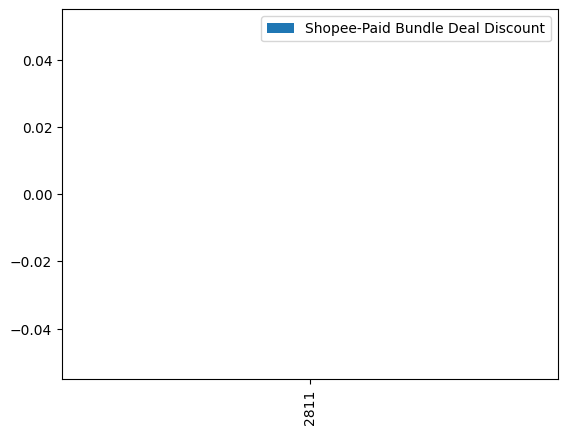

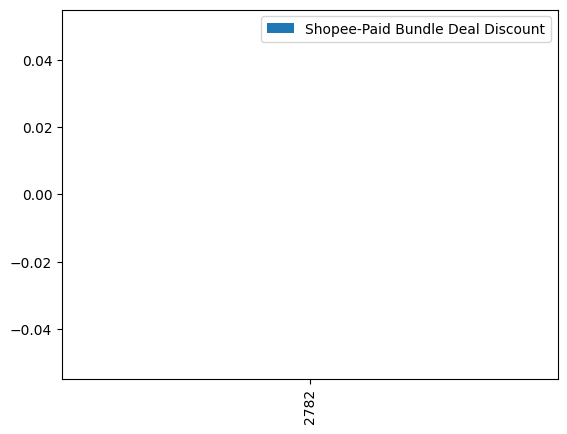

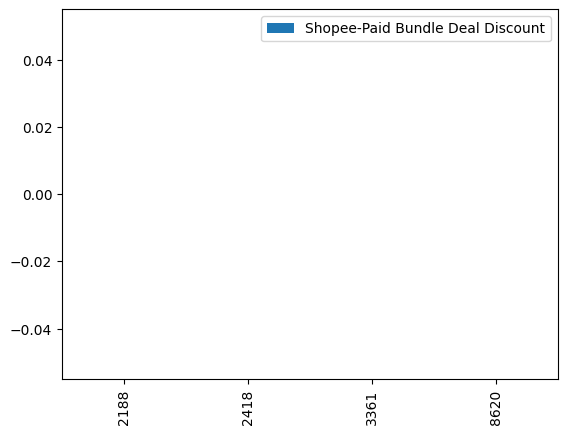

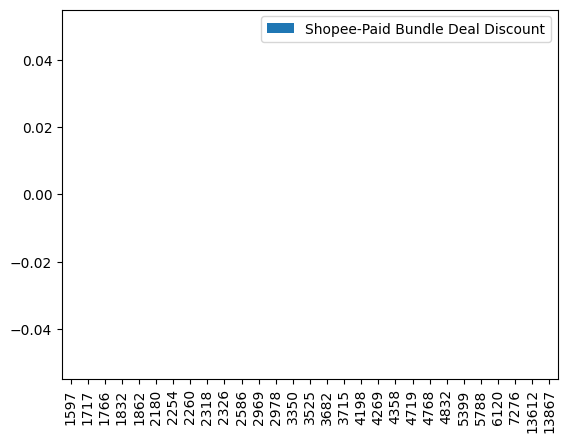

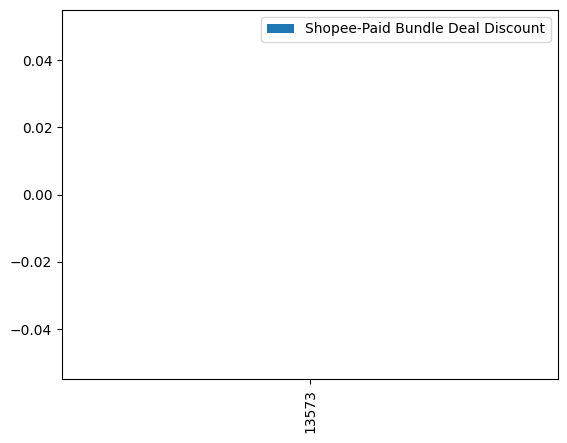

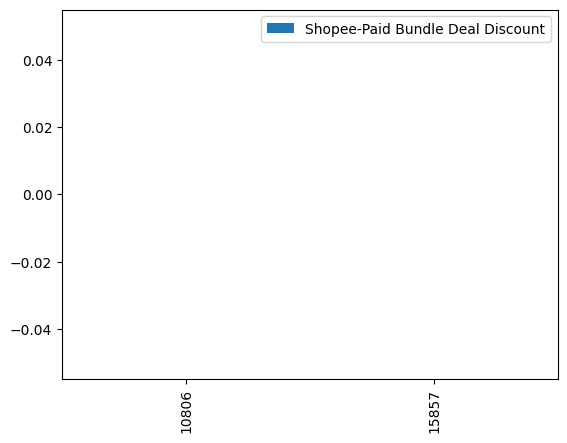

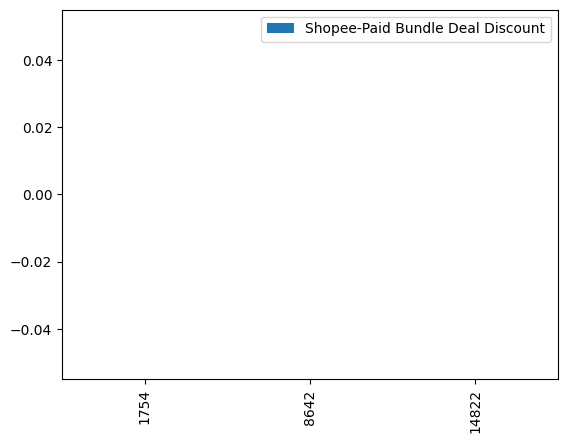

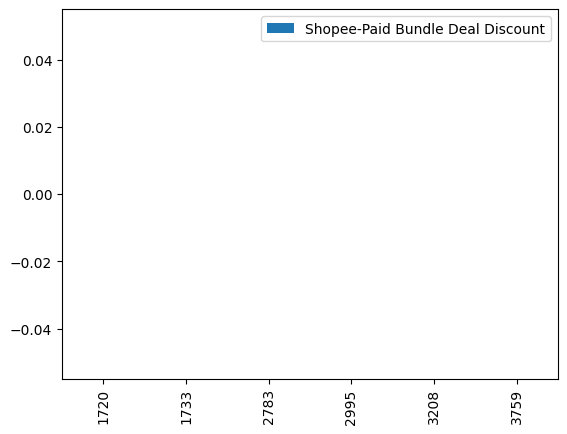

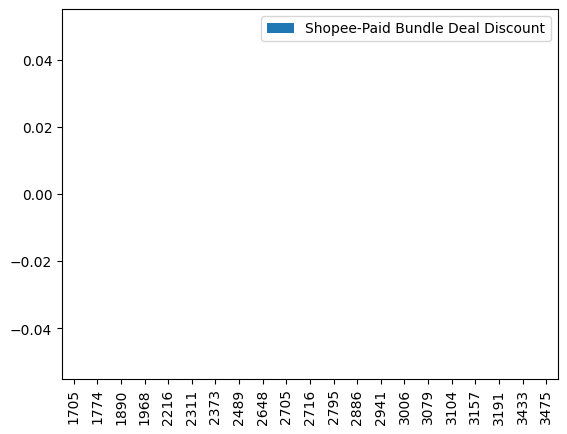

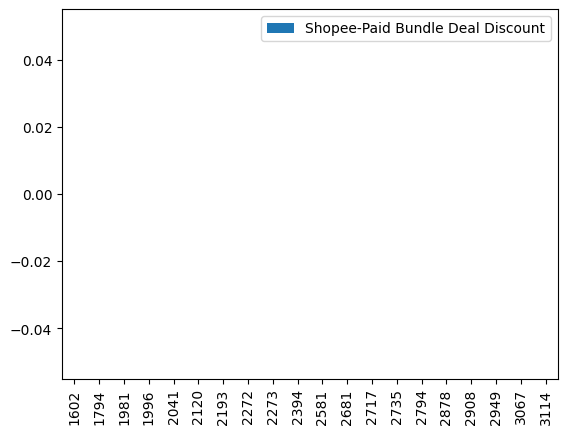

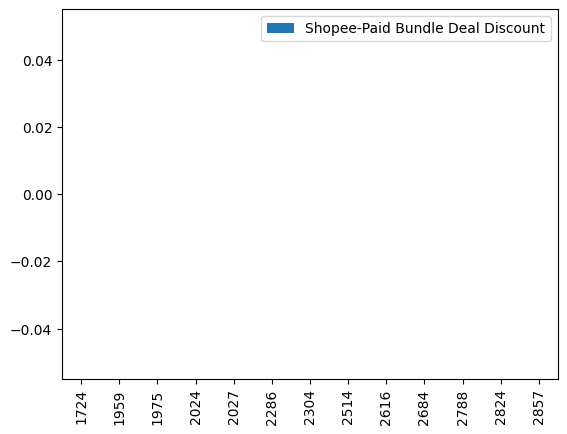

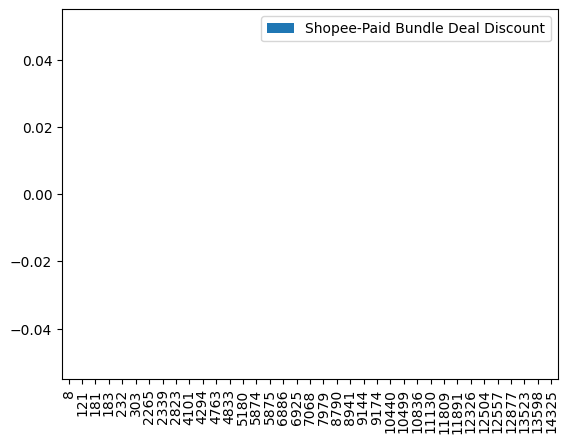

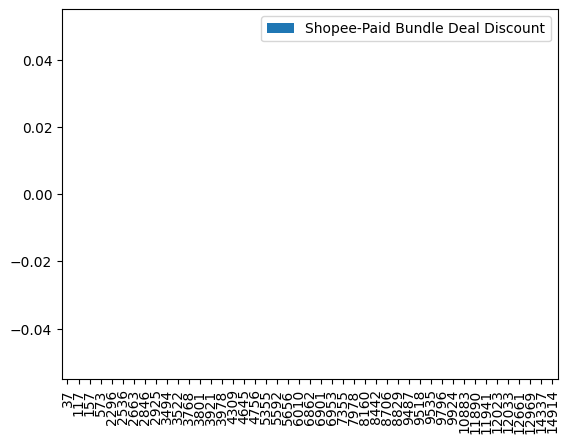

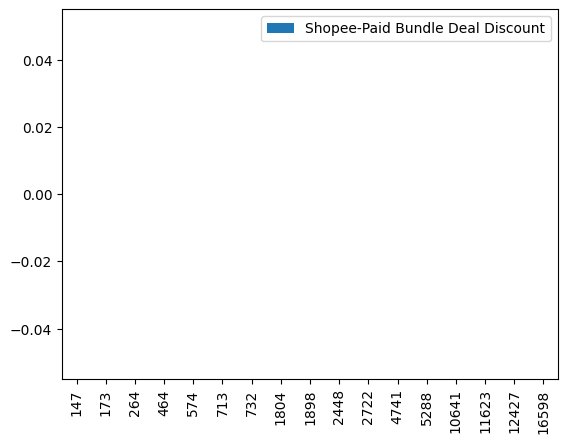

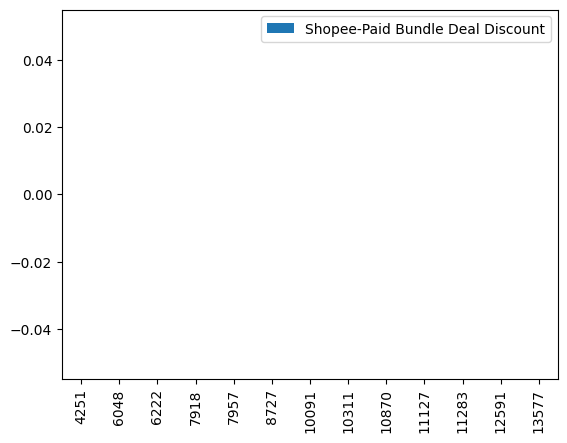

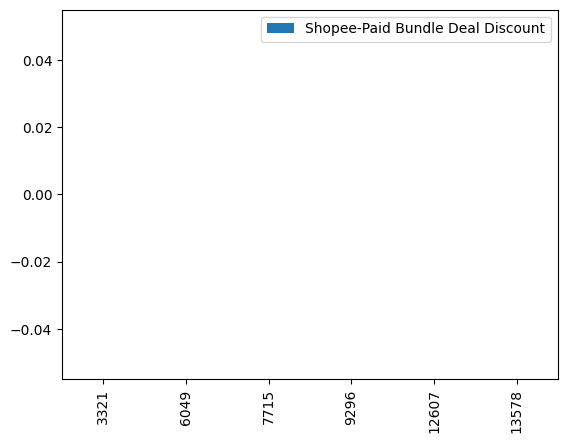

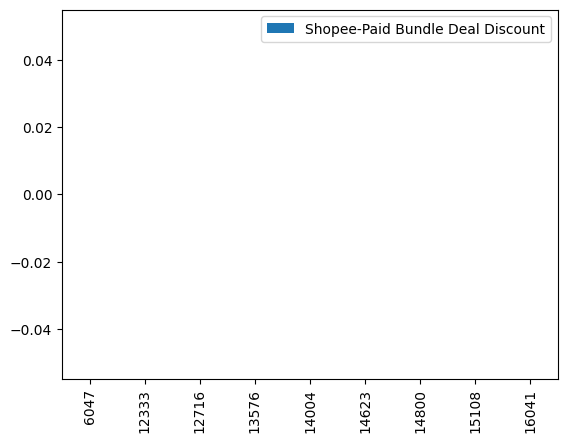

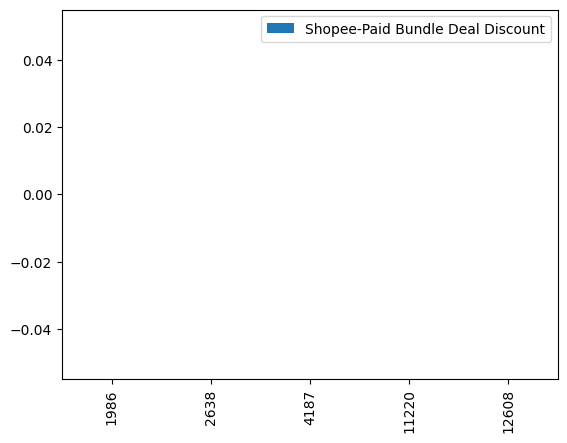

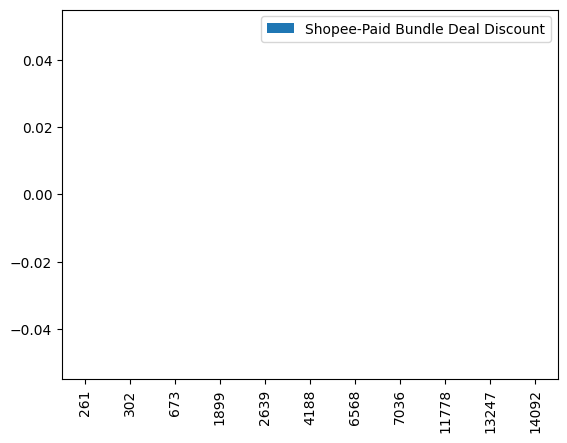

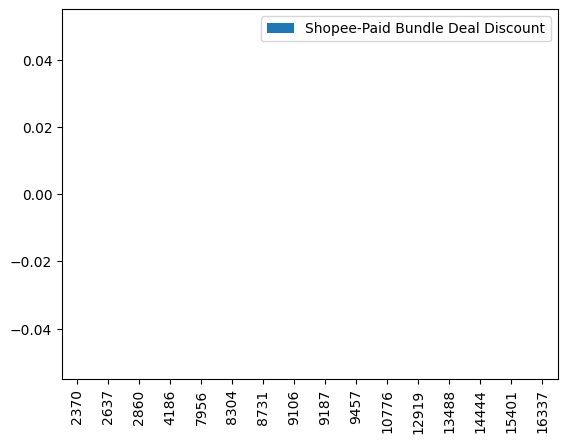

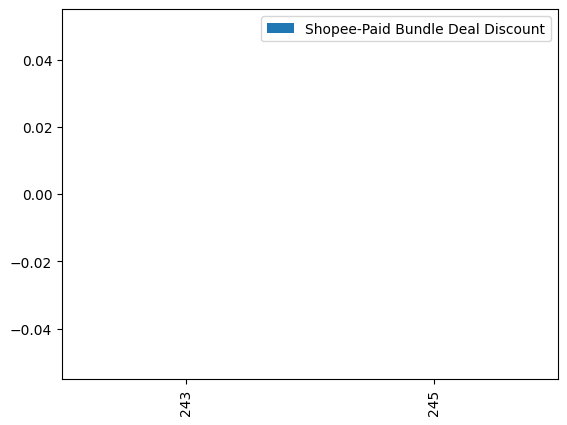

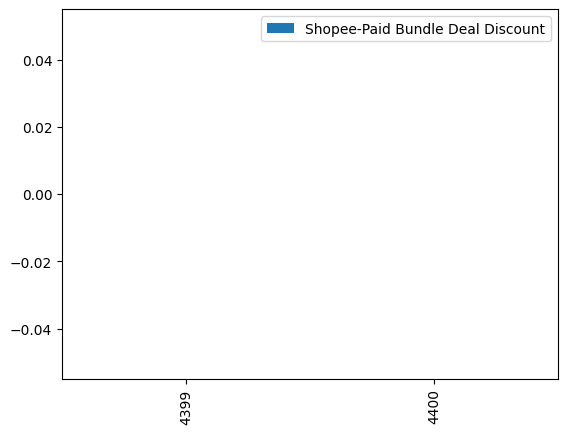

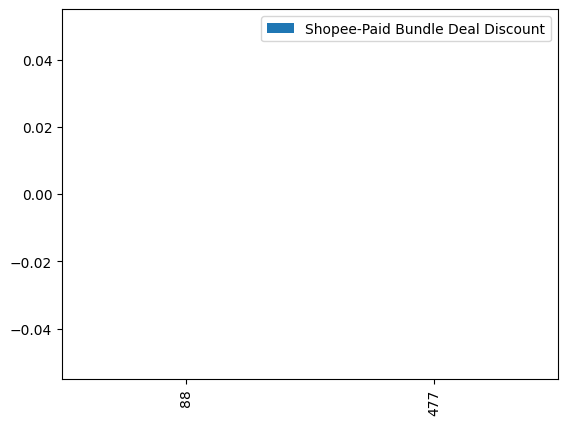

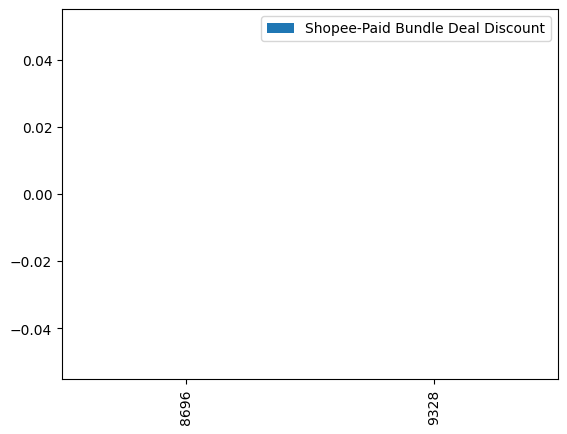

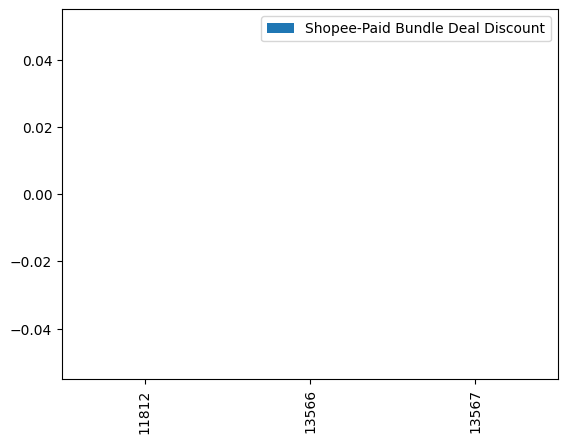

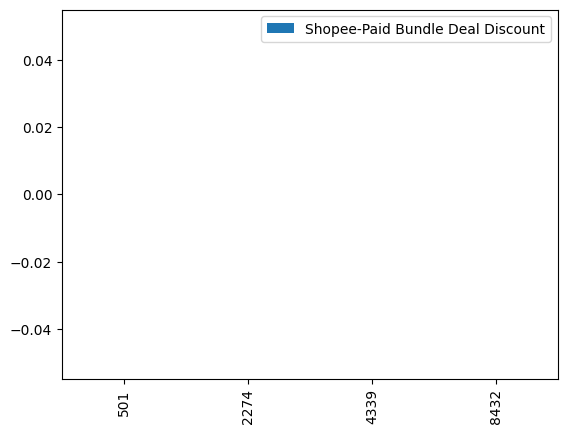

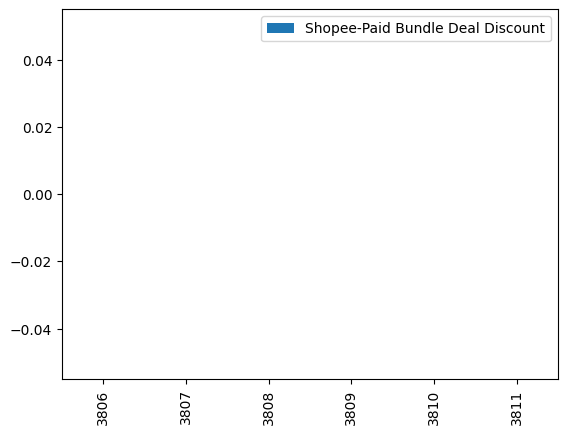

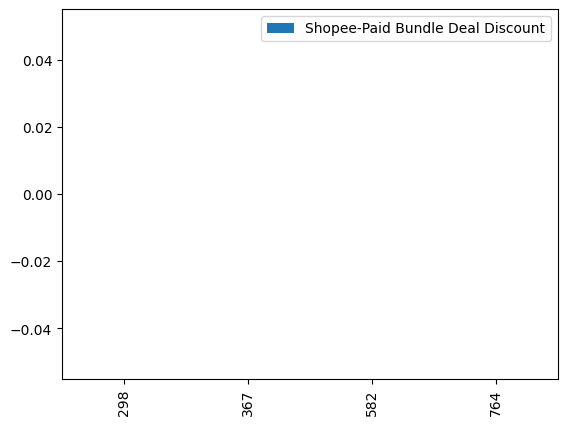

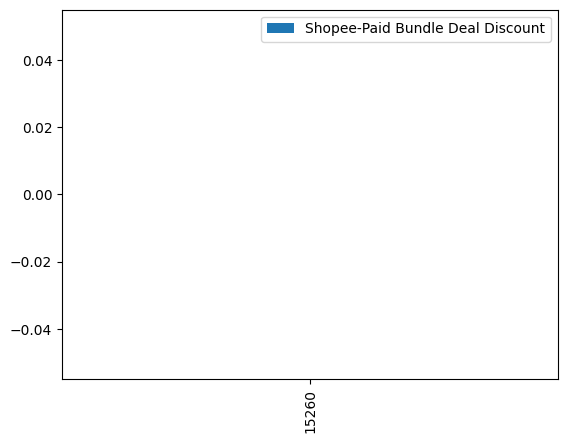

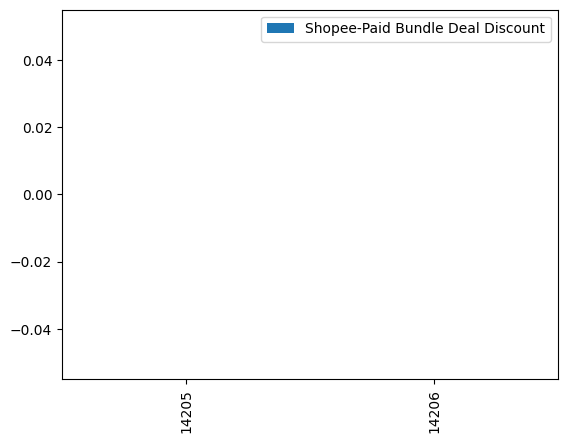

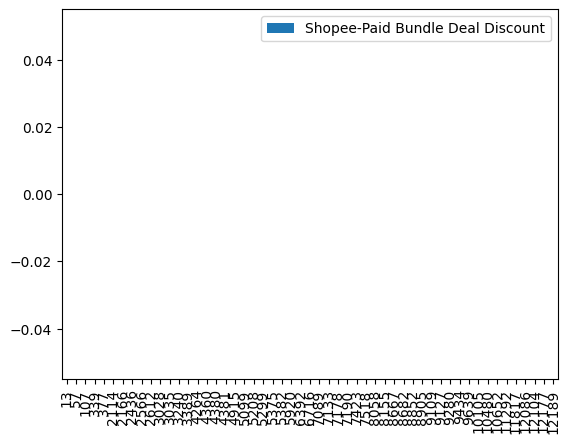

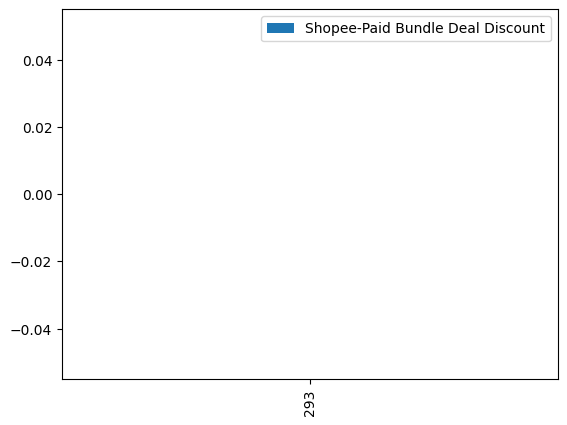

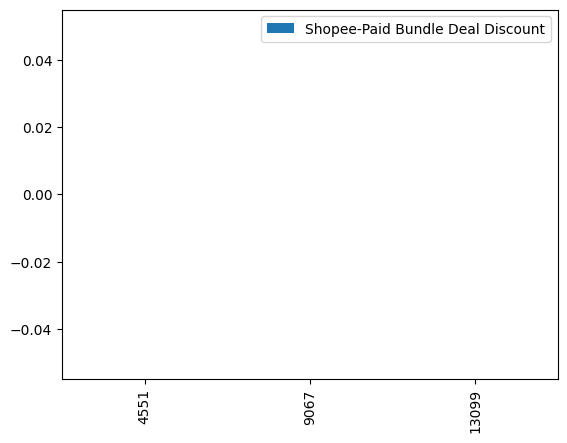

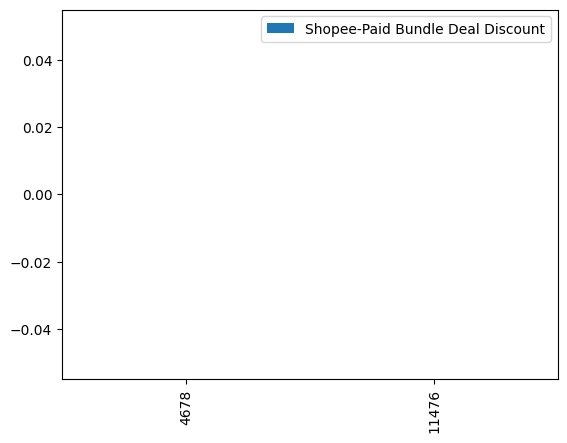

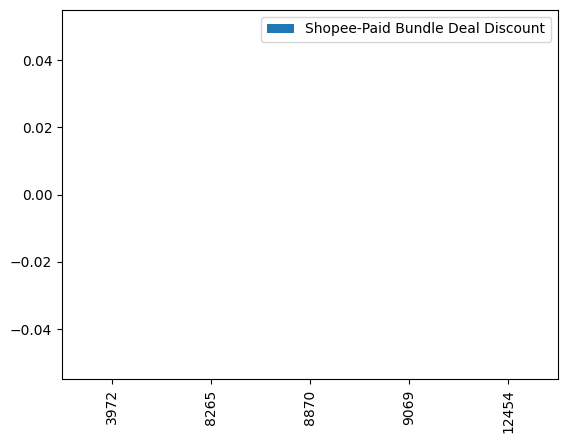

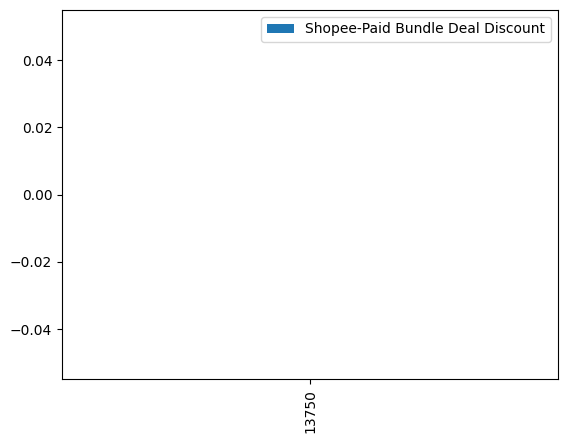

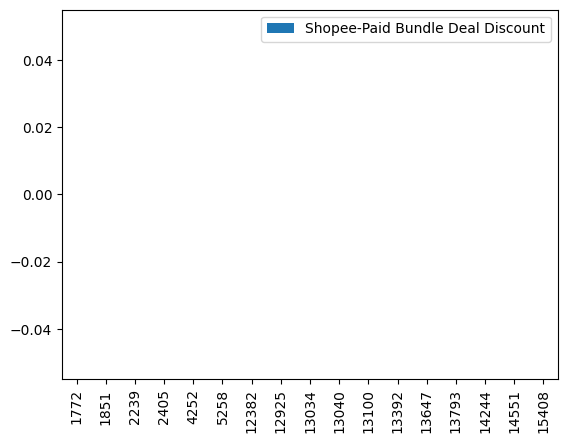

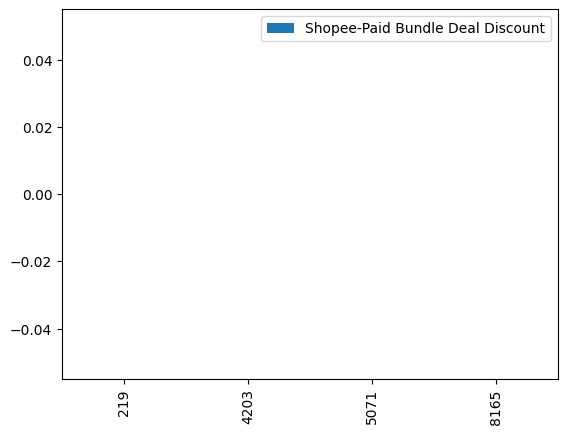

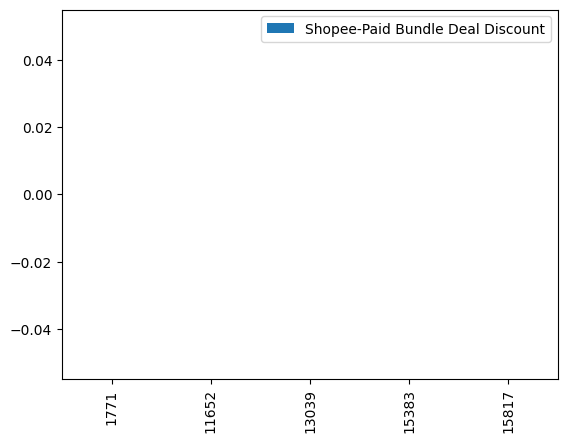

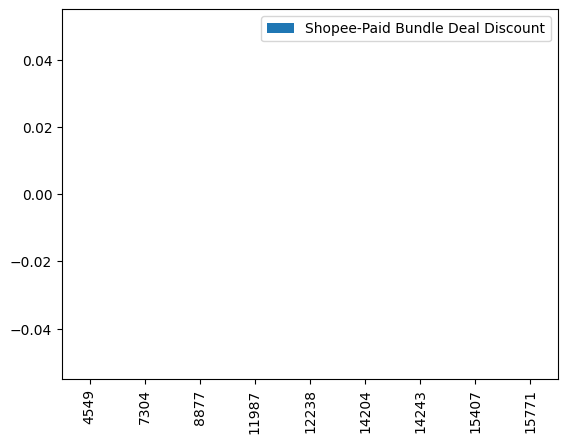

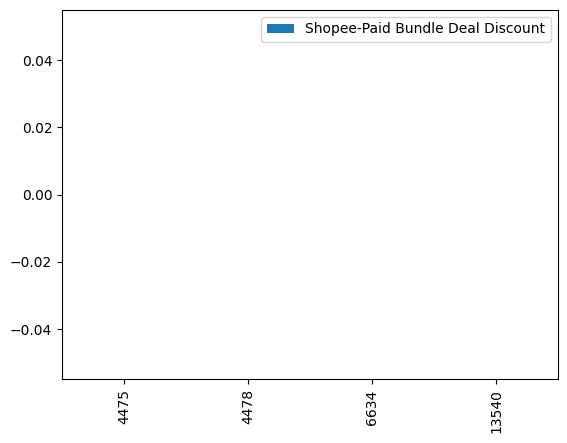

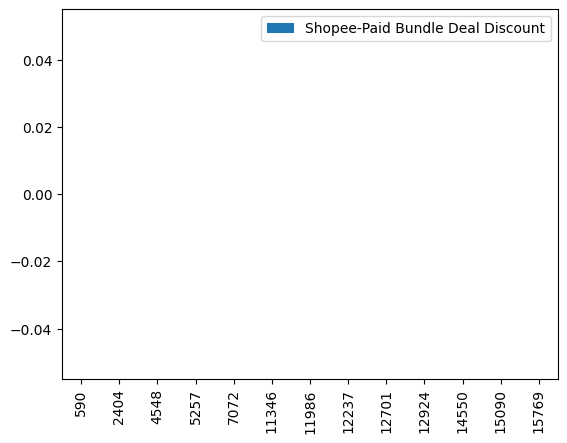

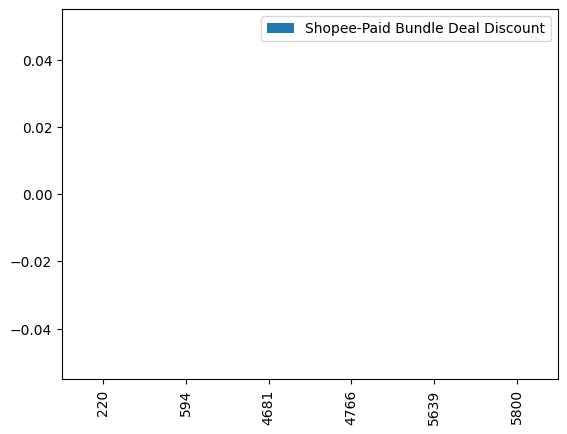

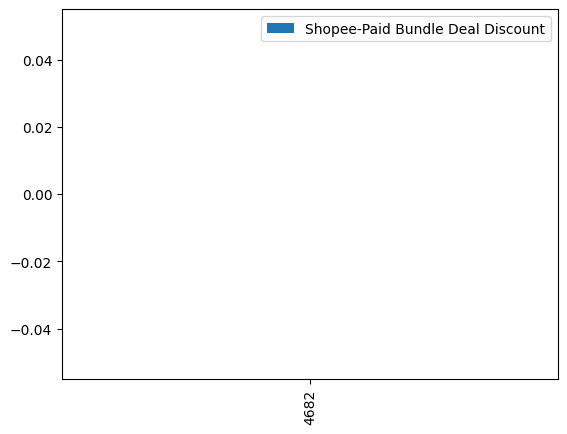

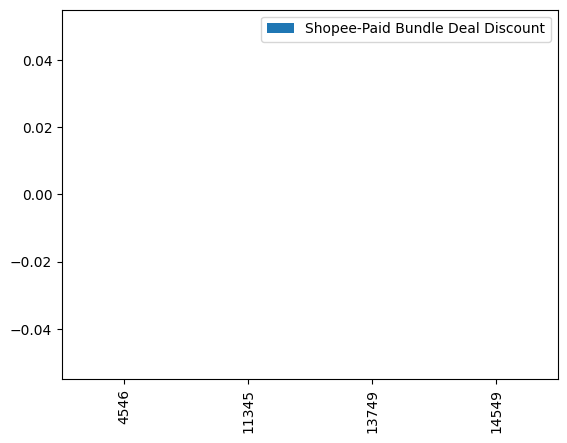

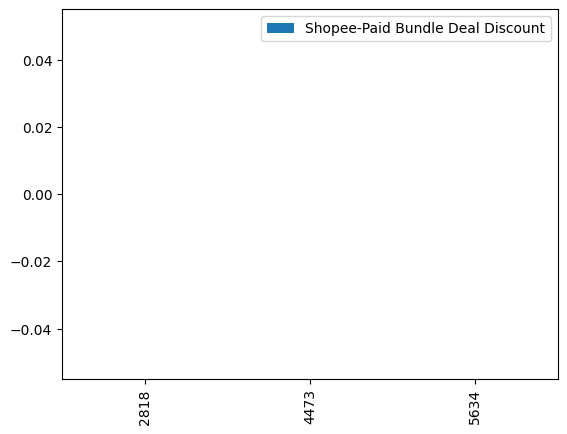

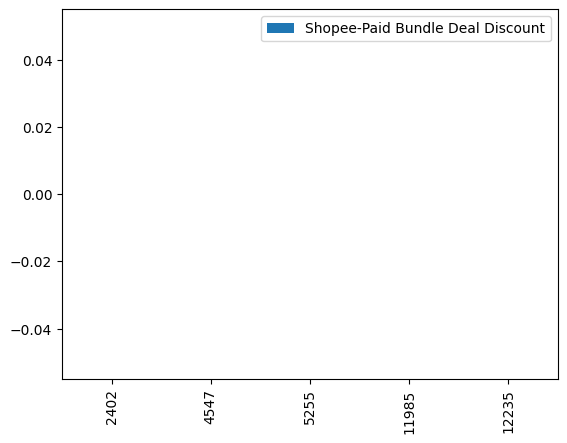

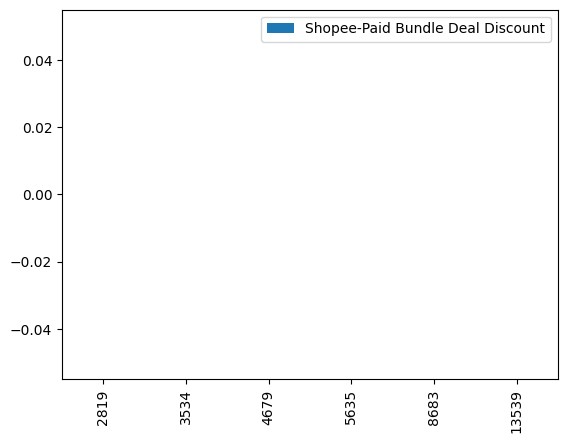

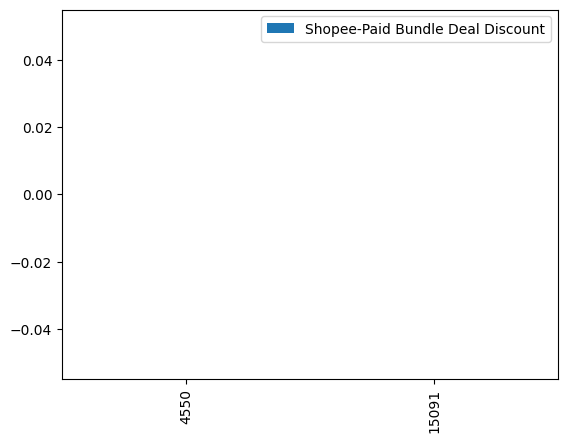

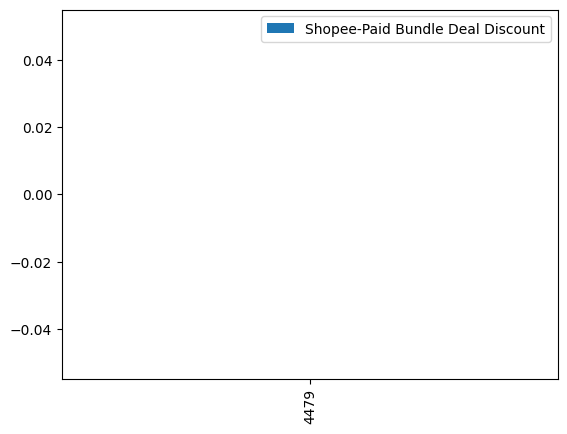

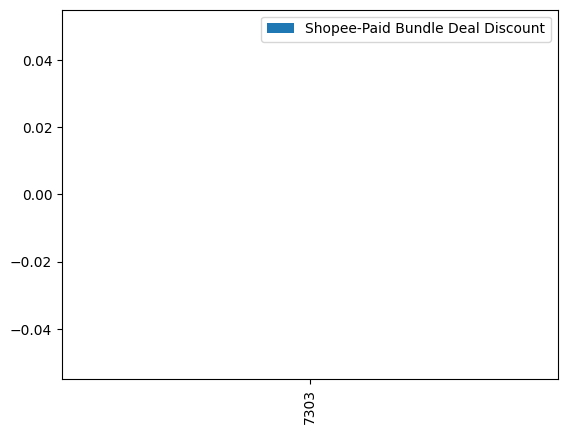

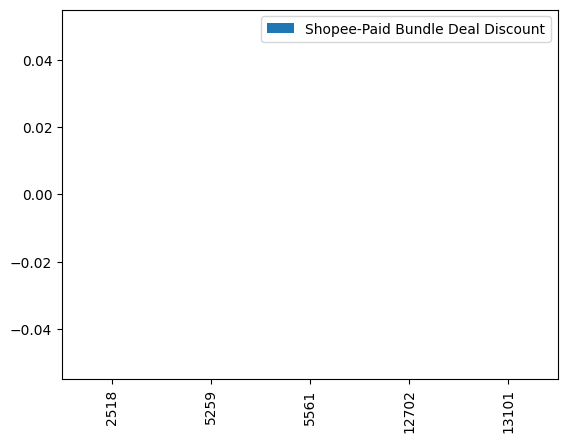

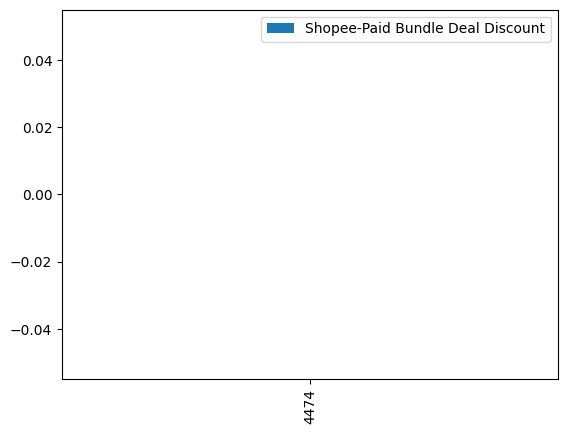

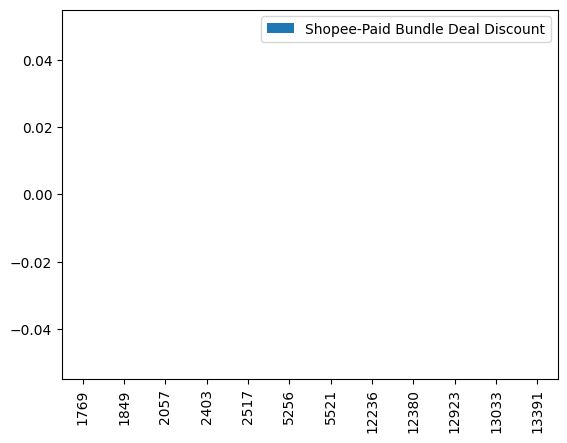

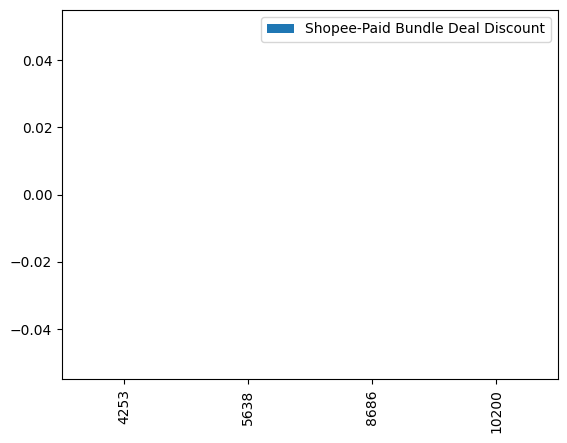

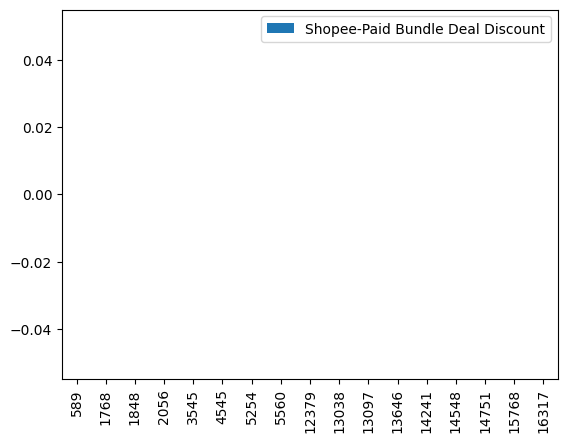

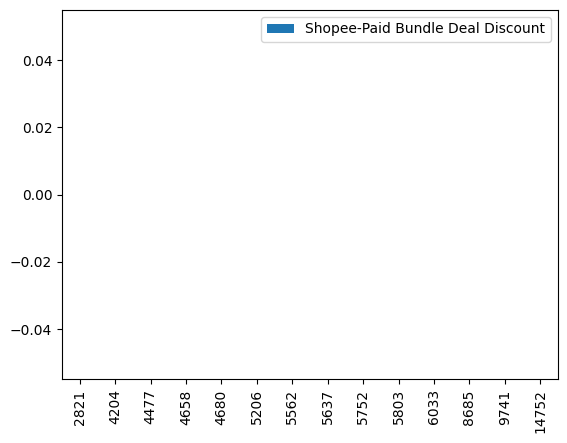

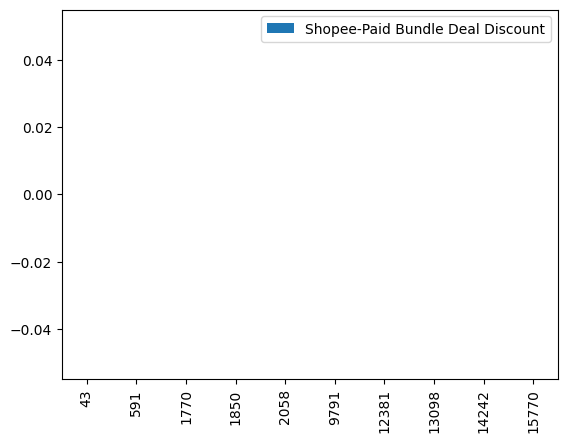

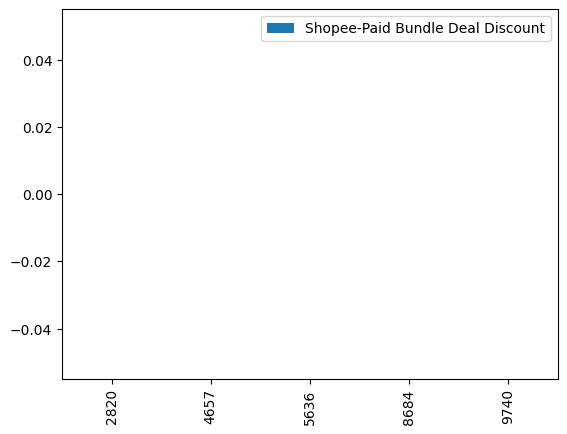

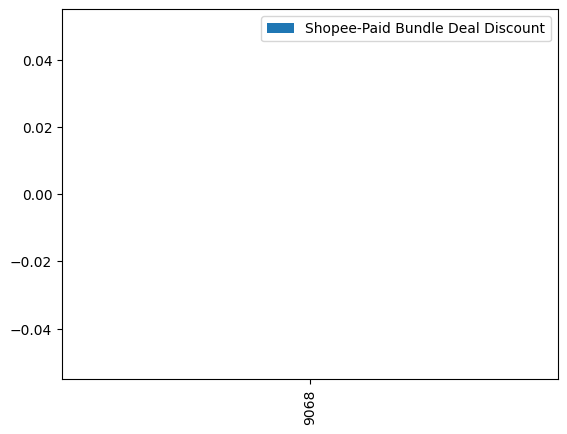

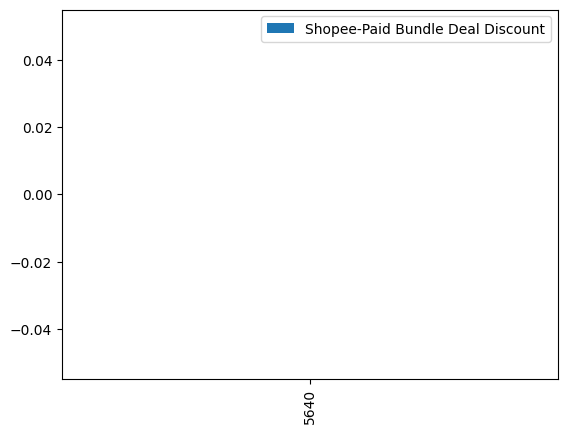

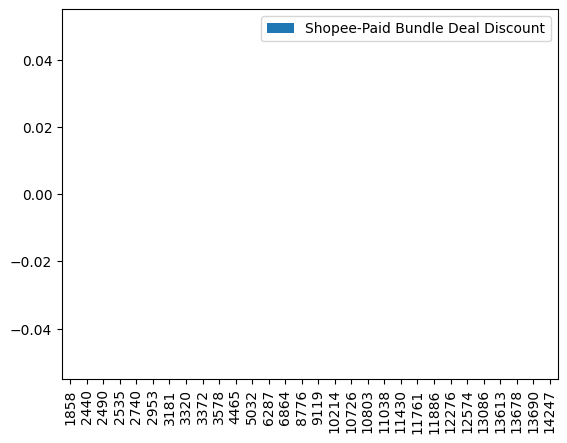

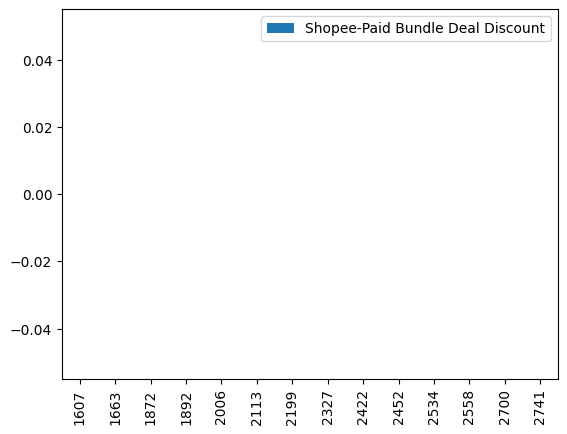

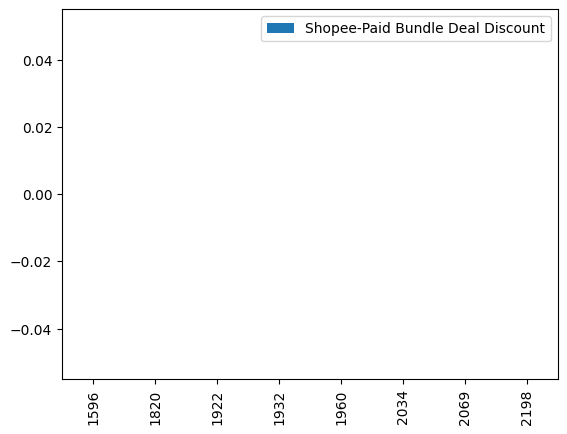

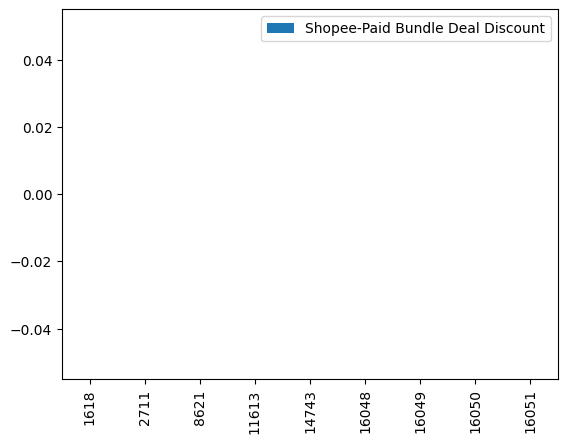

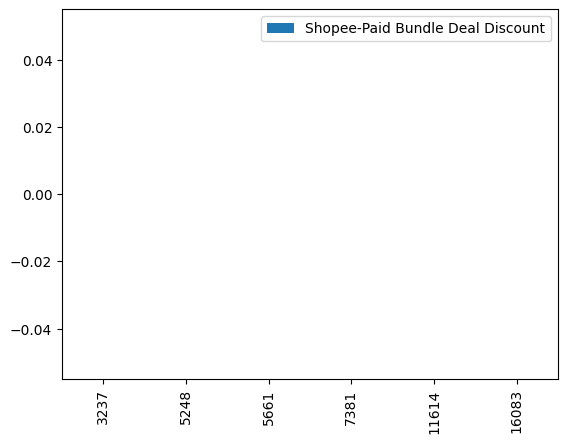

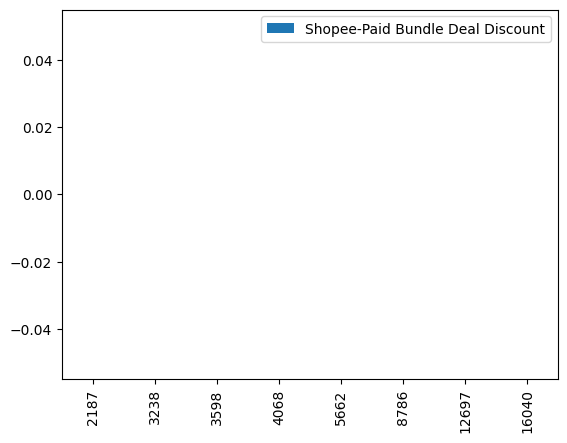

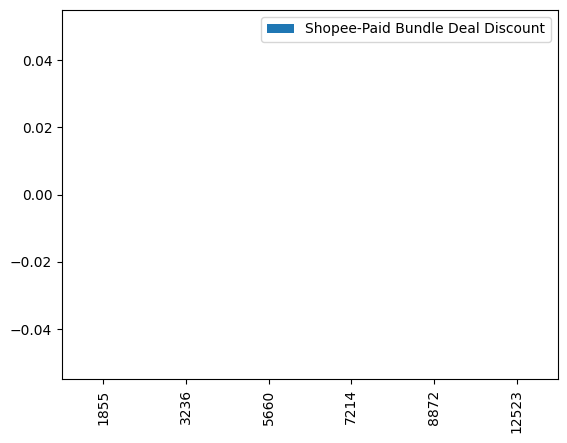

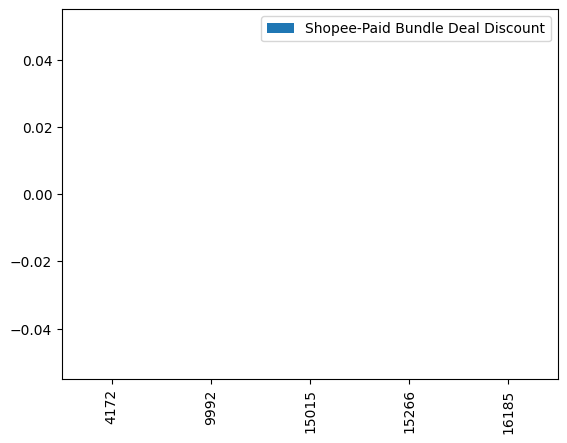

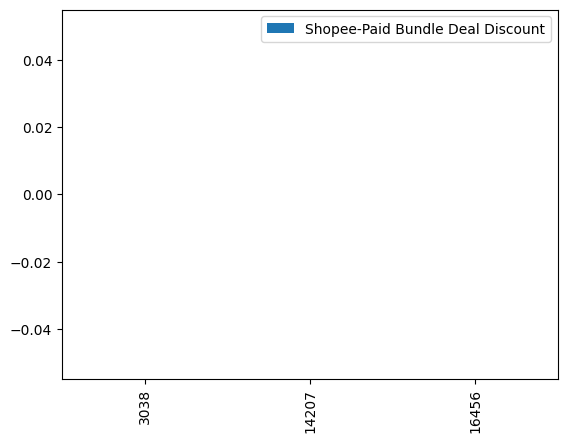

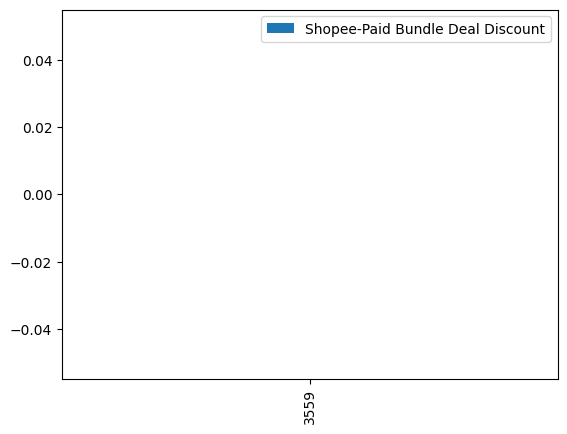

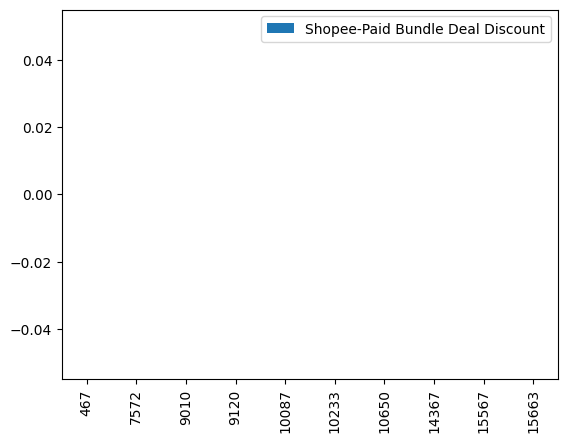

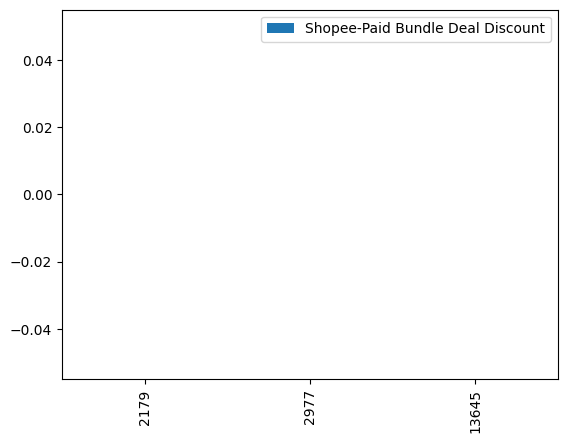

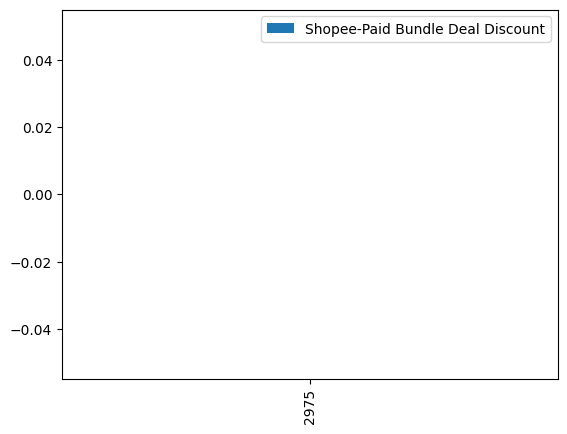

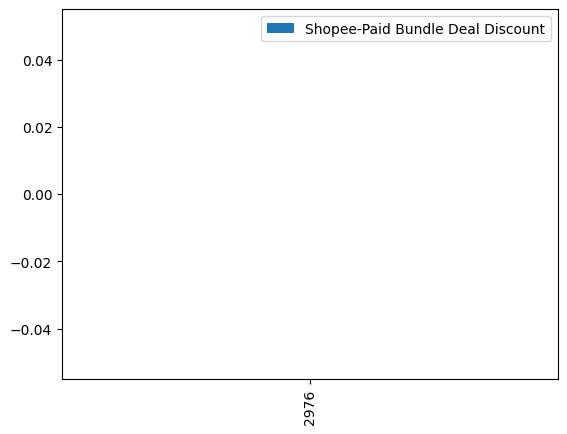

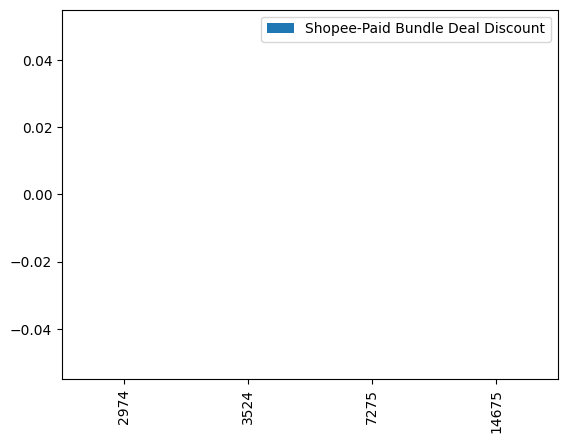

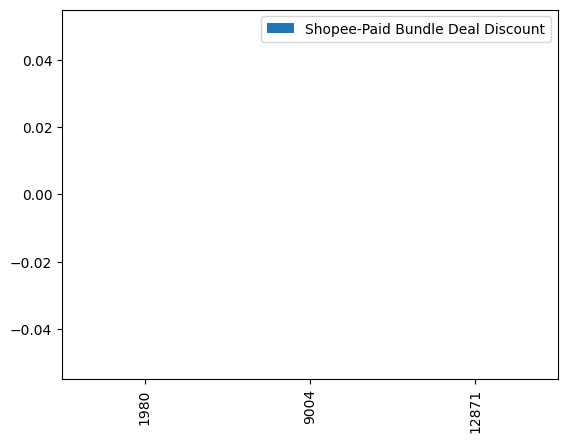

KeyboardInterrupt: 

In [6]:
plt.figure(figsize=(10, 6))
sku_bundle_participation.plot(kind='bar')
plt.title('SKU Influence on Bundle Deal Participation')
plt.xlabel('SKU Reference No.')
plt.ylabel('Participation in Bundle Deal (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Data Preprocessing**

In [ ]:
scaler = MinMaxScaler()
for feature in df.columns:
    df[[feature]] = scaler.fit_transform(df[[feature]])

In [ ]:
sse = []
k_range = range(1 , 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

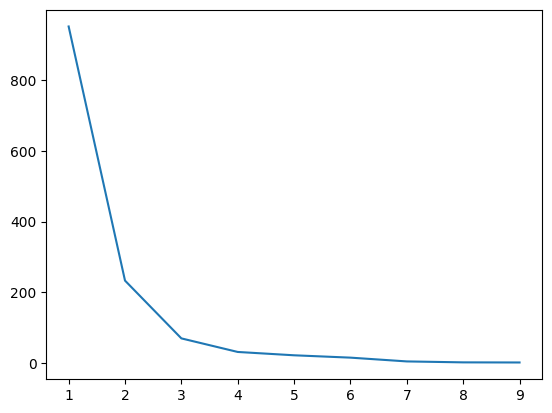

In [ ]:
plt.plot(k_range , sse)

In [ ]:
#4 is the elbow point
km = KMeans(n_clusters= 3)

In [ ]:
km.fit(df)

KMeans(n_clusters=3)

In [ ]:
y_pred = km.predict(df)

df["cluster"] = y_pred

In [ ]:
cluster_list = []
for i in range(3):
    cluster_list.append(df[df["cluster"] == i])

In [ ]:
cluster_list[0]

Sale Price  Shopee Discount  Discount Code by Seller  \
13       0.013672              0.0                    0.375   
14       0.000000              0.0                    0.375   
15       0.010069              0.0                    0.375   
47       0.003710              0.0                    0.375   
48       0.006253              0.0                    0.375   
...           ...              ...                      ...   
16541    0.006889              0.0                    0.375   
16551    0.009433              0.0                    0.500   
16576    0.007843              0.0                    0.500   
16577    0.006147              0.0                    0.500   
16578    0.006200              0.0                    0.500   

       Code Coins Cashback  cluster  
13                     0.0        0  
14                     0.0        0  
15                     0.0        0  
47                     0.0        0  
48                     0.0        0  
...                    ...      ...  
16541                  0.0        0  
16551                  0.0        0  
16576                  0.0        0  
16577                  0.0        0  
16578                  0.0        0  

[2589 rows x 5 columns]

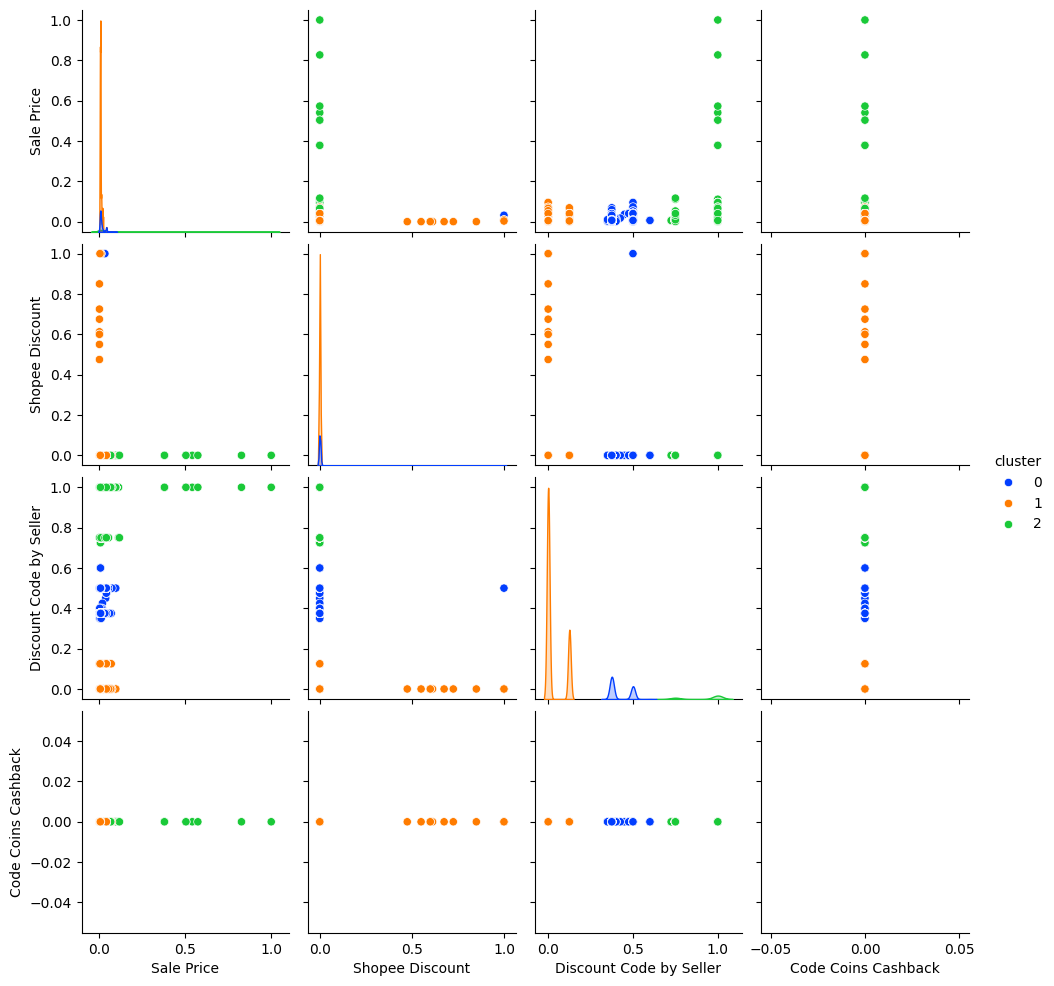

In [ ]:
sns.pairplot(df , hue = "cluster" , palette = "bright")

<Axes: xlabel='Discount Code by Seller', ylabel='Sale Price'>

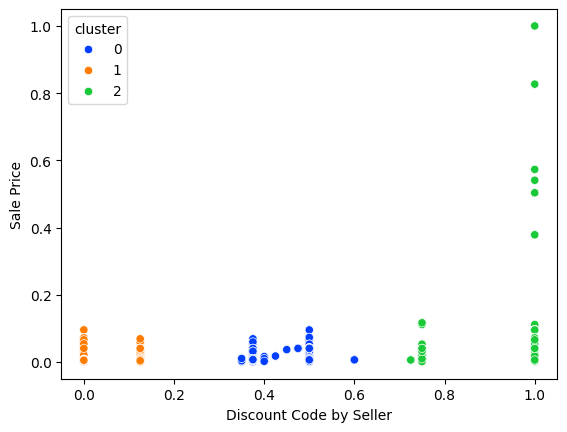

In [ ]:
sns.scatterplot(data = df , x = "Discount Code by Seller" , y = "Sale Price" , hue = "cluster" , palette = "bright")

In [ ]:
cat = category[0]

def add_cat(x):

    if x["cluster"] == 2:
        x[cat] = True
    else:
        x[cat] = False

    return x

df = df.apply(add_cat , axis =  1)

clean[cat] = df[cat]

In [ ]:
clean.to_excel("Clean.xlsx")